In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import evaluation as eval
import simulation as sim
import reconstruction as reco
import offset_analysis as a

In [316]:
n_offsets = 50
n_inputs = 13
#input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/050224_50_200k@200k_yz_6/"
input_dir = "E:/MPhys Large Files/080224_50_200k@200k_yz_13/"

offsets_x = np.loadtxt(input_dir + "offsets_x.csv", delimiter = ",")[:,1:7]
offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")[:,1:7]
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")[:,1:7]

rotations_x = np.loadtxt(input_dir + "rotations_x.csv", delimiter = ",")[:,1:7]
rotations_y = np.loadtxt(input_dir + "rotations_y.csv", delimiter = ",")[:,1:7]
rotations_z = np.loadtxt(input_dir + "rotations_z.csv", delimiter = ",")[:,1:7]

truth_parameters = np.array(np.array([rotations_x, rotations_y, rotations_z, offsets_x, offsets_y, offsets_z])).transpose((1,2,0))

In [94]:
offsets_y[0]

array([-0.03022096,  0.0006745 ,  0.00579822,  0.05348634,  0.01492527])

In [96]:
offsets_y[0]

array([-3.47855638e-04,  8.14884732e-05, -2.82413756e-02, -2.81968968e-02,
       -3.11109063e-02])

In [317]:
i = 0
parameters_i, sum_of_residuals_squared_i, sum_of_no_squared_i, df_i, df_offsets_i = eval.Analyse_Run(input_dir, i, n_inputs, 
                                                                        offsets_x = offsets_x[i], offsets_y = offsets_y[i], offsets_z = offsets_z[i], 
                                                                        rotations_x = rotations_x[i], rotations_y = rotations_y[i], rotations_z = rotations_z[i],
                                                                        initial_guess = np.array([0.0,0.0,0.0,0.0,0.1,-0.1]),
                                                                        bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)],
                                                                        reprop = False)

Truth transformation parameters:  [ 0.          0.          0.          0.         -0.03022096 -0.01973181]
Optimal transformation parameters: [ 0.          0.          0.          0.         -0.03056882 -0.01515859]
Sum of squares of residuals: 34126.73730175505
Sum of squares of residuals (no transform): 34642.87047857137


Truth transformation parameters:  [0.         0.         0.         0.         0.0006745  0.01596215]
Optimal transformation parameters: [0.         0.         0.         0.         0.00075599 0.01575895]
Sum of squares of residuals: 35437.82110521729
Sum of squares of residuals (no transform): 35547.193275854705


Truth transformation parameters:  [ 0.          0.          0.          0.          0.00579822 -0.01920474]
Optimal transformation parameters: [ 0.          0.          0.          0.         -0.02271094 -0.02067372]
Sum of squares of residuals: 8650.581031295702
Sum of squares of residuals (no transform): 8763.53435979293


Optimal transformation param

In [296]:
parameters, sum_of_residuals_squared, sum_of_no_squared, df, df_offsets = eval.Analyse_Multiple_Runs(input_dir, n_offsets, n_inputs,
                                                                              offsets_x = offsets_x, offsets_y = offsets_y, offsets_z = offsets_z, 
                                                                              rotations_x = rotations_x, rotations_y = rotations_y, rotations_z = rotations_z,
                                                                              initial_guess = np.array([0.0,0.0,0.0,0.0,0.1,-0.1]),
                                                                              bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)],
                                                                              reprop=False)


ANALYSING DATAFRAME: 0

Truth transformation parameters:  [ 0.          0.          0.          0.          0.00034786 -0.00457322]
Optimal transformation parameters: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.31304704e-04  2.32118611e-05]
Sum of squares of residuals: 34126.09838482257
Sum of squares of residuals (no transform): 34126.10555856269


Truth transformation parameters:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.14884732e-05  2.03198771e-04]
Optimal transformation parameters: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.51598432e-04  8.65120896e-05]
Sum of squares of residuals: 35437.66268802438
Sum of squares of residuals (no transform): 35437.69604387927


Truth transformation parameters:  [0.         0.         0.         0.         0.02824138 0.00063782]
Optimal transformation parameters: [0.         0.         0.         0.         0.00292488 0.00086227]
Sum of squares of residuals: 8712.06013

In [100]:
for j in range(len(parameters)):
    np.savetxt(input_dir + "parameters" + str(j) + ".csv", parameters[j], delimiter = ",")
    np.savetxt(input_dir + "truth_parameters" + str(j) + ".csv", truth_parameters[j], delimiter = ",")
    np.savetxt(input_dir + "sum_of_residuals_squared" + str(j) + ".csv", sum_of_residuals_squared[j], delimiter = ",")
    np.savetxt(input_dir + "sum_of_no_squared" + str(j) + ".csv", sum_of_no_squared[j], delimiter = ",")
np.savetxt(input_dir + "df_offsets.csv", df_offsets, delimiter = ",")

In [18]:
np.savetxt(input_dir + "pred_offsets_y.csv", np.append(np.zeros((50,1)),parameters[:,:,4], axis = 1), delimiter = ",")
np.savetxt(input_dir + "pred_offsets_z.csv", np.append(np.zeros((50,1)),parameters[:,:,5], axis = 1), delimiter = ",")

np.savetxt(input_dir + "new_offsets_y.csv", np.append(np.zeros((50,1)),truth_parameters[:,:,4]-parameters[:,:,4], axis = 1), delimiter = ",")
np.savetxt(input_dir + "new_offsets_z.csv", np.append(np.zeros((50,1)),truth_parameters[:,:,5]-parameters[:,:,5], axis = 1), delimiter = ",")

In [99]:



np.savetxt(input_dir + "new_offsets_y_p.csv", -np.loadtxt(input_dir + "new_offsets_y.csv", delimiter = ","), delimiter = ",")
np.savetxt(input_dir + "new_offsets_z_p.csv", -np.loadtxt(input_dir + "new_offsets_z.csv", delimiter = ","), delimiter = ",")



In [298]:
np.sum(truth_parameters[:,:,4]-parameters[:,:,4])

0.6142038814248241

In [299]:
np.sum(truth_parameters[:,:,4])

0.657584221552246

In [151]:
old_offsets_y = offsets_y


In [135]:
updated_offsets_y = offsets_y

In [249]:
np.mean(offsets_y[:,3:6], axis = 1)

array([ 0.0342058 ,  0.03156252, -0.00275792,  0.0199693 , -0.02234612,
       -0.03098828,  0.00441978, -0.00057418, -0.01999489,  0.08846773,
       -0.04193978, -0.02056212,  0.04093903, -0.00946729,  0.00201758,
        0.082212  , -0.04513606, -0.01852801, -0.02061167,  0.03193024,
        0.05763518, -0.01131484, -0.05537062,  0.02699476,  0.07842542,
       -0.00900187, -0.02749317, -0.05618174, -0.04315136, -0.02760112,
        0.02988821, -0.01231393,  0.05538576, -0.05319578, -0.0229797 ,
        0.07768778,  0.01587619, -0.09208915, -0.03768617, -0.04808459,
       -0.04724553,  0.07338459,  0.06203764, -0.01285117,  0.0001984 ,
       -0.00061427, -0.04900229, -0.00356621,  0.04205126,  0.02408095])

In [250]:
updated_offsets[:,3]

array([ 0.02824138,  0.03793416, -0.02721524,  0.0139144 ,  0.03785499,
        0.03788932,  0.00121883,  0.07423254, -0.00106888,  0.09139061,
       -0.0261922 , -0.04444112, -0.01172068, -0.01977917,  0.00454004,
        0.04313174, -0.05698813, -0.01458185,  0.01144366,  0.05804753,
        0.02657738, -0.01699183, -0.02595143,  0.00569005,  0.05653804,
        0.03812278, -0.00446339, -0.07257163,  0.04897953, -0.03679814,
        0.00737601, -0.02258637,  0.01029898, -0.03805604, -0.00884982,
        0.05162051, -0.01019313, -0.01925215, -0.00684109, -0.02759012,
       -0.03408731,  0.03338579,  0.0722897 ,  0.04037166, -0.00956227,
       -0.00705168, -0.00910771,  0.00776391,  0.03903439, -0.01618808])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 2., 0., 1., 0., 0., 0., 2., 2., 0., 1., 0., 2., 1.,
        1., 1., 0., 1., 4., 1., 1., 1., 0., 1., 0., 1., 0., 2., 2., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 4.,
        2., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.07257163, -0.07093201, -0.06929238, -0.06765276, -0.06601314,
        -0.06437352, -0.0627339 , -0.06109427, -0.05945465, -0.05781503,
        -0.05617541, -0.05453578, -0.05289616, -0.05125654, -0.04961692,
        -0.04797729, -0.04633767, -0.04469805, -0.04305843, -0.0414188 ,
        -0.03977918, -0.03813956, -0.03649994, -0.03486031, -0.03322069,
        -0.03158107, -0.02994145, -0.02830182, -0.0266622 , -0.02502258,
        -0.02338296, -0.02174333, -0.02010371, -0.01846409, -0.01682447,
        -0.01518484, -0.01354522, -0.01

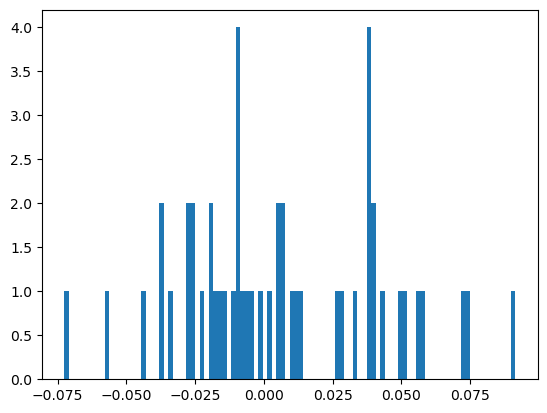

In [252]:
plt.hist(updated_offsets[:,3], bins = 100)

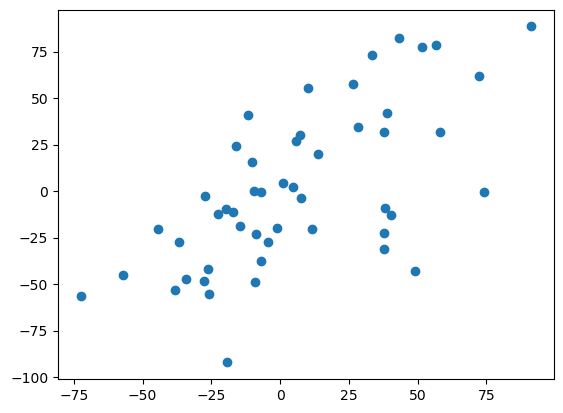

In [255]:
plt.scatter(updated_offsets[:,3]*1000, np.mean(offsets_y[:,3:6]*1000, axis = 1))

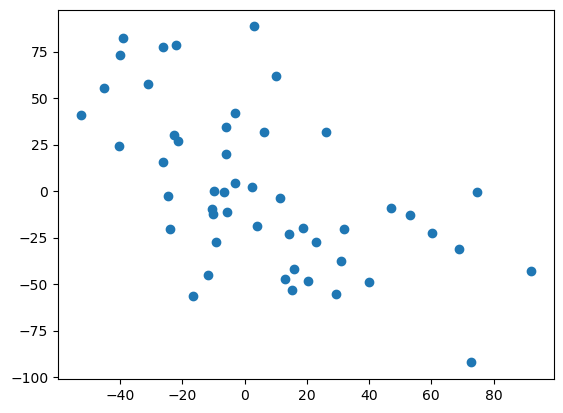

In [258]:
plt.scatter((updated_offsets[:,3]-np.mean(offsets_y[:,3:6], axis = 1))*1000, np.mean(offsets_y[:,3:6]*1000, axis = 1))

In [245]:
updated_offsets

array([[-0.00000000e+00,  3.47855638e-04, -8.14884732e-05,
         2.82413756e-02,  2.81968968e-02,  3.11109063e-02],
       [-0.00000000e+00,  3.38563186e-04, -1.20858693e-04,
         3.79341561e-02,  3.84233866e-02,  4.30753688e-02],
       [-0.00000000e+00,  8.94969761e-04,  1.01388134e-03,
        -2.72152412e-02, -3.43381109e-02, -3.29038811e-02],
       [-0.00000000e+00,  5.23970295e-04,  2.56961922e-04,
         1.39143976e-02,  1.30216200e-02,  1.18855569e-02],
       [-0.00000000e+00, -1.08339391e-04, -1.03040563e-03,
         3.78549865e-02,  3.64816689e-02,  4.19030018e-02],
       [-0.00000000e+00,  2.45784715e-04, -2.96699986e-04,
         3.78893193e-02,  1.70249957e-02,  3.33682577e-02],
       [-0.00000000e+00,  7.94973384e-04,  8.00934263e-04,
         1.21882548e-03, -6.63116117e-03, -5.66189163e-05],
       [-0.00000000e+00, -4.71698023e-04, -1.77298331e-03,
         7.42325450e-02,  7.75451583e-02,  8.25894695e-02],
       [-0.00000000e+00,  1.30810851e-03,  1.854

In [242]:
updated_offsets = np.loadtxt(input_dir + "new_offsets_y_p.csv", delimiter = ",")

In [13]:
np.loadtxt(input_dir + "pred_offsets_y.csv", delimiter = ",")

array([[ 0.00000000e+00, -3.06000000e-02,  7.55989348e-04,
        -2.24000000e-02,  2.52894415e-02, -1.62000000e-02],
       [ 0.00000000e+00,  1.45734661e-02, -5.64000000e-02,
        -1.01000000e-03, -2.52000000e-02,  6.85595769e-03],
       [ 0.00000000e+00,  7.46114639e-02,  3.32587195e-02,
         9.61191137e-03, -8.07000000e-03,  6.97980523e-02],
       [ 0.00000000e+00,  4.42597879e-02, -4.19000000e-02,
         3.20044457e-04,  7.47776827e-02, -5.97000000e-02],
       [ 0.00000000e+00, -2.34000000e-02, -1.29000000e-01,
         3.59011476e-03, -9.32000000e-02, -2.99000000e-02],
       [ 0.00000000e+00, -1.15000000e-01,  5.85753020e-02,
         9.14879602e-02, -1.25000000e-01,  1.25668629e-02],
       [ 0.00000000e+00,  8.62759298e-02, -1.16000000e-02,
         4.09524279e-02, -7.57000000e-02,  9.12386382e-02],
       [ 0.00000000e+00, -1.22000000e-01, -1.23000000e-01,
        -7.93000000e-03, -4.30000000e-02, -1.18000000e-01],
       [ 0.00000000e+00,  1.30723166e-01,  7.115

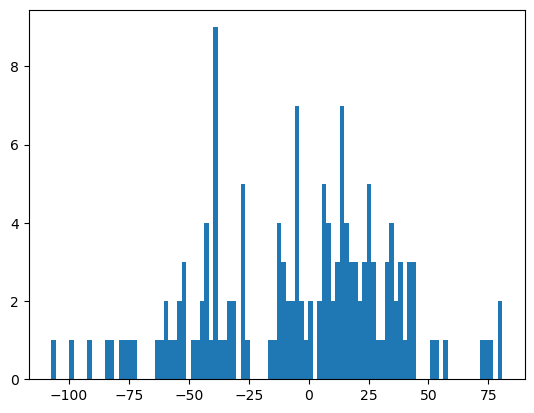

In [30]:
plt.hist((parameters[:,:,4]-truth_parameters[:,:,4])[:,2:5].flatten()*1000, bins = 100)
plt.show()

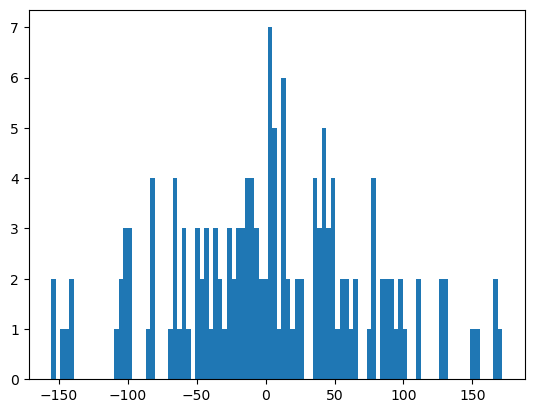

In [31]:
plt.hist((truth_parameters[:,:,4])[:,2:5].flatten()*1000, bins = 100)
plt.show()

In [98]:
len(sum_of_residuals_squared)

50

In [309]:
res = (truth_parameters- parameters)[truth_parameters != 0].flatten()
rel_err = (((truth_parameters- parameters)[truth_parameters != 0]/truth_parameters[truth_parameters != 0])*100).flatten()

print("Mean Relative Error: " + str(np.mean(rel_err)))
print("Median Relative Error: " + str(np.median(rel_err)))
print("Standard Deviation Relative Error: " + str(np.std(rel_err)))
print("\n")
print("Mean Absolute Residual (um): " + str(np.mean(np.abs(res))*1000))
print("Median Absolute Residual (um): " + str(np.median(np.abs(res))*1000))
print("Standard Deviation Residual (um): " + str(np.std(res)*1000))

Mean Relative Error: 35.94770598752769
Median Relative Error: 58.1734952445005
Standard Deviation Relative Error: 755.2235959328239


Mean Absolute Residual (um): 8.647265814454773
Median Absolute Residual (um): 0.48069790261257944
Standard Deviation Residual (um): 18.059507373751728


In [5]:
print(np.sum(np.abs(res)))
print(np.sum(np.abs(truth_parameters)))

5.201172806011332
24.5475140701094


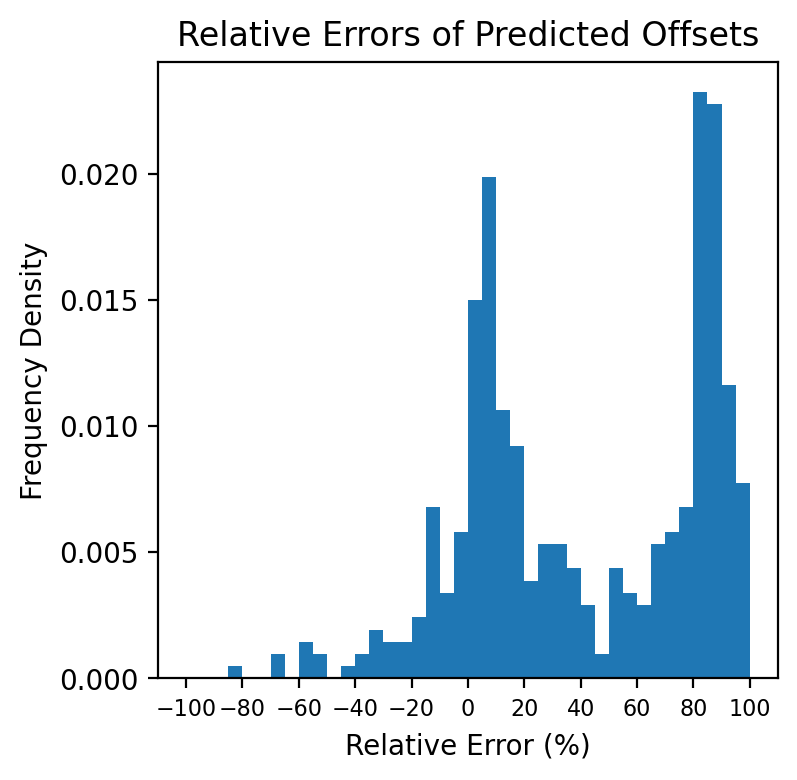

In [310]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(rel_err, bins = np.arange(-100, 105, 5), density = True)
plt.xlabel("Relative Error (%)")
plt.ylabel("Frequency Density")
plt.title("Relative Errors of Predicted Offsets")
plt.xticks(np.arange(-100,120,20), size = 8)
plt.show()

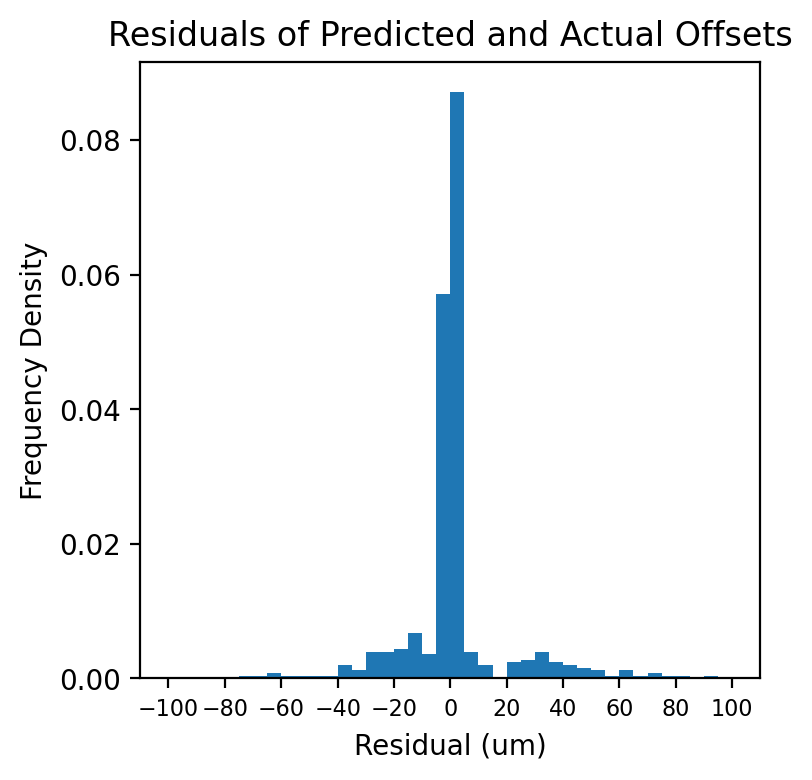

In [311]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(res*1000, bins = np.arange(-100, 105, 5), density = True)
plt.xlabel("Residual (um)")
plt.ylabel("Frequency Density")
plt.title("Residuals of Predicted and Actual Offsets")
plt.xticks(np.arange(-100, 120,20), size = 8)
plt.show()

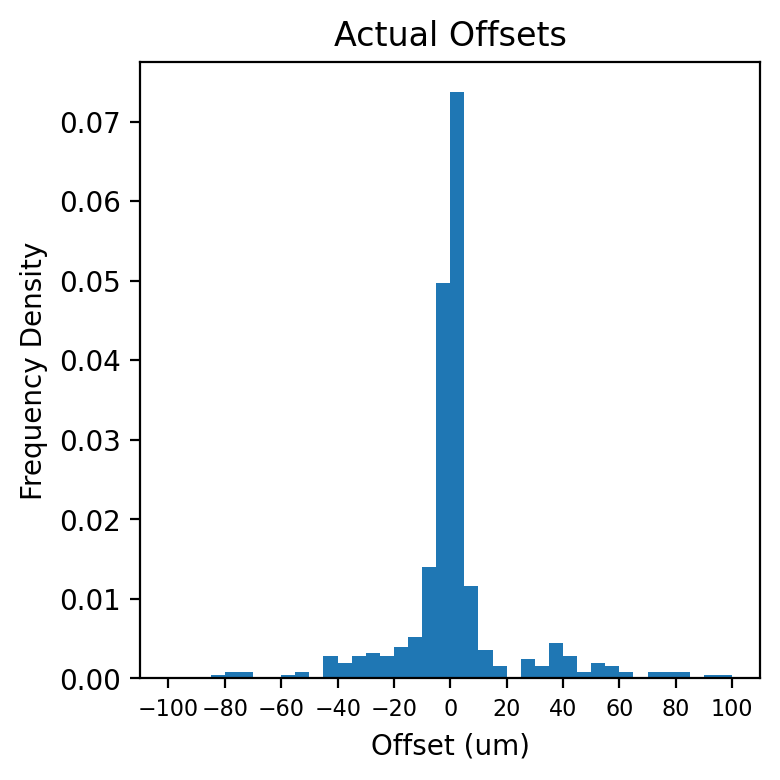

In [313]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(truth_parameters[truth_parameters != 0].flatten()*1000, bins = np.arange(-100, 105, 5), density = True)
plt.xlabel("Offset (um)")
plt.ylabel("Frequency Density")
plt.title("Actual Offsets")
plt.xticks(np.arange(-100, 120,20), size = 8)
plt.show()

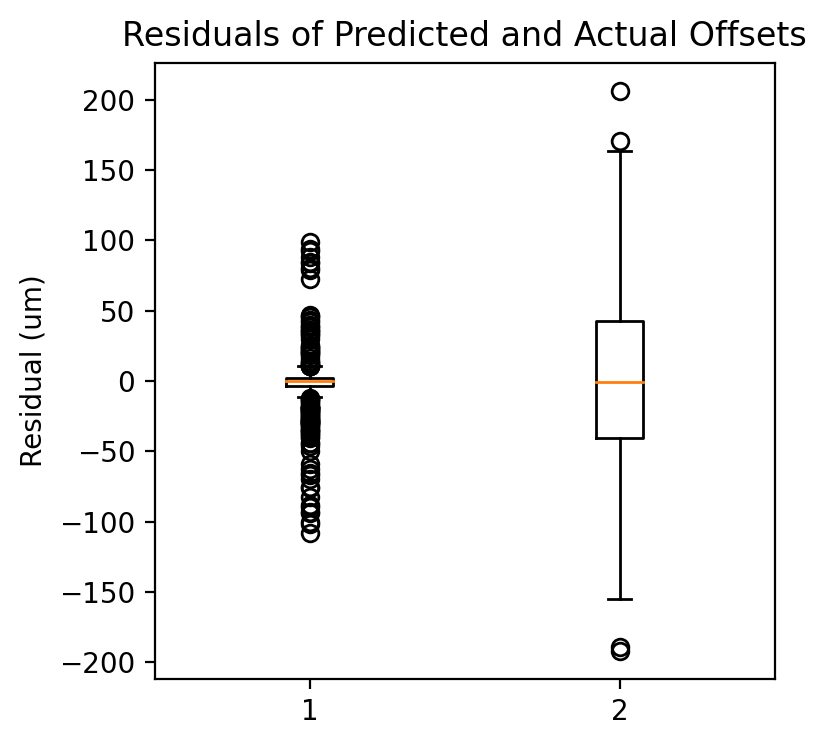

In [12]:
plt.figure(figsize = (4,4), dpi = 200)
plt.boxplot([res*1000, truth_parameters[truth_parameters != 0].flatten()*1000])
plt.ylabel("Residual (um)")
plt.title("Residuals of Predicted and Actual Offsets")
plt.show()

In [14]:
sum_of_residuals_squared

array([[20246.60538802, 21023.72115205, 32714.17499671, 33161.19633009,
        33664.84535555],
       [20247.91487378, 21023.61967208, 28276.11585098, 28100.55063591,
        27973.58582995],
       [20247.02198946, 21024.79246102, 28214.42473302, 28034.82697263,
        27897.38255964],
       [20248.12050776, 21024.03718266, 28076.15131252, 27899.2319354 ,
        27762.32568249],
       [20246.02231647, 21024.48872981, 28704.09850949, 28636.08447146,
        28585.06305482],
       [20244.91838388, 21023.84846998, 28206.2192679 , 28044.43286566,
        27951.06963266],
       [20245.12707288, 21023.16056546, 28219.26240799, 28047.72949188,
        27934.43110892],
       [20246.44639255, 21024.20254622, 28054.90421495, 27852.13160869,
        27704.24040354],
       [20245.17411626, 21024.00279401, 28550.59122814, 28417.59176235,
        28322.87789277],
       [20246.85677659, 21022.99166295, 28154.84987956, 27974.44954073,
        27850.98240988],
       [20247.00555448, 21024.

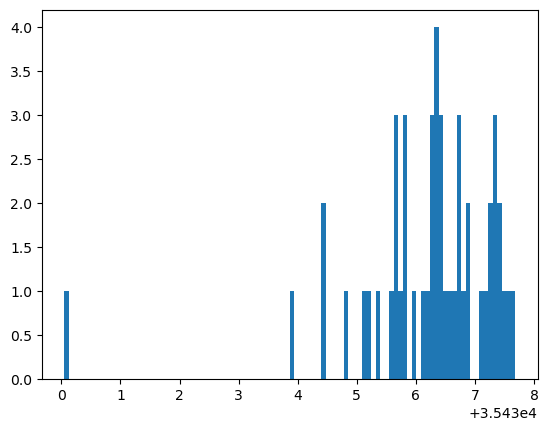

C:\Users\luke\AppData\Local\Temp\ipykernel_49564\870851988.py:4: RuntimeWarning: invalid value encountered in divide
  plt.scatter(np.abs(((parameters - truth_parameters)/truth_parameters)[:,1,4:5].flatten()), sum_of_residuals_squared[:,2])


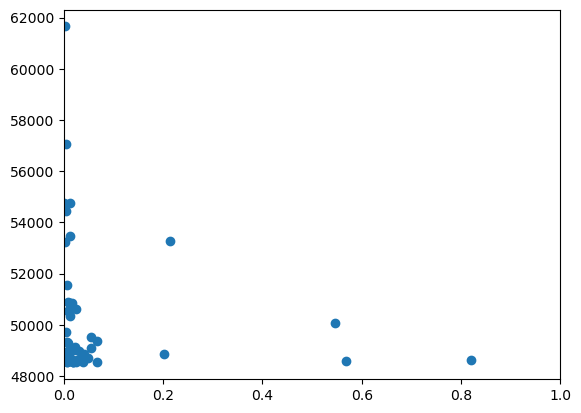

C:\Users\luke\AppData\Local\Temp\ipykernel_49564\870851988.py:8: RuntimeWarning: invalid value encountered in divide
  plt.scatter(np.abs(((parameters - truth_parameters)/truth_parameters)[:,1,5:6].flatten()), sum_of_residuals_squared[:,2])


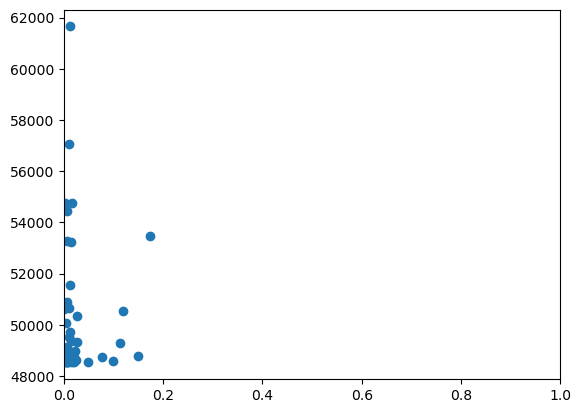

C:\Users\luke\AppData\Local\Temp\ipykernel_49564\870851988.py:12: RuntimeWarning: invalid value encountered in divide
  plt.scatter(np.abs(((parameters - truth_parameters)/truth_parameters)[:,3,5:6].flatten()), np.abs(((parameters - truth_parameters)/truth_parameters)[:,3,4:5].flatten()))


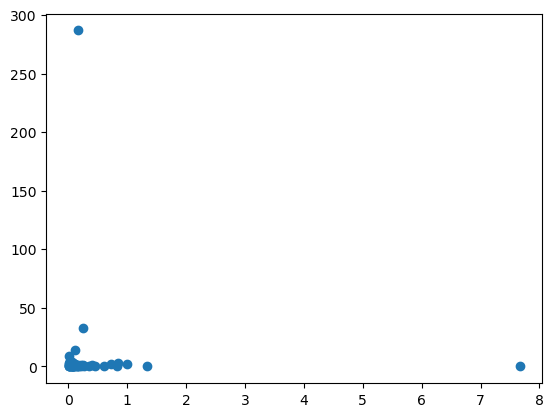

In [110]:
plt.hist(sum_of_residuals_squared[:,1], bins = 100)
plt.show()

plt.scatter(np.abs(((parameters - truth_parameters)/truth_parameters)[:,1,4:5].flatten()), sum_of_residuals_squared[:,2])
plt.xlim(0, 1)
plt.show()

plt.scatter(np.abs(((parameters - truth_parameters)/truth_parameters)[:,1,5:6].flatten()), sum_of_residuals_squared[:,2])
plt.xlim(0, 1)
plt.show()

plt.scatter(np.abs(((parameters - truth_parameters)/truth_parameters)[:,3,5:6].flatten()), np.abs(((parameters - truth_parameters)/truth_parameters)[:,3,4:5].flatten()))
plt.show()

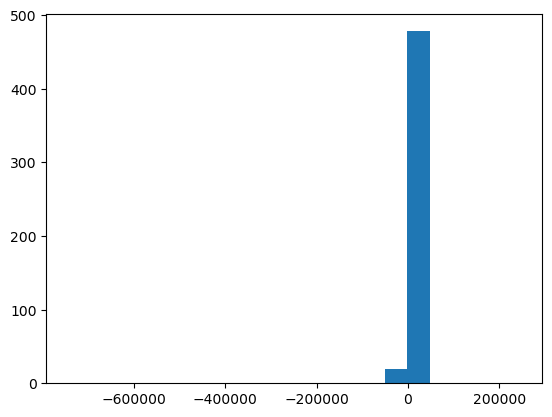

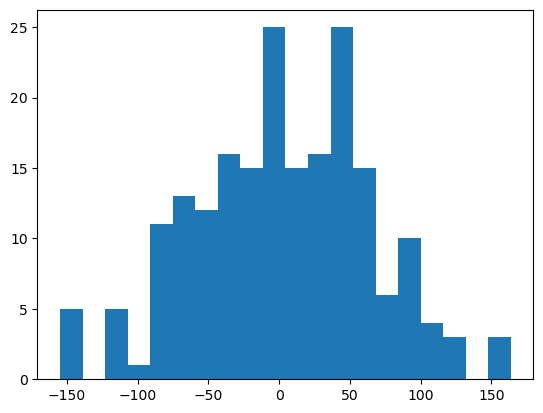

In [37]:
plt.hist((((parameters - truth_parameters)[truth_parameters != 0])/(truth_parameters[truth_parameters != 0])).flatten()*1000, bins = 20)
plt.show()
plt.hist((truth_parameters)[:,0:2,4:6].flatten()*1000, bins = 20)
plt.show()

In [6]:
print(np.mean((df["Y_TRUTH_2"] - df["Y_TRUTH_1"] - df["FIT_PY_1"]/df["FIT_PX_1"]*500)*1000))
print(np.mean((df["Y_TRUTH_3"] - df["Y_TRUTH_1"] - df["FIT_PY_1"]/df["FIT_PX_1"]*1000)*1000))
PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(df["FIT_PX_1"], df["FIT_PY_1"], df["PZ_TRUTH"], 1, 1, 4000)
print(np.median((df["Y_TRUTH_4"] - df["Y_TRUTH_1"] - df["FIT_PY_1"]/df["FIT_PX_1"]*1500 - DY -4000 * PY/PX)*1000))
print(np.median((df["Y_TRUTH_5"] - df["Y_TRUTH_1"] - df["FIT_PY_1"]/df["FIT_PX_1"]*1500 - DY -4500 * PY/PX)*1000))
print(np.median((df["Y_TRUTH_6"] - df["Y_TRUTH_1"] - df["FIT_PY_1"]/df["FIT_PX_1"]*1500 - DY -5000 * PY/PX)*1000))

0.15508198697248954
0.31008910271543827
10.747834549176716
11.647673649754386
12.438778100372971


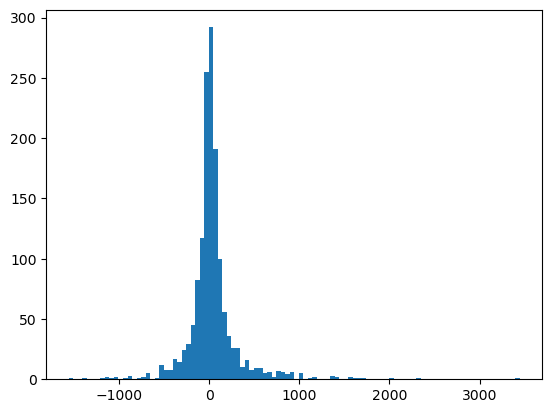

In [21]:
plt.hist((df["Y_TRUTH_6"] - df["Y_TRUTH_1"] - df["FIT_PY_1"]/df["PX_TRUTH"]*1500 - DY -5000 * PY/PX)*1000, bins = 100)
plt.show()

0.04314633991529604
0.04176939689534951
0.13964692781276802
[ 0.04642646 -0.06082205]


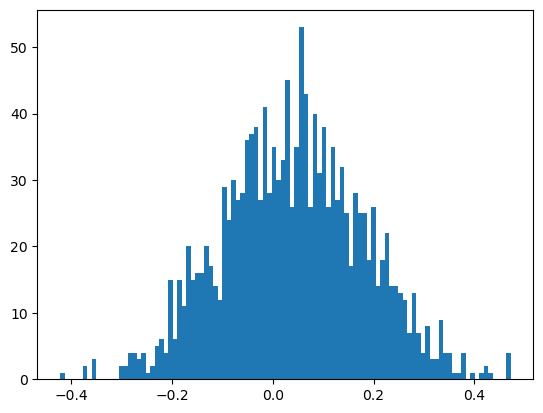

In [54]:
plt.hist(df_offsets["PRED_Y_2"] - df["GLOBAL_Y_HIT_2"], bins = 100)
print(np.median(df_offsets["PRED_Y_2"] - df["GLOBAL_Y_HIT_2"]))
print(np.mean(df_offsets["PRED_Y_2"] - df["GLOBAL_Y_HIT_2"]))
print(np.std(df_offsets["PRED_Y_2"] - df["GLOBAL_Y_HIT_2"]))
print(offsets_y[i])

In [52]:
print(parameters[0][4])

0.041769416535410615


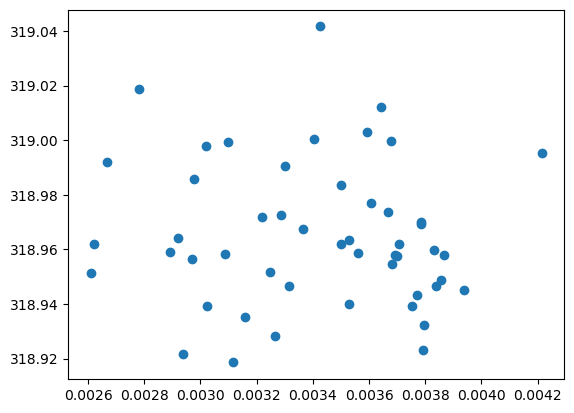

In [8]:
plt.scatter(np.abs(parameters[:,0,4]-truth_parameters[:,0,4]), sum_of_residuals_squared[:,0].flatten())

## Testing Full Transformation Analysis

In [6]:
import simulation as sim

index = 0
plane = 2
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_50_500k@200k_yz/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")
offsets_x = np.loadtxt(input_dir + "offsets_x.csv", delimiter = ",")

rotations_z = np.loadtxt(input_dir + "rotations_z.csv", delimiter = ",")
rotations_y = np.loadtxt(input_dir + "rotations_y.csv", delimiter = ",")
rotations_x = np.loadtxt(input_dir + "rotations_x.csv", delimiter = ",")

df = sim.Generate_DataFrame_From_ROOT(input_dir, index)
#df = df[df["CHI2SUM"] < 5000]
df_offsets = sim.Generate_Predicted_Offset_DataFrame(df)

df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.000295,0.002164,1.571367,3384.824401,-1.931311,3352.757080,-1.0,3352.748779,7.260652,-1.911155,...,-142.863602,-137.981216,-137.679306,-137.679703,-143.455322,-143.170090,-142.884842,-138.035751,-137.750488,-137.465210
1,-0.033339,0.015928,1.576857,29.994544,-0.181792,29.909056,-1.0,29.904711,0.476424,-0.181310,...,204.458847,256.244537,259.330231,262.407501,198.592117,201.575272,204.578873,256.280457,259.324280,262.365234
2,-0.002154,-0.006363,1.569692,464.200749,0.512511,463.482330,-1.0,463.472687,-2.947746,0.511911,...,126.377106,117.253830,116.680206,115.993355,127.625496,127.075104,126.524757,117.170944,116.620087,116.068604
3,-0.031273,0.020187,1.568208,31.976378,0.082754,31.859337,-1.0,31.852741,0.643010,0.082456,...,337.184662,315.149384,313.992004,312.536102,339.843079,338.556305,337.257935,315.189270,313.894104,312.595459
4,-0.000339,0.001738,1.570646,2947.709868,0.444034,2911.210205,-1.0,2911.205811,5.059551,0.440154,...,-35.254787,-36.458580,-36.458179,-36.603119,-35.006607,-35.081905,-35.157204,-36.437248,-36.512550,-36.587852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-0.006240,-0.005531,1.572842,160.247010,-0.327851,158.625015,-1.0,158.622208,-0.885226,-0.326134,...,-484.155212,-466.569672,-465.898132,-464.689758,-486.274536,-485.246765,-484.218872,-466.751221,-465.725830,-464.701630
1464,-0.038440,0.001792,1.582047,26.014865,-0.292669,26.007948,-1.0,26.006260,0.046702,-0.292659,...,-284.475433,-188.875839,-183.100739,-177.343430,-295.771912,-290.151367,-284.519012,-188.754990,-183.104858,-177.456238
1465,-0.156265,0.011415,1.531136,6.399395,0.253735,6.380869,-1.0,6.375441,0.072601,0.252929,...,378.867035,37.388939,17.507332,-2.121338,419.522064,399.230774,378.900787,37.375988,17.568676,-2.171051
1466,-0.000349,0.001772,1.571869,2863.385740,-3.070156,3042.219727,-1.0,3042.213135,5.463928,-3.284407,...,-306.895508,-297.606750,-296.890289,-296.547852,-307.839050,-307.302673,-306.766296,-297.647980,-297.111694,-296.575500


In [7]:
tx = rotations_x[index][plane-1]
ty = rotations_y[index][plane-1]
tz = rotations_z[index][plane-1]

dx = offsets_x[index][plane-1]
dy = offsets_y[index][plane-1]
dz = offsets_z[index][plane-1]

cx = np.cos(tx)
sx = np.sin(tx)

cy = np.cos(ty)
sy = np.sin(ty)

cz = np.cos(tz)
sz = np.sin(tz)

print(tx, ty, tz, dx, dy ,dz)

0.0 0.0 0.0 0.0 0.046426461231375546 -0.01096313486877572


In [8]:
#NEW METHOD WITH ROTATIONS GOING X THEN Y THEN Z
yp = (sx*sy*sz + cx*cz)*(df["LOCAL_Y_HIT_" + str(plane)]) + dy + (cx*sy*sz-sx*cz)*(df["LOCAL_Z_HIT_" + str(plane)]) - ((sx*sy*cz-sz*cx)*df["LOCAL_Y_HIT_" + str(plane)] + (cx*sy*cz+sz*sx)*df["LOCAL_Z_HIT_" + str(plane)] + dx)*df["PY_TRUTH"]/df["PX_TRUTH"]
zp = (sx*cy)*(df["LOCAL_Y_HIT_" + str(plane)]) + dz + (cx*cy)*(df["LOCAL_Z_HIT_" + str(plane)]) - ((sx*sy*cz-sz*cx)*df["LOCAL_Y_HIT_" + str(plane)] + (cx*sy*cz+sz*sx)*df["LOCAL_Z_HIT_" + str(plane)] + dx)*df["PZ_TRUTH"]/df["PX_TRUTH"]

In [814]:
y_pred_2 = df["Y_TRUTH_1"] + np.tan(df["PHI_TRUTH"])*500
z_pred_2 = df["Z_TRUTH_1"] + df["PZ_TRUTH"]/df["PX_TRUTH"]*500

In [9]:
from matplotlib import pyplot as plt

plt.hist(yp - y_pred_2, bins = 100)
print(np.median(yp - y_pred_2))
print(np.std(yp - y_pred_2))
plt.show()

#print(np.median(zp - df["GLOBAL_Z_HIT_"+ str(plane)]))
plt.hist(zp - z_pred_2, bins = 100)
print(np.median(zp - z_pred_2))
print(np.std(zp - z_pred_2))
plt.show()


NameError: name 'y_pred_2' is not defined

0.0032801213160666975
0.13964692781276516


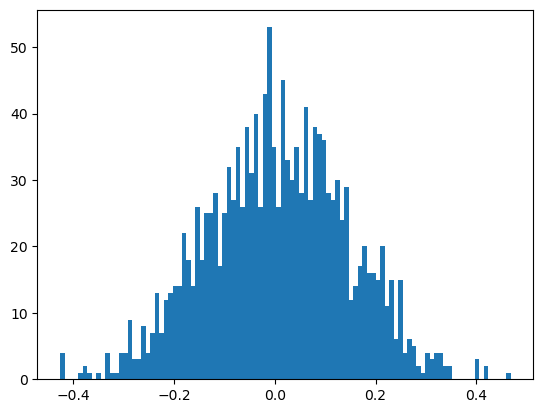

0.007807225846136134
0.13282328933814427


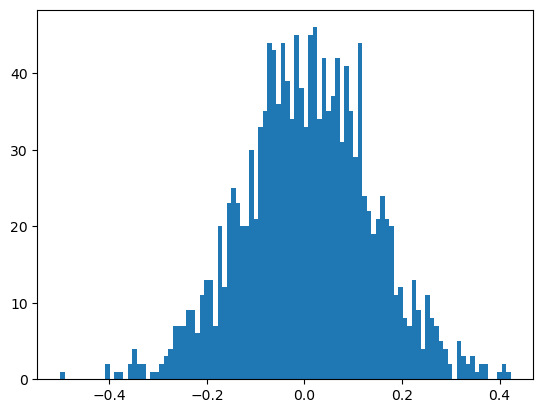

In [10]:
from matplotlib import pyplot as plt

plt.hist(yp - df_offsets["PRED_Y_"+ str(plane)], bins = 100)
print(np.median(yp - df_offsets["PRED_Y_"+ str(plane)]))
print(np.std(yp - df_offsets["PRED_Y_"+ str(plane)]))
plt.show()

#print(np.median(zp - df["GLOBAL_Z_HIT_"+ str(plane)]))
plt.hist(zp - df_offsets["PRED_Z_"+ str(plane)], bins = 100)
print(np.median(zp - df_offsets["PRED_Z_"+ str(plane)]))
print(np.std(zp - df_offsets["PRED_Z_"+ str(plane)]))
plt.show()


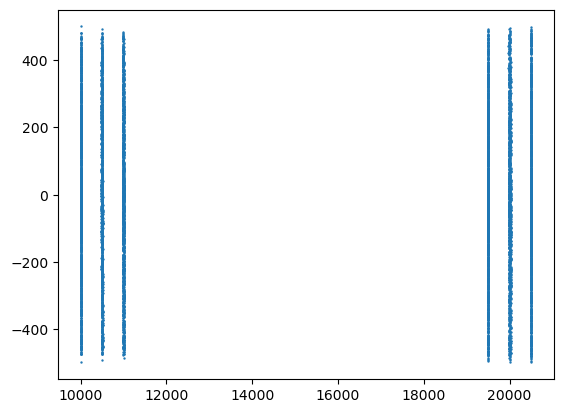

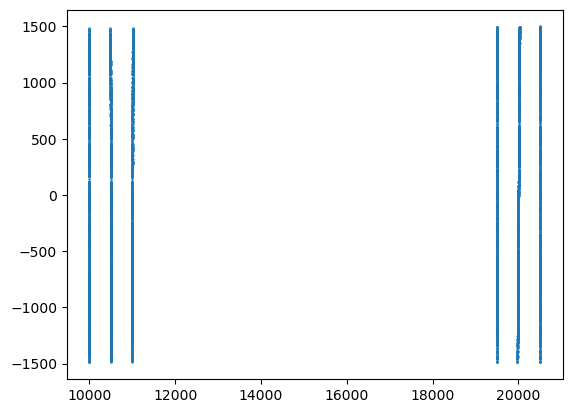

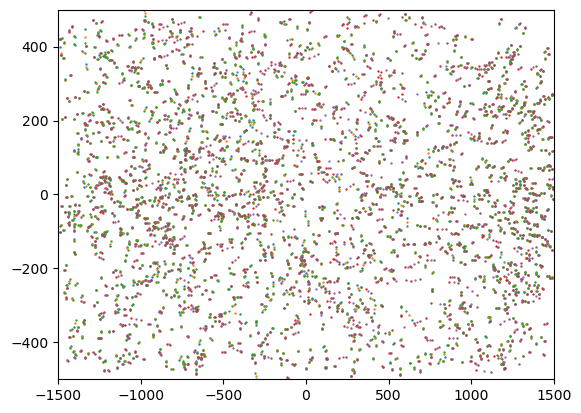

In [12]:
plt.scatter(x = [df["X_TRUTH_1"].values, df["X_TRUTH_2"].values, df["X_TRUTH_3"].values, df["X_TRUTH_4"].values, df["X_TRUTH_5"].values, df["X_TRUTH_6"].values], 
            y = [df["Z_TRUTH_1"].values, df["Z_TRUTH_2"].values, df["Z_TRUTH_3"].values, df["Z_TRUTH_4"].values, df["Z_TRUTH_5"].values, df["Z_TRUTH_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = [df["X_TRUTH_1"].values, df["X_TRUTH_2"].values, df["X_TRUTH_3"].values, df["X_TRUTH_4"].values, df["X_TRUTH_5"].values, df["X_TRUTH_6"].values], 
            y = [df["Y_TRUTH_1"].values, df["Y_TRUTH_2"].values, df["Y_TRUTH_3"].values, df["Y_TRUTH_4"].values, df["Y_TRUTH_5"].values, df["Y_TRUTH_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = df["Y_TRUTH_1"].values, 
            y = df["Z_TRUTH_1"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_2"].values, 
            y = df["Z_TRUTH_2"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_3"].values, 
            y = df["Z_TRUTH_3"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_4"].values, 
            y = df["Z_TRUTH_4"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_5"].values, 
            y = df["Z_TRUTH_5"].values,
            s = 0.5)
plt.scatter(x = df["Y_TRUTH_6"].values, 
            y = df["Z_TRUTH_6"].values,
            s = 0.5)
plt.xlim(-1500, 1500)
plt.ylim(-500, 500)
plt.show()

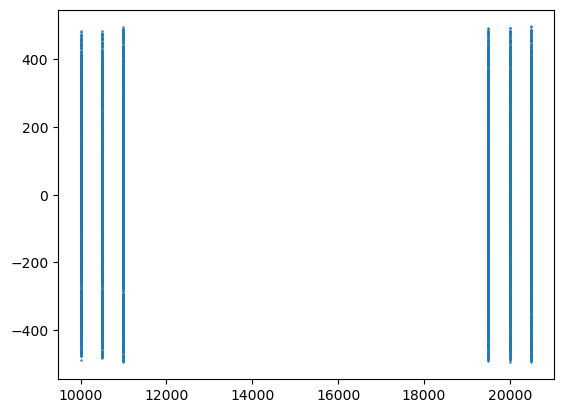

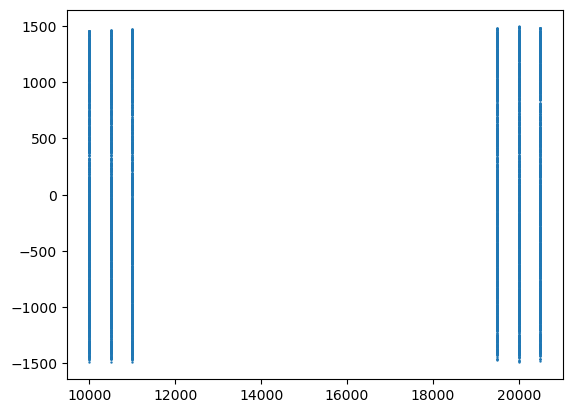

In [402]:
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["LOCAL_Z_HIT_1"].values, df["LOCAL_Z_HIT_2"].values, df["LOCAL_Z_HIT_3"].values, df["LOCAL_Z_HIT_4"].values, df["LOCAL_Z_HIT_5"].values, df["LOCAL_Z_HIT_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["LOCAL_Y_HIT_1"].values, df["LOCAL_Y_HIT_2"].values, df["LOCAL_Y_HIT_3"].values, df["LOCAL_Y_HIT_4"].values, df["LOCAL_Y_HIT_5"].values, df["LOCAL_Y_HIT_6"].values],
            s = 0.5)
plt.show()

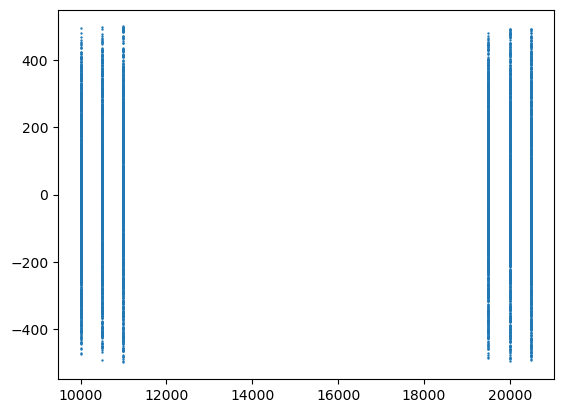

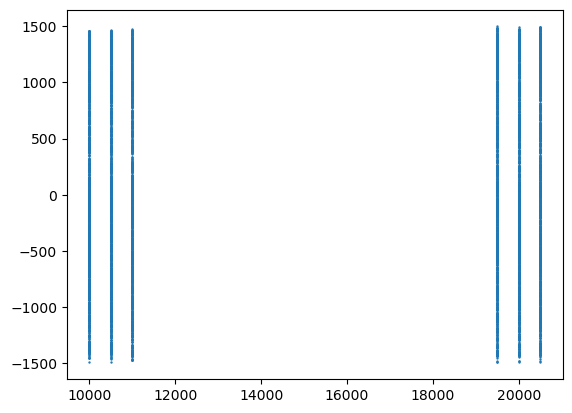

In [35]:
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["GLOBAL_Z_HIT_1"].values, df["GLOBAL_Z_HIT_2"].values, df["GLOBAL_Z_HIT_3"].values, df["GLOBAL_Z_HIT_4"].values, df["GLOBAL_Z_HIT_5"].values, df["GLOBAL_Z_HIT_6"].values],
            s = 0.5)
plt.show()
plt.scatter(x = [df["GLOBAL_X_HIT_1"].values, df["GLOBAL_X_HIT_2"].values, df["GLOBAL_X_HIT_3"].values, df["GLOBAL_X_HIT_4"].values, df["GLOBAL_X_HIT_5"].values, df["GLOBAL_X_HIT_6"].values], 
            y = [df["GLOBAL_Y_HIT_1"].values, df["GLOBAL_Y_HIT_2"].values, df["GLOBAL_Y_HIT_3"].values, df["GLOBAL_Y_HIT_4"].values, df["GLOBAL_Y_HIT_5"].values, df["GLOBAL_Y_HIT_6"].values],
            s = 0.5)
plt.show()

## Simulation with Truth Values

In [13]:
PX_PRIME, PY_PRIME, PZ_PRIME, DX, DY, DZ = a.Propagate_B_Field(df["PX_TRUTH"], df["PY_TRUTH"], df["PZ_TRUTH"], 1, 1, 4000)

delta_y = np.tan(df["PHI_TRUTH"])*500

delta_y_prime = PY_PRIME/PX_PRIME * (500)

PRED_Y = 3 * delta_y + df["Y_TRUTH_1"] + DY + 4000 * PY_PRIME/PX_PRIME + (3-3) * delta_y_prime 

df["Y_TRUTH_4"] - PRED_Y

0       0.000317
1       0.008267
2       0.020795
3      -0.031178
4       0.030925
          ...   
1463   -0.005817
1464    0.009209
1465   -0.009705
1466    0.027543
1467    0.023857
Length: 1468, dtype: float64

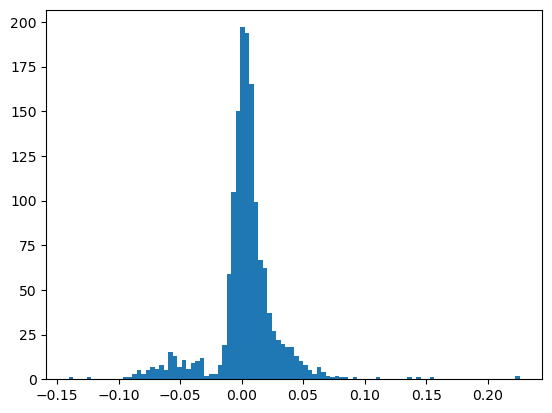

3.1691953039045346
26.584366274662152


In [16]:
plt.hist(df["Y_TRUTH_4"] - PRED_Y, bins = 100)
plt.show()
print(np.mean(df["Y_TRUTH_4"] - PRED_Y)*1000)
print(np.std(df["Y_TRUTH_4"] - PRED_Y)*1000)

## Repropagation

In [27]:
import uproot
import awkward as ak

def Shift_NaNs(input_array):
    
    nan_mask = np.isnan(input_array)
    output_array = np.array([np.concatenate((row[nan_mask_row], row[~nan_mask_row])) for row, nan_mask_row in zip(input_array, nan_mask)])

    return output_array

def Process_Coords(input_ak_array):
    return Shift_NaNs(ak.to_numpy(ak.pad_none(input_ak_array, target = 6, clip=True)).filled(np.nan))
    
def Generate_DataFrame_From_ROOT(input_dir, i):

    output_path = input_dir + "df" + str(i) + ".csv"
    trackstates_path = input_dir + str(i) + "/trackstates_fitter.root"
    tracksummary_path = input_dir + str(i) + "/tracksummary_fitter.root"

    file = uproot.open(trackstates_path)
    tree_input = file["trackstates"]

    X_TRUTH = Process_Coords(tree_input["t_x"].array())
    GLOBAL_X_HIT = Process_Coords(tree_input["g_x_hit"].array())
    FIT_X_HIT = Process_Coords(tree_input["g_x_smt"].array())

    Y_TRUTH = Process_Coords(tree_input["t_y"].array())
    GLOBAL_Y_HIT = Process_Coords(tree_input["g_y_hit"].array())
    FIT_Y_HIT = Process_Coords(tree_input["g_y_smt"].array())
    LOCAL_Y_HIT = Process_Coords(tree_input["l_y_hit"].array())

    Z_TRUTH = Process_Coords(tree_input["t_z"].array())
    GLOBAL_Z_HIT = Process_Coords(tree_input["g_z_hit"].array())
    FIT_Z_HIT = Process_Coords(tree_input["g_z_smt"].array())
    LOCAL_Z_HIT = Process_Coords(-tree_input["l_x_hit"].array())

    FIT_PX = Process_Coords(tree_input["px_smt"].array())
    FIT_PY = Process_Coords(tree_input["py_smt"].array())
    FIT_PZ = Process_Coords(tree_input["pz_smt"].array())

    file.close()

    file = uproot.open(tracksummary_path)
    tree_input = file["tracksummary"]

    QOP_FIT = ak.to_numpy(ak.flatten(tree_input["eQOP_fit"].array()))
    PHI_FIT = ak.to_numpy(ak.flatten(tree_input["ePHI_fit"].array()))
    THETA_FIT = ak.to_numpy(ak.flatten(tree_input["eTHETA_fit"].array()))

    P_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_p"].array()))
    Q_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_charge"].array()))
    PX_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_px"].array()))
    PY_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_py"].array()))
    PZ_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_pz"].array()))
    PHI_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_phi"].array()))
    THETA_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_theta"].array()))

    CHI2SUM = ak.to_numpy(ak.flatten(tree_input["chi2Sum"].array()))
    NDF = ak.to_numpy(ak.flatten(tree_input["NDF"].array()))

    file.close()

    P_FIT = Q_TRUTH/QOP_FIT
    PZ_FIT = P_FIT*np.cos(THETA_FIT)
    Q_FIT = np.sign(QOP_FIT).astype(int)

    df_columns = [
                "QOP_FIT", "PHI_FIT", "THETA_FIT", "P_FIT", "PZ_FIT", "Q_FIT", 
                "P_TRUTH", "Q_TRUTH", "PX_TRUTH", "PY_TRUTH", "PZ_TRUTH", "PHI_TRUTH", "THETA_TRUTH", 
                "CHI2SUM", "NDF", 
                "FIT_PX_6", "FIT_PX_5", "FIT_PX_4", "FIT_PX_3", "FIT_PX_2", "FIT_PX_1",
                "FIT_PY_6", "FIT_PY_5", "FIT_PY_4", "FIT_PY_3", "FIT_PY_2", "FIT_PY_1",
                "FIT_PZ_6", "FIT_PZ_5", "FIT_PZ_4", "FIT_PZ_3", "FIT_PZ_2", "FIT_PZ_1", 
                "X_TRUTH_6", "X_TRUTH_5", "X_TRUTH_4", "X_TRUTH_3", "X_TRUTH_2", "X_TRUTH_1", 
                "GLOBAL_X_HIT_6", "GLOBAL_X_HIT_5", "GLOBAL_X_HIT_4", "GLOBAL_X_HIT_3", "GLOBAL_X_HIT_2", "GLOBAL_X_HIT_1",
                "FIT_X_HIT_6", "FIT_X_HIT_5", "FIT_X_HIT_4", "FIT_X_HIT_3", "FIT_X_HIT_2", "FIT_X_HIT_1", 
                "Y_TRUTH_6", "Y_TRUTH_5", "Y_TRUTH_4", "Y_TRUTH_3", "Y_TRUTH_2", "Y_TRUTH_1", 
                "GLOBAL_Y_HIT_6", "GLOBAL_Y_HIT_5", "GLOBAL_Y_HIT_4", "GLOBAL_Y_HIT_3", "GLOBAL_Y_HIT_2", "GLOBAL_Y_HIT_1", 
                "LOCAL_Y_HIT_6", "LOCAL_Y_HIT_5", "LOCAL_Y_HIT_4", "LOCAL_Y_HIT_3", "LOCAL_Y_HIT_2", "LOCAL_Y_HIT_1", 
                "FIT_Y_HIT_6", "FIT_Y_HIT_5", "FIT_Y_HIT_4", "FIT_Y_HIT_3", "FIT_Y_HIT_2", "FIT_Y_HIT_1",
                "Z_TRUTH_6", "Z_TRUTH_5", "Z_TRUTH_4", "Z_TRUTH_3", "Z_TRUTH_2", "Z_TRUTH_1", 
                "GLOBAL_Z_HIT_6", "GLOBAL_Z_HIT_5", "GLOBAL_Z_HIT_4", "GLOBAL_Z_HIT_3", "GLOBAL_Z_HIT_2", "GLOBAL_Z_HIT_1",
                "LOCAL_Z_HIT_6", "LOCAL_Z_HIT_5", "LOCAL_Z_HIT_4", "LOCAL_Z_HIT_3", "LOCAL_Z_HIT_2", "LOCAL_Z_HIT_1",
                "FIT_Z_HIT_6", "FIT_Z_HIT_5", "FIT_Z_HIT_4", "FIT_Z_HIT_3", "FIT_Z_HIT_2", "FIT_Z_HIT_1"
    ]

    df_data = [
                QOP_FIT, PHI_FIT, THETA_FIT, P_FIT, PZ_FIT, Q_FIT,
                P_TRUTH, Q_TRUTH, PX_TRUTH, PY_TRUTH, PZ_TRUTH, PHI_TRUTH, THETA_TRUTH, 
                CHI2SUM, NDF, 
                FIT_PX[:,0], FIT_PX[:,1], FIT_PX[:,2], FIT_PX[:,3], FIT_PX[:,4], FIT_PX[:,5], 
                FIT_PY[:,0], FIT_PY[:,1], FIT_PY[:,2], FIT_PY[:,3], FIT_PY[:,4], FIT_PY[:,5], 
                FIT_PZ[:,0], FIT_PZ[:,1], FIT_PZ[:,2], FIT_PZ[:,3], FIT_PZ[:,4], FIT_PZ[:,5], 
                X_TRUTH[:,0], X_TRUTH[:,1], X_TRUTH[:,2], X_TRUTH[:,3], X_TRUTH[:,4], X_TRUTH[:,5], 
                GLOBAL_X_HIT[:,0], GLOBAL_X_HIT[:,1], GLOBAL_X_HIT[:,2], GLOBAL_X_HIT[:,3], GLOBAL_X_HIT[:,4], GLOBAL_X_HIT[:,5], 
                FIT_X_HIT[:,0], FIT_X_HIT[:,1], FIT_X_HIT[:,2], FIT_X_HIT[:,3], FIT_X_HIT[:,4], FIT_X_HIT[:,5],  
                Y_TRUTH[:,0], Y_TRUTH[:,1], Y_TRUTH[:,2], Y_TRUTH[:,3], Y_TRUTH[:,4], Y_TRUTH[:,5], 
                GLOBAL_Y_HIT[:,0], GLOBAL_Y_HIT[:,1], GLOBAL_Y_HIT[:,2], GLOBAL_Y_HIT[:,3], GLOBAL_Y_HIT[:,4], GLOBAL_Y_HIT[:,5],
                LOCAL_Y_HIT[:,0], LOCAL_Y_HIT[:,1], LOCAL_Y_HIT[:,2], LOCAL_Y_HIT[:,3], LOCAL_Y_HIT[:,4], LOCAL_Y_HIT[:,5],
                FIT_Y_HIT[:,0], FIT_Y_HIT[:,1], FIT_Y_HIT[:,2], FIT_Y_HIT[:,3], FIT_Y_HIT[:,4], FIT_Y_HIT[:,5],  
                Z_TRUTH[:,0], Z_TRUTH[:,1], Z_TRUTH[:,2], Z_TRUTH[:,3], Z_TRUTH[:,4], Z_TRUTH[:,5], 
                GLOBAL_Z_HIT[:,0], GLOBAL_Z_HIT[:,1], GLOBAL_Z_HIT[:,2], GLOBAL_Z_HIT[:,3], GLOBAL_Z_HIT[:,4], GLOBAL_Z_HIT[:,5],
                LOCAL_Z_HIT[:,0], LOCAL_Z_HIT[:,1], LOCAL_Z_HIT[:,2], LOCAL_Z_HIT[:,3], LOCAL_Z_HIT[:,4], LOCAL_Z_HIT[:,5],
                FIT_Z_HIT[:,0], FIT_Z_HIT[:,1], FIT_Z_HIT[:,2], FIT_Z_HIT[:,3], FIT_Z_HIT[:,4], FIT_Z_HIT[:,5],  
    ]

    df = pd.DataFrame(data=np.column_stack(df_data), columns=df_columns)
    df.to_csv(output_path)

    return df

In [61]:
pred_offsets_y = []
pred_offsets_z = []

i = 0

input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/reprop/"
df_reprop = Generate_DataFrame_From_ROOT(input_dir, "")
df_reprop.sort_values(by=["PX_TRUTH"], ignore_index=True, inplace=True)

input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/"
df_truth = pd.read_csv(input_dir + "df" + str(i) + ".csv", index_col=0)
df_truth.sort_values(by=["FIT_PX_1"], ignore_index=True, inplace=True)

df_truth = df_truth[pd.notna(df_reprop["Y_TRUTH_6"])]
df_reprop = df_reprop[pd.notna(df_reprop["Y_TRUTH_6"])]
pred_y_offset_sub = [0]
pred_z_offset_sub = [0]
for j in range(1, 6):
    
    y = df_reprop["Y_TRUTH_"+ str(j+1)]-df_truth["Y_TRUTH_"+ str(j+1)]
    z = df_reprop["Z_TRUTH_"+ str(j+1)]-df_truth["Z_TRUTH_"+ str(j+1)]
    pred_y_offset_sub.append(np.median(y[np.abs(y - np.median(y)) < 1]))
    pred_z_offset_sub.append(np.median(z[np.abs(z - np.median(y)) < 1]))

pred_offsets_y.append(pred_y_offset_sub)
pred_offsets_z.append(pred_z_offset_sub)

pred_offsets_y = np.array(pred_offsets_y)
pred_offsets_z = np.array(pred_offsets_z)

print(pred_offsets_y*1000)
print(pred_offsets_z*1000)

[[ 0.          0.79345703  0.06103516 -4.27246094 -4.69970703 -6.71386719]]
[[ 0.         -2.68554688 -2.62451172 -2.56299973 -2.18439102 -2.42614746]]


In [103]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/reprop/"
df_reprop = Generate_DataFrame_From_ROOT(input_dir, "")
df_reprop.sort_values(by=["PY_TRUTH"], ignore_index=True, inplace=True)

input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/"
df = pd.read_csv(input_dir + "df" + str(i) + ".csv", index_col=0)
df.sort_values(by=["FIT_PY_1"], ignore_index=True, inplace=True)

df = df[pd.notna(df_reprop["Y_TRUTH_6"])]
df_reprop = df_reprop[pd.notna(df_reprop["Y_TRUTH_6"])]

In [112]:
output_dict = {
                "HIT_Y_1": df["LOCAL_Y_HIT_1"], "HIT_Y_2": df["LOCAL_Y_HIT_2"], "HIT_Y_3": df["LOCAL_Y_HIT_3"], "HIT_Y_4": df["LOCAL_Y_HIT_4"], "HIT_Y_5": df["LOCAL_Y_HIT_5"], "HIT_Y_6": df["LOCAL_Y_HIT_6"], 
                "PRED_Y_1": df_reprop["Y_TRUTH_1"], "PRED_Y_2": df_reprop["Y_TRUTH_2"], "PRED_Y_3": df_reprop["Y_TRUTH_3"], "PRED_Y_4": df_reprop["Y_TRUTH_4"], "PRED_Y_5": df_reprop["Y_TRUTH_5"], "PRED_Y_6": df_reprop["Y_TRUTH_6"], 

                "HIT_Z_1": df["LOCAL_Z_HIT_1"], "HIT_Z_2": df["LOCAL_Z_HIT_2"], "HIT_Z_3": df["LOCAL_Z_HIT_3"], "HIT_Z_4": df["LOCAL_Z_HIT_4"], "HIT_Z_5": df["LOCAL_Z_HIT_5"], "HIT_Z_6": df["LOCAL_Z_HIT_6"], 
                "PRED_Z_1": df_reprop["Z_TRUTH_1"], "PRED_Z_2": df_reprop["Z_TRUTH_2"], "PRED_Z_3": df_reprop["Z_TRUTH_3"], "PRED_Z_4": df_reprop["Z_TRUTH_4"], "PRED_Z_5": df_reprop["Z_TRUTH_5"], "PRED_Z_6": df_reprop["Z_TRUTH_6"],

                "FIT_PX_1": df_reprop["FIT_PX_1"].values, "FIT_PX_2": df_reprop["FIT_PX_2"].values, "FIT_PX_3": df_reprop["FIT_PX_3"].values, "FIT_PX_4": df_reprop["FIT_PX_4"].values, "FIT_PX_5": df_reprop["FIT_PX_5"].values, "FIT_PX_6": df_reprop["FIT_PX_6"].values,
                "FIT_PX_1": df_reprop["FIT_PY_1"].values, "FIT_PY_2": df_reprop["FIT_PY_2"].values, "FIT_PY_3": df_reprop["FIT_PY_3"].values, "FIT_PY_4": df_reprop["FIT_PY_4"].values, "FIT_PY_5": df_reprop["FIT_PY_5"].values, "FIT_PY_6": df_reprop["FIT_PY_6"].values,
                "FIT_PX_1": df_reprop["FIT_PZ_1"].values, "FIT_PZ_2": df_reprop["FIT_PZ_2"].values, "FIT_PZ_3": df_reprop["FIT_PZ_3"].values, "FIT_PZ_4": df_reprop["FIT_PZ_4"].values, "FIT_PZ_5": df_reprop["FIT_PZ_5"].values, "FIT_PZ_6": df_reprop["FIT_PZ_6"].values,             
}

df_offsets = pd.DataFrame(output_dict)

df_offsets = df_offsets[np.abs(df_offsets["PRED_Y_2"] - df_offsets["HIT_Y_2"]) < 10]
df_offsets

,HIT_Y_1,HIT_Y_2,HIT_Y_3,HIT_Y_4,HIT_Y_5,HIT_Y_6,PRED_Y_1,PRED_Y_2,PRED_Y_3,PRED_Y_4,...,FIT_PY_2,FIT_PY_3,FIT_PY_4,FIT_PY_5,FIT_PY_6,FIT_PZ_2,FIT_PZ_3,FIT_PZ_4,FIT_PZ_5,FIT_PZ_6
1,-881.401550,-883.001648,-884.783875,-911.288086,-912.829834,-914.361816,-881.401550,-883.131470,-884.861328,-911.426880,...,-9.660061,-9.660044,-8.461669,-8.461640,-8.461627,0.666026,0.665996,0.665950,0.665938,0.665923
2,-1041.215576,-1042.218994,-1043.189575,-1057.531616,-1058.233398,-1059.038208,-1041.215576,-1042.183960,-1043.152222,-1057.429565,...,-6.894375,-6.894390,-5.695117,-5.695110,-5.695106,-0.786080,-0.786073,-0.786062,-0.786080,-0.786088
3,-1013.842590,-1014.777161,-1015.580811,-1028.103760,-1028.851807,-1029.445679,-1013.842590,-1014.700439,-1015.558228,-1028.134277,...,-6.605496,-6.605543,-5.404280,-5.404289,-5.404289,-0.450962,-0.450982,-0.451010,-0.451029,-0.451039
4,-1312.258301,-1313.938232,-1315.523315,-1338.854736,-1340.194214,-1341.572266,-1312.258301,-1313.861084,-1315.463867,-1338.869141,...,-5.908092,-5.908099,-4.709853,-4.709866,-4.709878,-0.154756,-0.154745,-0.154712,-0.154711,-0.154717
5,-1125.160767,-1126.373535,-1127.529297,-1143.635742,-1144.764282,-1145.552124,-1125.160767,-1126.303223,-1127.445557,-1143.816284,...,-5.231884,-5.231861,-4.036739,-4.036726,-4.036720,1.347556,1.347576,1.347611,1.347606,1.347605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,1317.143311,1317.859009,1318.729004,1334.420532,1335.406006,1336.010742,1317.143311,1317.952881,1318.762329,1334.342651,...,6.583871,6.583860,7.781037,7.781035,7.781034,3.373832,3.373807,3.373800,3.373813,3.373823
1464,1455.879761,1456.517944,1457.622314,1476.217651,1477.409424,1478.541626,1455.879761,1456.850220,1457.820679,1476.412231,...,7.028778,7.028750,8.225446,8.225447,8.225442,3.661471,3.661442,3.661438,3.661440,3.661438
1465,1219.159790,1220.880127,1222.825562,1259.568848,1262.051392,1264.283203,1219.159790,1221.085449,1223.011230,1259.852295,...,6.961518,6.961518,8.160292,8.160307,8.160311,0.113924,0.113875,0.113811,0.113784,0.113776
1466,1214.509888,1215.583008,1216.846191,1237.328735,1238.589966,1239.785889,1214.509888,1215.591797,1216.673706,1237.200928,...,7.224571,7.224563,8.426677,8.426675,8.426667,-1.870625,-1.870629,-1.870628,-1.870639,-1.870643


{'whiskers': [<matplotlib.lines.Line2D at 0x2c605f8d340>,
 'caps': [<matplotlib.lines.Line2D at 0x2c605f8d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c605f8d0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c605f8ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c605f9d0a0>],
 'means': []}

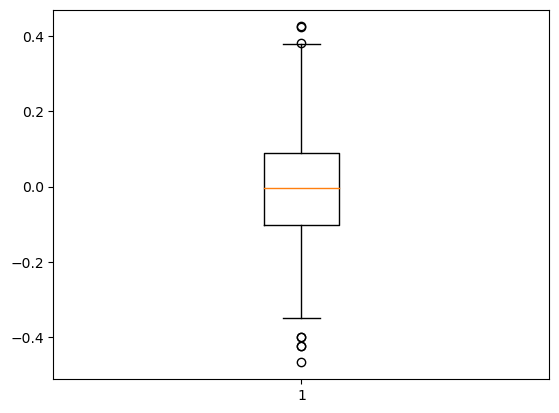

In [108]:
y = df_offsets["PRED_Y_2"] - df_offsets["HIT_Y_2"]
plt.boxplot(y)

In [114]:
reco.Fit_Offsets(df_offsets, 5, bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)])

Optimal transformation parameters: [ 0.          0.          0.          0.         -0.05550638 -0.00751038]
Sum of squares of residuals: 400.8185900099458
Sum of squares of residuals (no transform): 404.5865505596676




(array([ 0.        ,  0.        ,  0.        ,  0.        , -0.05550638,
        -0.00751038]),
 400.8185900099458)

In [90]:
np.median(df["LOCAL_Y_HIT_5"] - df["Y_TRUTH_5"])

-0.001099969623280481

In [13]:
df_truth[pd.notna(df_reprop["Y_TRUTH_6"])]

,Unnamed: 0,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,278,-0.273640,-0.007746,1.611194,3.654431,-0.147590,3.646616,-1.0,3.643532,-0.028221,...,-274.109406,81.517006,101.636742,122.007759,-316.643799,-295.358215,-274.078857,81.491684,101.702568,121.965286
1,833,-0.262848,-0.049614,1.543011,3.804485,0.105694,3.791450,-1.0,3.785327,-0.187890,...,-213.989334,-455.616241,-469.604156,-483.367584,-185.139282,-199.473114,-213.927338,-455.632996,-469.546783,-483.408844
2,238,-0.236116,0.003523,1.557712,4.235210,0.055414,4.230987,-1.0,4.230598,0.014910,...,-218.437119,-332.421661,-339.134338,-345.644379,-204.710205,-211.506943,-218.372894,-332.481201,-339.077179,-345.645447
4,471,-0.227916,0.020485,1.581782,4.387574,-0.048198,4.378343,-1.0,4.377160,0.089679,...,-73.659149,22.730982,28.070070,33.724571,-85.112404,-79.383308,-73.647270,22.684223,28.158089,33.681271
5,733,-0.219682,0.018374,1.573159,4.552042,-0.010757,4.545453,-1.0,4.544678,0.083223,...,199.550323,220.272202,221.154800,222.440338,197.257050,198.414154,199.584167,220.171341,221.268875,222.421951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,459,-0.000287,0.000806,1.570816,3488.426516,-0.067937,3462.556885,-1.0,3462.555664,2.798128,...,-78.593582,-78.224182,-78.282616,-78.234016,-78.491211,-78.481453,-78.471695,-78.305832,-78.296089,-78.286346
1463,1290,-0.000283,-0.001717,1.570906,3530.893795,-0.388659,3482.301270,-1.0,3482.296143,-5.981358,...,-68.619385,-67.489777,-67.425209,-67.299065,-68.528877,-68.473846,-68.418816,-67.483315,-67.428291,-67.373268
1464,1275,-0.000275,0.000961,1.569560,3636.115064,4.494807,3788.670898,-1.0,3788.666260,3.674266,...,352.531586,342.097565,341.698425,341.033203,353.856567,353.238556,352.620514,342.114258,341.496216,340.878174
1466,895,-0.000256,0.001090,1.569961,3907.256575,3.265421,3678.964600,-1.0,3678.961182,4.008709,...,238.691208,231.834702,231.345398,231.007614,239.665619,239.247787,238.829956,231.726807,231.308960,230.891113


In [68]:
df_reprop["Y_TRUTH_6"]

0       1041.099609
1       1392.971191
2        630.078735
3               NaN
4        739.737671
           ...     
1463   -1029.498047
1464    1188.313477
1465            NaN
1466    1193.281616
1467    1336.283447
Name: Y_TRUTH_6, Length: 1468, dtype: float64

In [69]:
pd.notna(df_reprop["Y_TRUTH_6"])

0        True
1        True
2        True
3       False
4        True
        ...  
1463     True
1464     True
1465    False
1466     True
1467     True
Name: Y_TRUTH_6, Length: 1468, dtype: bool

In [23]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/0/"
df_reprop = a.Generate_DataFrame_From_ROOT(input_dir, 0)
df_reprop

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.018385,-0.007756,1.575897,54.391687,-0.277458,54.770161,-1.0,54.767841,-0.419974,-0.278964,...,-9.832843,33.112396,35.894241,38.492172,-14.973208,-12.426390,-9.881302,33.351612,35.899731,38.450413
1,-0.005338,-0.004226,1.571042,187.320013,-0.045942,191.193161,-1.0,191.191513,-0.792252,-0.045729,...,7.727313,9.848424,9.885819,10.185163,7.526689,7.649046,7.771429,9.853025,9.975557,10.097319
2,-0.002121,-0.000496,1.573096,471.389232,-1.084001,479.031342,-1.0,479.030029,-0.224123,-1.104430,...,-438.744873,-419.193115,-418.088837,-416.955566,-441.027954,-439.878143,-438.728333,-419.181732,-418.031921,-416.881775
3,-0.004753,0.001307,1.567547,210.381889,0.683631,211.008041,-1.0,211.006744,0.276849,0.685942,...,428.295502,400.592468,399.048096,397.411987,431.432281,429.807770,428.183228,400.565125,398.940460,397.313171
4,-0.011092,0.000333,1.568874,90.158468,0.173346,90.869049,-1.0,90.868874,0.036022,0.174344,...,231.131943,214.933960,213.950546,212.892471,233.054901,232.095963,231.136642,214.822495,213.861832,212.899811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,-0.005208,-0.003550,1.572460,192.019360,-0.319445,191.490707,-1.0,191.489227,-0.682523,-0.317333,...,-132.606415,-118.362930,-117.768829,-116.889343,-134.313950,-133.481888,-132.649841,-118.505936,-117.674080,-116.843681
1226,-0.000452,0.001635,1.569794,2210.280621,2.215820,2217.752930,-1.0,2217.748779,3.633511,2.223311,...,203.459229,194.824051,194.391907,193.869537,204.350845,203.849625,203.348389,194.827545,194.326309,193.817596
1227,-0.002256,-0.000349,1.571659,443.323044,-0.382429,443.217957,-1.0,443.217773,-0.155499,-0.377689,...,67.091904,74.280449,74.703705,75.257988,66.039116,66.470573,66.902000,74.235428,74.666779,75.096710
1228,-0.003671,-0.001413,1.571662,272.371289,-0.235738,255.319931,-1.0,255.319504,-0.411222,-0.221193,...,369.337219,376.516907,376.978882,377.501251,368.405487,368.838196,369.270874,376.625244,377.057953,377.490875


In [72]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/250124_50_500k@200k/"
df_truth = Generate_DataFrame_From_ROOT(input_dir, 0)
df_truth

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.003183,0.001392,1.573065,314.142779,-0.712625,315.472931,-1.0,315.471802,0.441197,-0.715620,...,-367.490631,-348.245117,-346.975464,-345.991302,-369.807892,-368.672333,-367.536804,-348.234344,-347.099335,-345.964691
1,-0.000382,0.000875,1.571706,2614.645656,-2.378932,2577.188477,-1.0,2577.186523,2.278276,-2.345369,...,-314.639252,-306.755219,-306.180359,-305.769135,-315.393066,-314.938110,-314.483124,-306.748566,-306.293610,-305.838654
2,-0.008028,0.002478,1.574231,124.569552,-0.427858,124.615028,-1.0,124.613907,0.308920,-0.428145,...,-317.281769,-288.252258,-286.459290,-284.732208,-320.854614,-319.135284,-317.416168,-288.201233,-286.483063,-284.765289
3,-0.021366,0.019749,1.572611,46.802365,-0.084930,46.814938,-1.0,46.805733,0.924514,-0.084862,...,-277.859314,-262.458527,-261.387085,-260.734131,-279.692169,-278.781616,-277.871643,-262.434631,-261.527374,-260.620728
4,-0.014800,0.001188,1.567533,67.569000,0.220506,67.657875,-1.0,67.657463,0.080552,0.220833,...,392.653473,364.809662,363.171051,361.507477,395.794464,394.164825,392.534698,364.795746,363.164001,361.532166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,-0.001382,-0.002794,1.572033,723.817623,-0.895246,719.730530,-1.0,719.727173,-2.010935,-0.891834,...,-429.294464,-418.625824,-418.119995,-417.432831,-430.462799,-429.844177,-429.225525,-418.708801,-418.090240,-417.471771
1917,-0.009142,-0.010227,1.571988,109.381820,-0.130294,109.646645,-1.0,109.640846,-1.120135,-0.130906,...,-109.034920,-98.668274,-97.999939,-97.365646,-110.089943,-109.487633,-108.885162,-98.639610,-98.039078,-97.440933
1918,-0.009086,-0.003639,1.572660,110.063631,-0.205119,110.242401,-1.0,110.241478,-0.401051,-0.205573,...,-159.106873,-143.246155,-142.351990,-141.266785,-160.970581,-160.036987,-159.103195,-143.229279,-142.296021,-141.363342
1919,-0.002897,-0.003838,1.569712,345.142934,0.374356,345.794159,-1.0,345.791412,-1.324471,0.373027,...,NaN,25.216368,24.880491,24.229586,NaN,NaN,NaN,25.314167,24.771868,24.229544


In [73]:
df_truth.dropna(subset=["GLOBAL_Z_HIT_6"], inplace=True, ignore_index=True)
df_truth

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,PZ_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.003183,0.001392,1.573065,314.142779,-0.712625,315.472931,-1.0,315.471802,0.441197,-0.715620,...,-367.490631,-348.245117,-346.975464,-345.991302,-369.807892,-368.672333,-367.536804,-348.234344,-347.099335,-345.964691
1,-0.000382,0.000875,1.571706,2614.645656,-2.378932,2577.188477,-1.0,2577.186523,2.278276,-2.345369,...,-314.639252,-306.755219,-306.180359,-305.769135,-315.393066,-314.938110,-314.483124,-306.748566,-306.293610,-305.838654
2,-0.008028,0.002478,1.574231,124.569552,-0.427858,124.615028,-1.0,124.613907,0.308920,-0.428145,...,-317.281769,-288.252258,-286.459290,-284.732208,-320.854614,-319.135284,-317.416168,-288.201233,-286.483063,-284.765289
3,-0.021366,0.019749,1.572611,46.802365,-0.084930,46.814938,-1.0,46.805733,0.924514,-0.084862,...,-277.859314,-262.458527,-261.387085,-260.734131,-279.692169,-278.781616,-277.871643,-262.434631,-261.527374,-260.620728
4,-0.014800,0.001188,1.567533,67.569000,0.220506,67.657875,-1.0,67.657463,0.080552,0.220833,...,392.653473,364.809662,363.171051,361.507477,395.794464,394.164825,392.534698,364.795746,363.164001,361.532166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,-0.002922,-0.001322,1.570745,342.218762,0.017690,340.552032,-1.0,340.551727,-0.455436,0.019822,...,42.405643,42.044888,41.824738,42.079674,42.501919,42.475853,42.449829,42.008076,41.982143,41.956272
1465,-0.001382,-0.002794,1.572033,723.817623,-0.895246,719.730530,-1.0,719.727173,-2.010935,-0.891834,...,-429.294464,-418.625824,-418.119995,-417.432831,-430.462799,-429.844177,-429.225525,-418.708801,-418.090240,-417.471771
1466,-0.009142,-0.010227,1.571988,109.381820,-0.130294,109.646645,-1.0,109.640846,-1.120135,-0.130906,...,-109.034920,-98.668274,-97.999939,-97.365646,-110.089943,-109.487633,-108.885162,-98.639610,-98.039078,-97.440933
1467,-0.009086,-0.003639,1.572660,110.063631,-0.205119,110.242401,-1.0,110.241478,-0.401051,-0.205573,...,-159.106873,-143.246155,-142.351990,-141.266785,-160.970581,-160.036987,-159.103195,-143.229279,-142.296021,-141.363342


In [117]:
np.max(df_truth["GLOBAL_Z_HIT_6"])

499.66162109375

In [123]:
np.median(df_truth["Y_TRUTH_3"] - df_truth["LOCAL_Y_HIT_3"])

-0.001953125

In [121]:
np.median(df_truth["GLOBAL_Y_HIT_1"] + 1000*np.arctan(df_truth["PHI_FIT"]) - df_truth["LOCAL_Y_HIT_3"])

-0.0032398012876910798

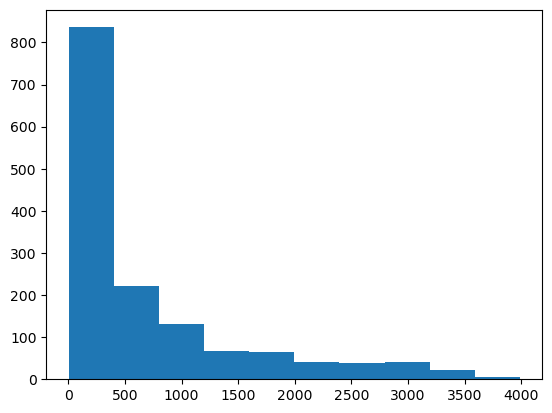

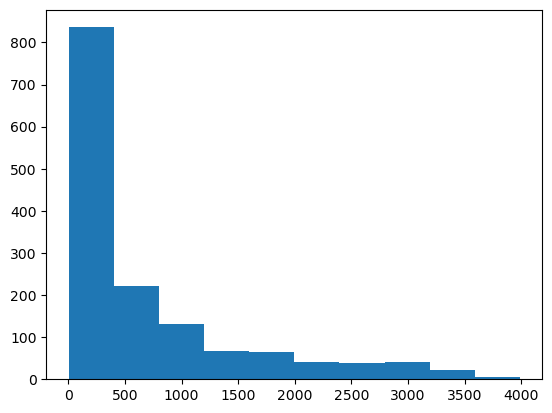

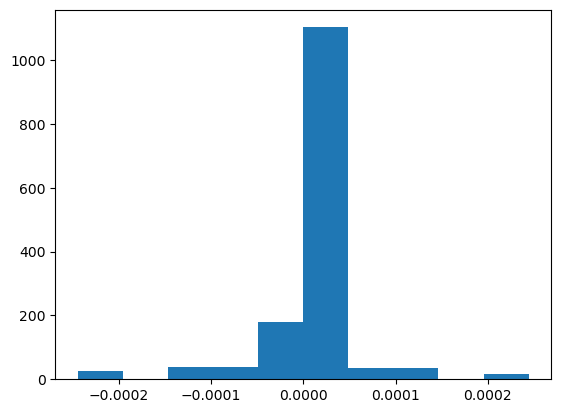

In [35]:
from matplotlib import pyplot as plt 

plt.hist(df_reprop["PX_TRUTH"])
plt.show()
plt.hist(df_truth["FIT_PX_1"])
plt.show()
plt.hist(np.sort(df_reprop["PX_TRUTH"]) - np.sort(df_truth["FIT_PX_1"]))
plt.show()

In [74]:
df_reprop = 
df_reprop["Y_TRUTH_2"]

df_truth = df_truth.sort_values(by=["FIT_PX_1"], ignore_index=True)
df_truth["GLOBAL_Y_HIT_2"]

0      -1286.500244
1       -375.812042
2      -1462.809204
3      -1071.818115
4      -1460.593628
           ...     
1463   -1014.700317
1464    1176.402832
1465    1425.385254
1466    1317.952881
1467    1180.227295
Name: Y_TRUTH_2, Length: 1468, dtype: float64

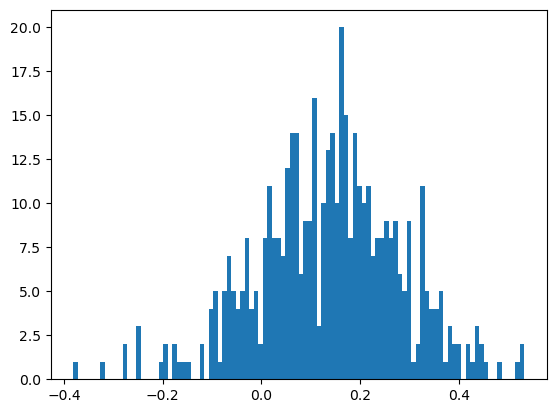

0.14349365234375
0.14504369220735808


In [81]:
x = df_reprop["Y_TRUTH_2"]-df_truth["GLOBAL_Y_HIT_2"]
x = x[np.abs(x-np.median(x)) < 0.8]
plt.hist(x, bins = 100)
plt.show()
print(np.median(x))
print(np.std(x))

## New Analysis

In [8]:
np.random.uniform(-0.1, 0.1, 6)

array([-0.06097708,  0.07680241,  0.04690237, -0.06161826, -0.00682692,
       -0.03788264])

In [9]:
import evaluation as eval
import numpy as np 
import pandas as pd

n_samples = 18
i = 3
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/280124_18_500k@200k/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")
offsets_x = np.loadtxt(input_dir + "offsets_x.csv", delimiter = ",")

rotations_x = np.loadtxt(input_dir + "rotations_x.csv", delimiter = ",")
rotations_y = np.loadtxt(input_dir + "rotations_y.csv", delimiter = ",")
rotations_z = np.loadtxt(input_dir + "rotations_z.csv", delimiter = ",")

#total_parameters, total_sum_of_residuals_squared, df, df_offsets = eval.Analyse_Run(input_dir, i, offsets_x, offsets_y, offsets_z, rotations_x, rotations_y, rotations_z, np.random.uniform(-0.001, 0.001, 6), bounds = [(0, 0),(0, 0),(-np.pi/8, np.pi/8),(0, 0),(0, 0),(0, 0)])

In [10]:
import simulation as sim
from matplotlib import pyplot as plt

df = sim.Generate_DataFrame_From_ROOT(input_dir, 0)

0.09676913730708622

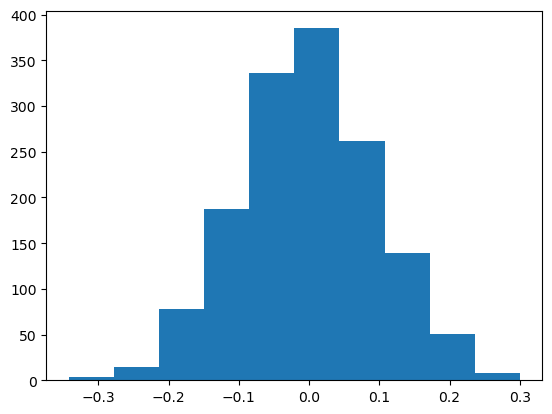

In [12]:
plt.hist(df["Y_TRUTH_2"] - df["LOCAL_Y_HIT_2"])
np.std(df["Y_TRUTH_2"] - df["LOCAL_Y_HIT_2"])

In [3]:
parameters = np.array([rotations_x[i], rotations_y[i], rotations_z[i], offsets_x[i], offsets_y[i], offsets_z[i]]).transpose()
parameters

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.19634954, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

# Rotation Analysis

In [4]:
def rotation_matrix(tx, ty, tz):

    cx = np.cos(tx)
    sx = np.sin(tx)

    cy = np.cos(ty)
    sy = np.sin(ty)

    cz = np.cos(tz)
    sz = np.sin(tz)

    return np.array([[cx*cz, sx*sy*cz - sz*cx, cx*sy*cz +sx*sz],[cy*sz, sx*sy*sz + cx*cz, cx*sy*sz - sx*cz],[-sy, sx*cy, cx*cy]])

In [18]:
parameters

array([[ 6.61745038e-03, -1.10541638e-07, -2.45972112e-07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.62320153e-03,  5.77516028e-07,  1.05702012e-06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.17069414e-01,  1.29949295e-01, -7.32316404e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.53899013e-02,  1.49412738e-01, -6.17125044e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.01190617e-02, -1.19298112e-01,  9.47059962e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [5]:
pred_matrix = rotation_matrix(parameters[:,:,0], parameters[:,:,1], parameters[:,:,2])

In [6]:
truth_matrix = rotation_matrix(truth_parameters[:,:,0], truth_parameters[:,:,1], truth_parameters[:,:,2])

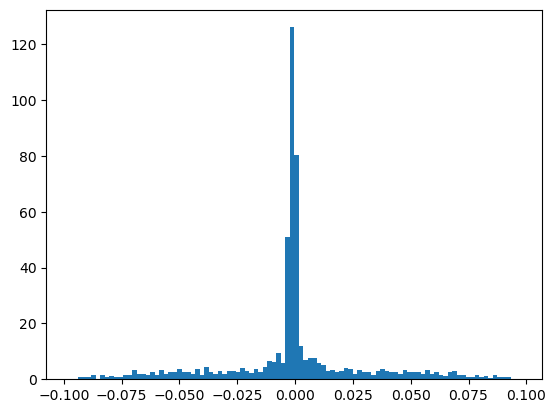

In [7]:
plt.hist((pred_matrix - truth_matrix).flatten(), bins = 100, density = True)
plt.show()

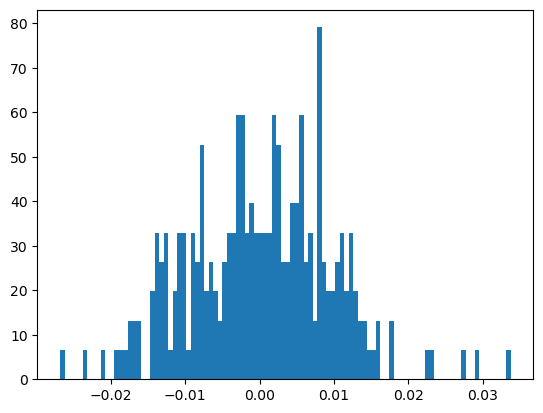

In [8]:
plt.hist(-truth_parameters[:,:,1].flatten(), bins = 100, density = True)
plt.show()

In [24]:
pred_matrix_1 = rotation_matrix(parameters[4,0], parameters[4,1], parameters[4,2])
truth_matrix_1 = rotation_matrix(truth_parameters[0,4,0], truth_parameters[0,4,1], truth_parameters[0,4,2])
np.matmul(np.linalg.inv(pred_matrix_1), truth_matrix_1)

array([[ 9.88847853e-01, -6.78955216e-02,  9.49133967e-02],
       [ 6.75812228e-02,  9.97687719e-01,  7.19763275e-03],
       [-9.51837835e-02, -7.33719538e-04,  9.95459226e-01]])

In [25]:
truth_matrix_1

array([[ 9.99848245e-01, -1.53432069e-02,  9.04035243e-04],
       [ 1.53501296e-02,  9.99848344e-01, -8.22575230e-03],
       [-7.77688721e-04,  8.23865771e-03,  9.99965759e-01]])

In [26]:
np.linalg.inv(pred_matrix_1)

array([[ 0.98989188, -0.05348651,  0.09358174],
       [ 0.05227378,  0.99851462,  0.01536444],
       [-0.09426452, -0.01038314,  0.99549312]])

In [12]:
import uproot
file = uproot.open("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/repropagation.root")
tree = file["particles"]


In [4]:
file["particles;6"]

<TTree 'particles' (23 branches) at 0x025a6efd9a30>

In [14]:
tree["q"].array()

<Array [[-1], [-1], [-1], ..., [-1], [-1], [-1]] type='92778 * var * float64'>

In [116]:
file[""]

<ReadOnlyDirectory '/' at 0x028c8e4f4d30>

In [30]:
df = Generate_DataFrame_From_ROOT(input_dir + "0/", 0)
df["Q_FIT"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1810    1.0
1811    1.0
1812    1.0
1813    1.0
1814    1.0
Name: Q_FIT, Length: 1815, dtype: float64

In [45]:
test_offsets = df_offsets[df_offsets["Q_FIT"] == 1]

In [56]:
test = df[df["Q_FIT"] == -1]

In [57]:
PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test["PX_TRUTH"],test["PY_TRUTH"], test["PZ_TRUTH"], -test["Q_FIT"], 1, 4000)

In [58]:
test["Y_TRUTH_1"]

0        -747.131775
1         596.087952
2       -1397.667358
3        -391.787811
4        1412.434082
            ...     
92803     609.988403
92804     599.028809
92805    -960.005127
92806    1042.020142
92807   -1119.008667
Name: Y_TRUTH_1, Length: 92808, dtype: float64

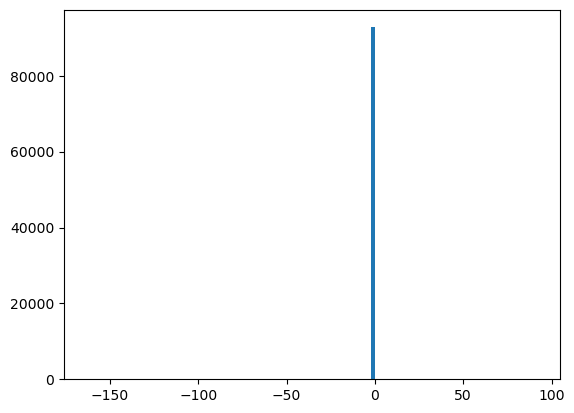

0.003480780286544749
0.0034596474692872767
0.6832440336351355


In [59]:
test_4 = test["Y_TRUTH_4"] - test["Y_TRUTH_1"] - 3*test["PY_TRUTH"]/test["PX_TRUTH"]*500 - DY - 4000*PY/PX

plt.hist(test_4, bins = 100)
plt.show()
print(np.median(test_4))
print(np.mean(test_4))
print(np.std(test_4))

{'whiskers': [<matplotlib.lines.Line2D at 0x20b8a882c70>,
 'caps': [<matplotlib.lines.Line2D at 0x20b87517a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b8a8820a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20b874ea250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b874eabe0>],
 'means': []}

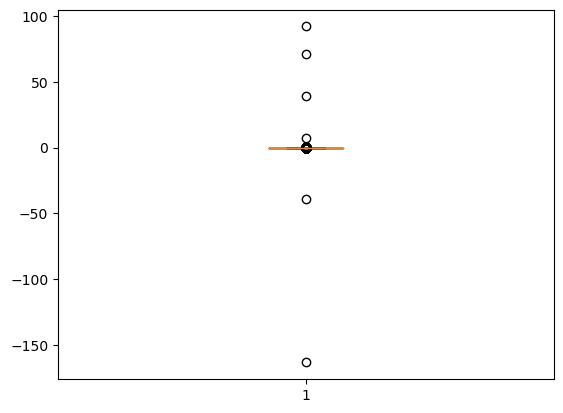

In [60]:
plt.boxplot(test_4)

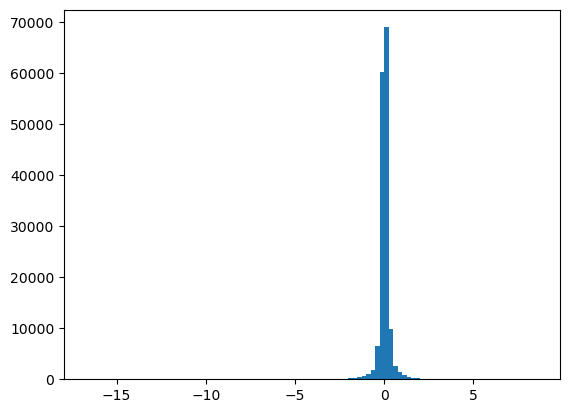

16.026980383912814

In [82]:
y = df_offsets["PRED_Y_4"] - df["LOCAL_Y_HIT_4"]
plt.hist(y, bins = 100)
plt.show()
np.median(y)*1000


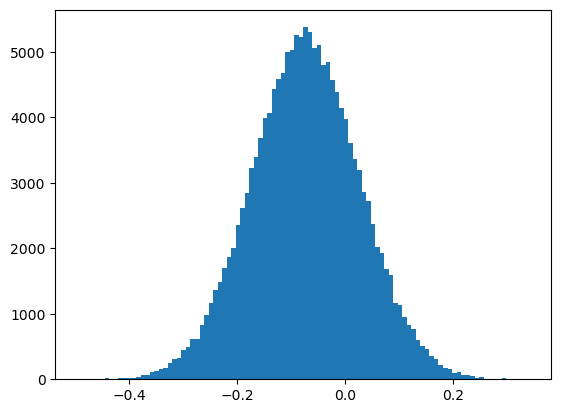

-73.6083984375

In [83]:
y = df["Y_TRUTH_4"] - df["LOCAL_Y_HIT_4"]
plt.hist(y, bins = 100)
plt.show()
np.median(y)*1000

In [91]:
y = df["Y_TRUTH_4"] - df_offsets["PRED_Y_4"]
y = y[(y > -0.17891789) & (y < -0.00247224)]

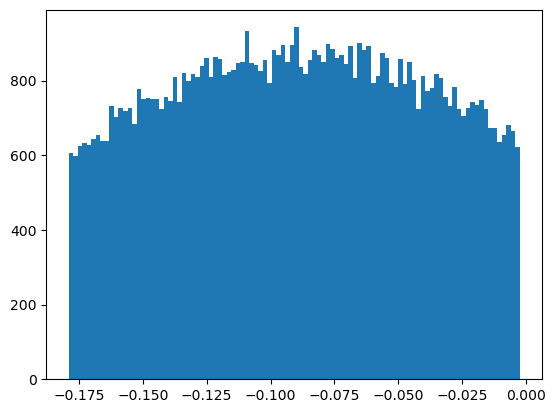

-89.7473387887544

In [92]:
plt.hist(y, bins = 100)
plt.show()
np.median(y)*1000

In [114]:
res_main = (parameters - truth_parameters)*1000

In [115]:
res_main[]

array([ 37.12665953,  41.63898318,  44.30543202,  26.44834424,
        30.03229759,  31.07954834,  27.2480932 ,  30.65201399,
        32.31733709,  10.29348067,  10.68237281,  23.77369629,
        27.31679281,  29.16885005,  10.70343487,  47.76360663,
        51.62646589,  53.26632033,  78.10197936,  84.83047528,
        89.54855165,  39.17921194,  43.75028045,  45.76235386,
        34.69427729,  39.26961383,  41.96939346,  45.54064516,
        50.08071091,  52.00690246,  10.12328711,  17.40699509,
        20.15631781,  21.036038  ,  10.16092023,  22.74633292,
        26.0811245 ,  27.19405886,  15.11443035,  17.42878745,
        17.03260221,  89.21263752,  98.03022892, 104.83754146,
        85.42104268,  10.19911993,  94.20256083,  10.57702031,
       100.43047665,  11.59520318,  14.39425676,  17.48743872,
        19.25708017])

In [124]:
res_main[1]

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.67404986,
         4.431586  ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.57453388,
        -0.53659905],
       [ 0.        ,  0.        ,  0.        ,  0.        , 37.12665953,
        -3.97649454],
       [ 0.        ,  0.        ,  0.        ,  0.        , 41.63898318,
        -4.31579361],
       [ 0.        ,  0.        ,  0.        ,  0.        , 44.30543202,
        -4.400205  ]])

In [122]:
for i in range(0, 50):
    print(i)
    print(res_main[i][np.abs(res_main[i]) > 10])
    print("\n")

0
[-54.48210313 -57.33324627 -60.79545269]


1
[37.12665953 41.63898318 44.30543202]


2
[]


3
[-10.54540112]


4
[26.44834424 30.03229759 31.07954834]


5
[-21.46013869 -22.19520435 -24.52319963]


6
[-11.67804403 -12.54588358 -12.67323051]


7
[27.2480932  30.65201399 32.31733709]


8
[]


9
[-23.86503916 -24.83057085 -27.3546473 ]


10
[-10.65395888 -10.76393406]


11
[ -87.59443118  -94.159045   -100.8035552 ]


12
[10.29348067 10.68237281]


13
[23.77369629 27.31679281 29.16885005 10.70343487]


14
[-20.41823267 -20.85415257 -22.6246504 ]


15
[-17.45970108 -18.15694    -20.64115359]


16
[-29.01214324 -10.22583384 -30.10790898 -10.95029413 -32.7269959
 -11.09021451]


17
[47.76360663 51.62646589 53.26632033]


18
[-16.43106198 -16.34003003 -17.6185836 ]


19
[-11.86150061 -11.75747134 -13.59078554]


20
[-13.49697273 -12.96306501 -13.96899545]


21
[78.10197936 84.83047528 89.54855165]


22
[-39.73036017 -41.3558899  -43.83361282]


23
[-32.11171584 -33.74972899 -36.87608745]




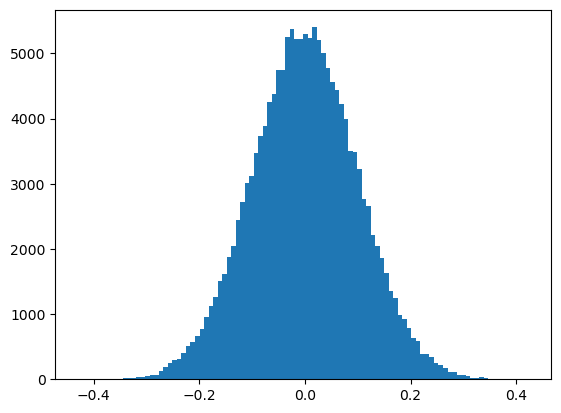

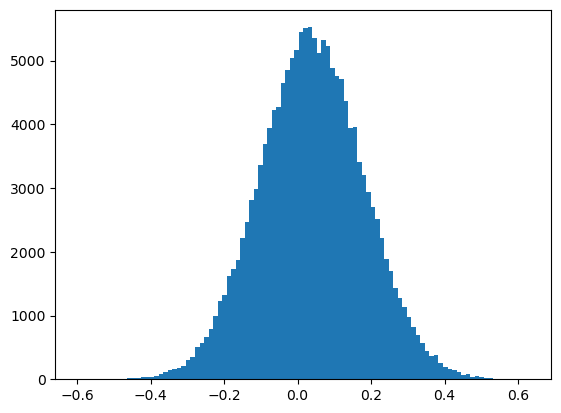

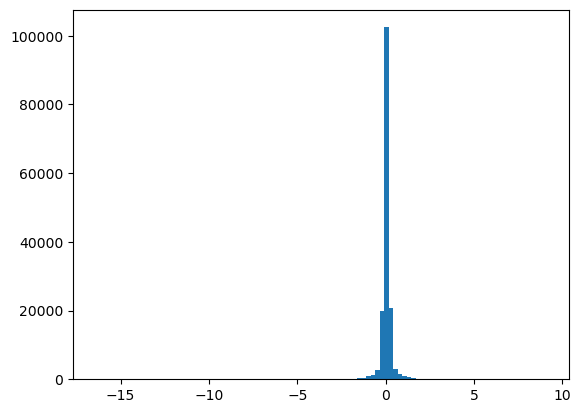

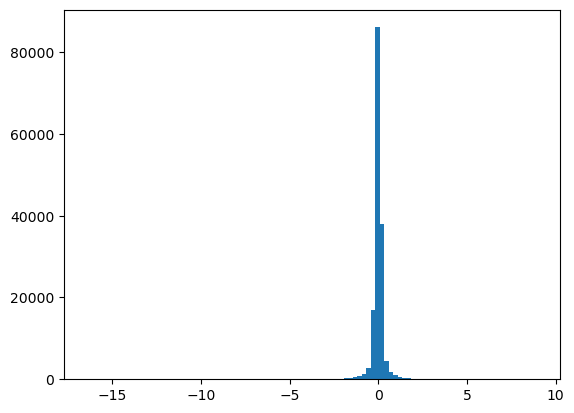

In [134]:
plt.hist(df_offsets_i["PRED_Y_2"] - df_i["Y_TRUTH_2"], bins = 100)
plt.show()

plt.hist(df_offsets_i["PRED_Y_2"] - df_i["LOCAL_Y_HIT_2"], bins = 100)
plt.show()

plt.hist(df_offsets_i["PRED_Y_4"] - df_i["Y_TRUTH_4"], bins = 100)
plt.show()

plt.hist(df_offsets_i["PRED_Y_4"] - df_i["LOCAL_Y_HIT_4"], bins = 100)
plt.show()

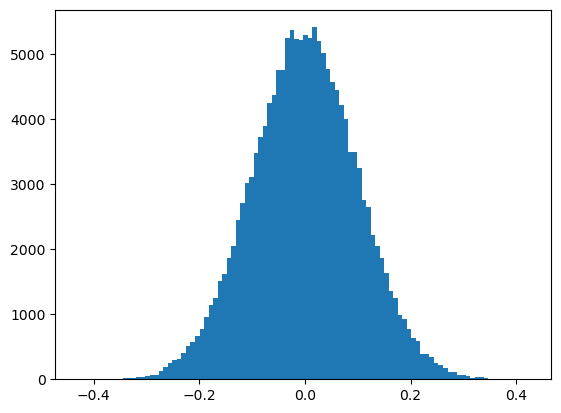

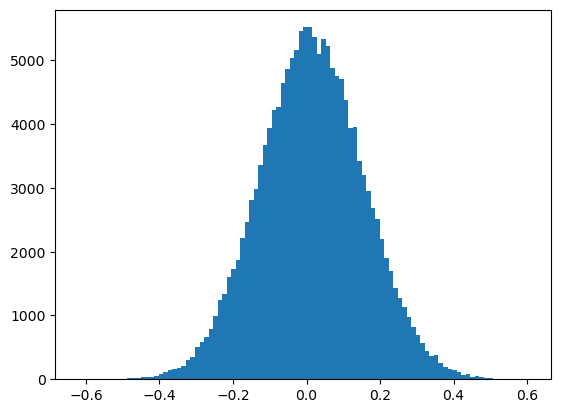

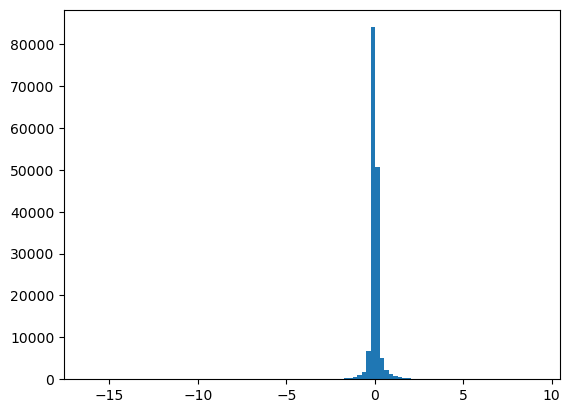

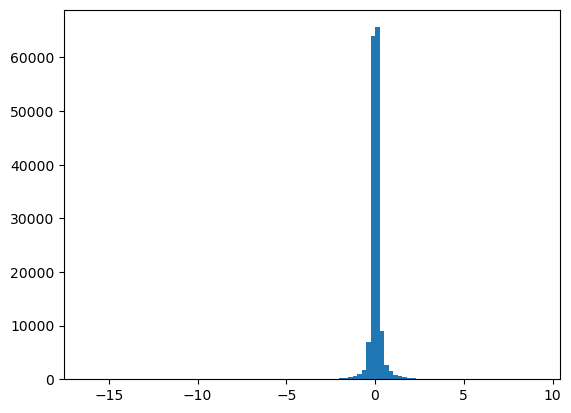

In [136]:
plt.hist(df_offsets_i["PRED_Y_2"] - df_i["Y_TRUTH_2"], bins = 100)
plt.show()

plt.hist(df_offsets_i["PRED_Y_2"] - df_i["LOCAL_Y_HIT_2"], bins = 100)
plt.show()

plt.hist(df_offsets_i["PRED_Y_4"] - df_i["Y_TRUTH_4"], bins = 100)
plt.show()

plt.hist(df_offsets_i["PRED_Y_4"] - df_i["LOCAL_Y_HIT_4"], bins = 100)
plt.show()

In [297]:
df = df_i[np.abs((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]) < 0.01]

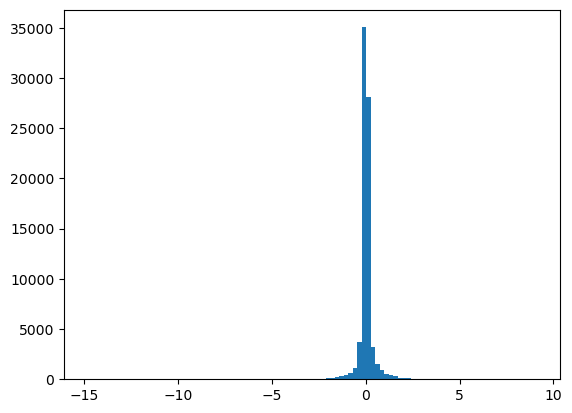

13.911808822371086
0.45912886547953924
[ 0.          0.          0.          0.         24.24240033  2.31547263]


In [307]:
print(len(test))

14780


In [171]:
PX_TEST = df_i["P_FIT"]*np.cos(df_i["PHI_FIT"])*np.sin(df_i["THETA_FIT"])
PY_TEST = df_i["P_FIT"]*np.sin(df_i["PHI_FIT"])*np.sin(df_i["THETA_FIT"])
PZ_TEST = df_i["P_FIT"]*np.cos(df_i["THETA_FIT"])

In [172]:
DELTA_X_CURR = df_i["PX_TRUTH"] - df_i["FIT_PX_1"]
DELTA_Y_CURR = df_i["PY_TRUTH"] - df_i["FIT_PY_1"]
DELTA_Z_CURR = df_i["PZ_TRUTH"] - df_i["FIT_PZ_1"]

DELTA_X_NEW = df_i["PX_TRUTH"] - PX_TEST
DELTA_Y_NEW = df_i["PY_TRUTH"] - PY_TEST
DELTA_Z_NEW = df_i["PZ_TRUTH"] - PZ_TEST

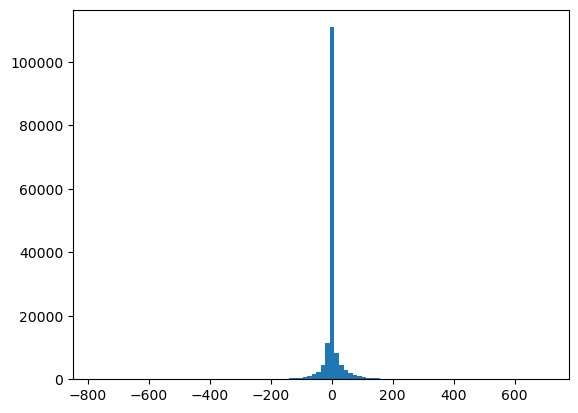

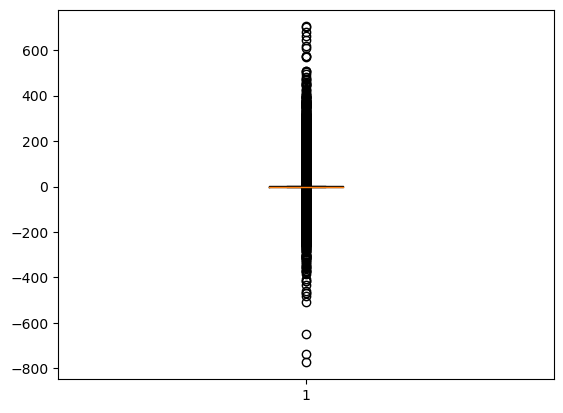

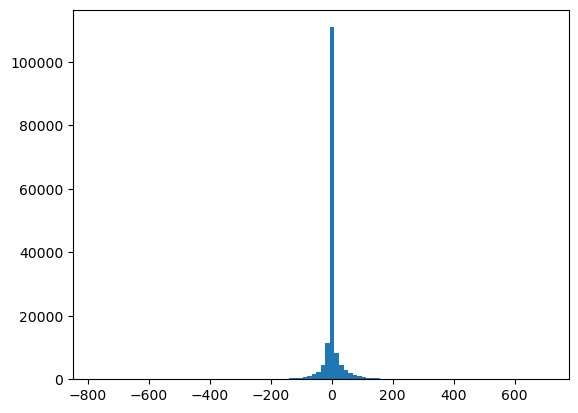

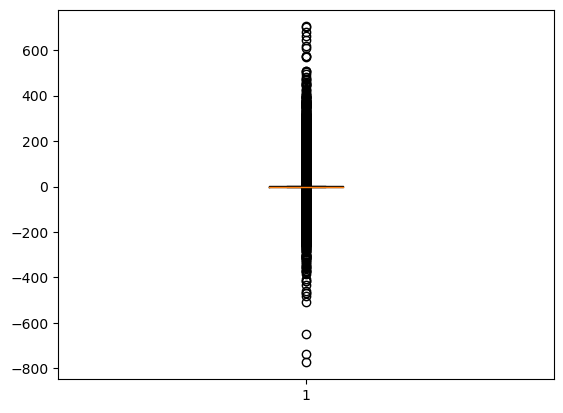

X CURRENT
2.2168635750416326
-0.0005006790161132812
33.673181661785485
X NEW
2.216863261769835
-0.0005000745654806238
33.673181516350795


In [176]:
plt.hist(DELTA_X_CURR, bins = 100)
plt.show()

plt.boxplot(DELTA_X_CURR)
plt.show()

plt.hist(DELTA_X_NEW, bins = 100)
plt.show()

plt.boxplot(DELTA_X_NEW)
plt.show()

print("X CURRENT")
print(np.mean(DELTA_X_CURR))
print(np.median(DELTA_X_CURR))
print(np.std(DELTA_X_CURR))
print("X NEW")
print(np.mean(DELTA_X_NEW))
print(np.median(DELTA_X_NEW))
print(np.std(DELTA_X_NEW))

In [181]:
DELTA_X_CURR[np.abs(DELTA_X_CURR) < 1]

0        -0.052322
2        -0.005543
8        -0.481567
18        0.430847
19       -0.070747
            ...   
156702   -0.247459
156705   -0.021019
156707   -0.750793
156708    0.028318
156709    0.001291
Length: 77975, dtype: float64

In [182]:
DELTA_X_CURR

0         -0.052322
1         23.538696
2         -0.005543
3         -3.253113
4         -6.247559
            ...    
156705    -0.021019
156706   -10.011597
156707    -0.750793
156708     0.028318
156709     0.001291
Length: 156710, dtype: float64

In [260]:
corr = df.corrwith(df["PX_RES"])
corr[corr > 0.1]

P_FIT       0.610007
P_TRUTH     0.617320
PX_TRUTH    0.617320
CHI2SUM     0.268031
FIT_PX_6    0.610005
FIT_PX_5    0.610005
FIT_PX_4    0.610005
FIT_PX_3    0.610005
FIT_PX_2    0.610006
FIT_PX_1    0.610007
PX_RES      1.000000
dtype: float64

In [272]:
corr_test = np.abs(df["FIT_PX_3"] - df["FIT_PX_1"])

In [394]:
corr_test = df["CHI2SUM"]

[[1.         0.02105966]
 [0.02105966 1.        ]]


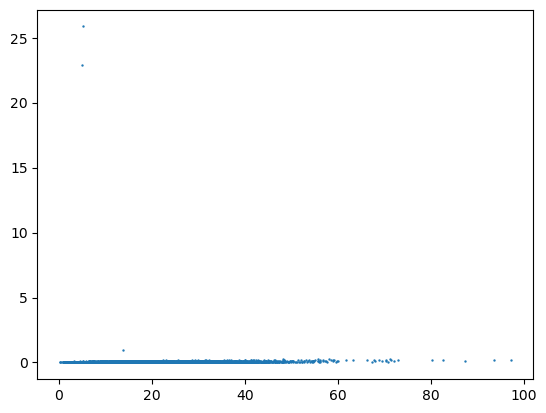

In [396]:
print(np.corrcoef(df["PX_RES"], corr_test))
plt.scatter(corr_test, np.abs(df["PX_RES"]), s = 0.5)
plt.show()

In [323]:
corr = df_chi2filter.corrwith(df_chi2filter["PX_RES"])
corr[corr > 0.1]

P_FIT             0.688153
P_TRUTH           0.688954
PX_TRUTH          0.688954
FIT_PX_6          0.688153
FIT_PX_5          0.688153
FIT_PX_4          0.688153
FIT_PX_3          0.688153
FIT_PX_2          0.688153
FIT_PX_1          0.688153
Y_TRUTH_3         0.104648
Y_TRUTH_2         0.104834
Y_TRUTH_1         0.105019
GLOBAL_Y_HIT_3    0.104650
GLOBAL_Y_HIT_2    0.104836
GLOBAL_Y_HIT_1    0.105020
LOCAL_Y_HIT_3     0.104650
LOCAL_Y_HIT_2     0.104836
LOCAL_Y_HIT_1     0.105020
FIT_Y_HIT_3       0.104650
FIT_Y_HIT_2       0.104836
FIT_Y_HIT_1       0.105021
PX_RES            1.000000
dtype: float64

In [402]:
df_chi2filter = df[df["CHI2SUM"] < 4]

In [403]:
corr_test = df_chi2filter["CHI2SUM"]

[[1.        0.0372323]
 [0.0372323 1.       ]]


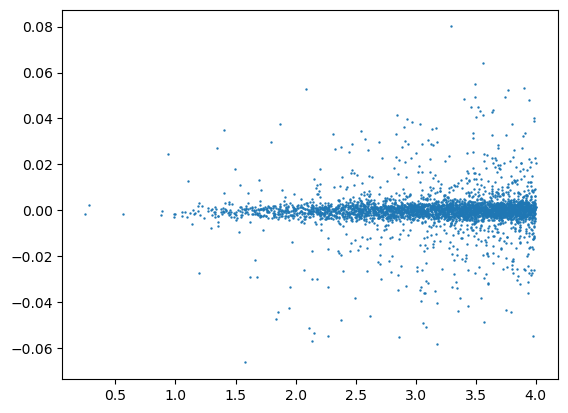

In [404]:
print(np.corrcoef(df_chi2filter["PX_RES"], corr_test))
plt.scatter(corr_test, df_chi2filter["PX_RES"], s = 0.5)
plt.show()

In [354]:
df_chi_p_filter = df_chi2filter[(df_chi2filter["P_FIT"] < 1000)]
print(len(df_chi_p_filter))

57663


In [347]:
df_p_filter = df[(df["P_FIT"] < 1000)]
print(len(df_p_filter))

110148


[[1.         0.23926138]
 [0.23926138 1.        ]]


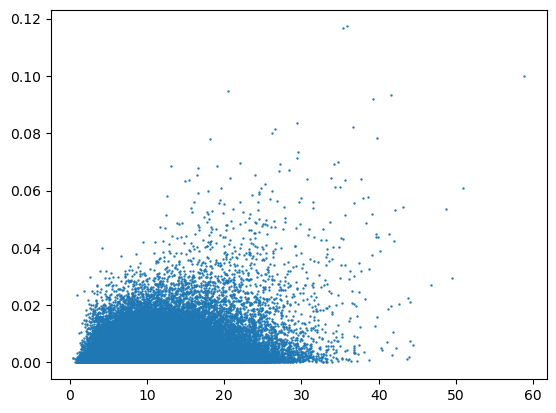

In [348]:
corr_test = df_p_filter["CHI2SUM"]
print(np.corrcoef(df_p_filter["PX_RES"], corr_test))
plt.scatter(corr_test, df_p_filter["PX_RES"], s = 0.5)
plt.show()

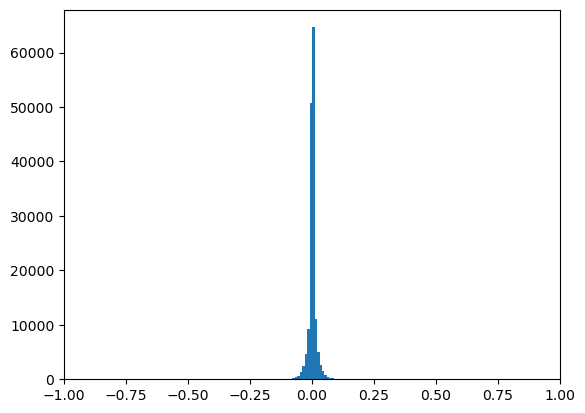

0.0007983800366263741
25.862883695999685


In [378]:
plt.hist(df["PX_RES"], bins = np.arange(-1, 1.01, 0.01))
plt.xlim(-1, 1)
plt.show()

print(np.mean(df["PX_RES"]))
print(np.max(np.abs(df["PX_RES"])))

In [390]:
df_chi2filter = df_chi2filter[np.abs(df_chi2filter["FIT_PX_1"] - df_chi2filter["FIT_PX_2"]) < 0.01]

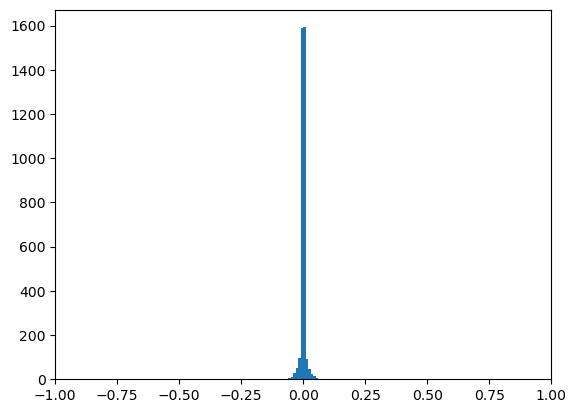

-2.724123864321881e-05
0.08005958529810421
3550
2.265374233442029


In [405]:
plt.hist(df_chi2filter["PX_RES"], bins = np.arange(-1, 1.01, 0.01))
plt.xlim(-1, 1)
plt.show()

print(np.median(df_chi2filter["PX_RES"]))
print(np.max(np.abs(df_chi2filter["PX_RES"])))
print(len(df_chi2filter))
print(len(df_chi2filter)/len(df)*100)

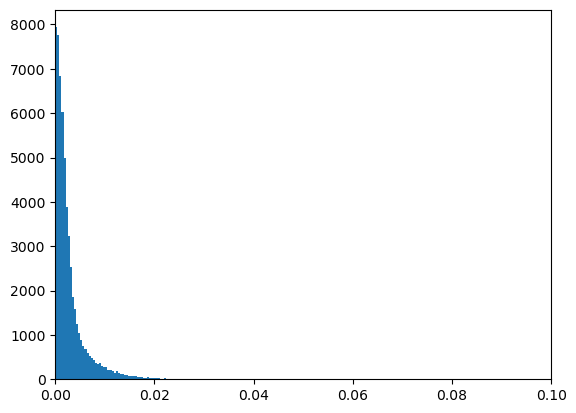

0.0017039035344823435
0.042091975562416964
57663
36.7959925977921


In [345]:
plt.hist(df_chi_p_filter["PX_RES"], bins = 100)
plt.xlim(0, 0.1)
plt.show()

print(np.median(df_chi_p_filter["PX_RES"]))
print(np.max(df_chi_p_filter["PX_RES"]))
print(len(df_chi_p_filter))
print(len(df_chi_p_filter)/len(df)*100)

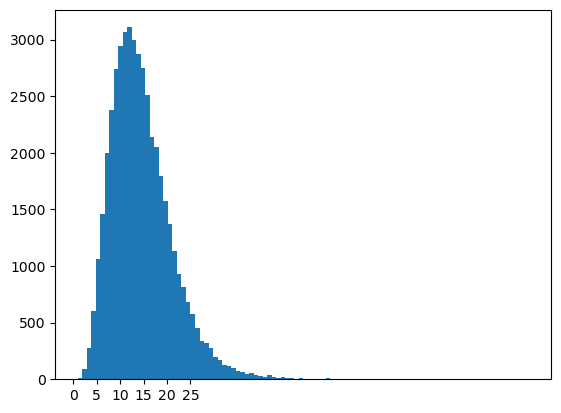

In [418]:
plt.hist(df[(np.abs(df["P_FIT"]) > 1000)]["CHI2SUM"], bins = 100)
plt.xticks([0, 5, 10, 15, 20, 25])
plt.show()

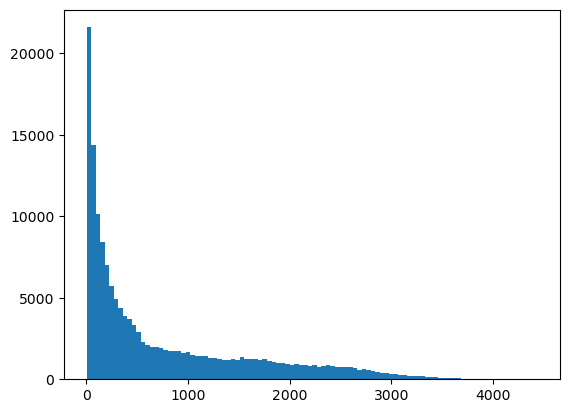

In [445]:
plt.hist(df["P_FIT"], bins = 100)

plt.show()

In [6]:
df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES
0,-0.000929,-0.001386,1.571747,1076.166016,-1.023408,-1.0,1076.019165,-1.0,1076.017700,-1.491882,...,-418.099762,-417.505371,-416.945160,-427.073212,-426.597076,-426.120972,-418.027466,-417.551575,-417.075897,-0.000136
1,-0.001022,-0.001958,1.570062,978.805603,0.718839,-1.0,979.386108,-1.0,979.383972,-1.919279,...,217.915817,217.461609,217.220184,224.871964,224.504761,224.137589,217.895889,217.528732,217.161545,0.000593
2,-0.001814,-0.000744,1.570001,551.219299,0.438659,-1.0,550.823730,-1.0,550.823425,-0.409713,...,144.755905,144.315094,143.949203,152.370636,151.970825,151.570953,144.770981,144.371658,143.973038,-0.000718
3,-0.018341,-0.006908,1.563853,54.521736,0.378584,-1.0,54.478565,-1.0,54.475952,-0.376213,...,-148.022598,-151.341934,-154.755127,-81.883408,-85.355522,-88.830673,-147.902924,-151.371384,-154.839478,-0.000792
4,-0.006557,-0.004867,1.573529,152.508026,-0.416755,-1.0,152.588745,-1.0,152.586365,-0.742523,...,333.690308,334.841949,336.173706,307.545746,308.914276,310.282349,333.533264,334.899597,336.265594,0.000529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19129,0.008331,-0.004392,1.577964,120.039139,-0.860373,1.0,120.028091,1.0,120.023849,-0.527432,...,-112.099304,-108.450043,-104.902039,-180.030640,-176.453598,-172.876343,-112.058731,-108.479103,-104.897385,-0.000092
19130,0.059436,-0.016523,1.582683,16.824717,-0.199979,1.0,16.831026,1.0,16.827539,-0.278092,...,-228.837128,-222.920334,-217.046677,-342.033264,-336.030365,-330.049622,-228.858505,-222.934082,-217.010223,0.000375
19131,0.003154,0.002681,1.569070,317.033417,0.547347,1.0,316.727325,1.0,316.725708,0.850119,...,206.702866,206.108521,205.137787,223.299225,222.434418,221.569458,206.861496,205.997086,205.133270,-0.000967
19132,0.240130,0.002378,1.567763,4.164406,0.012631,1.0,4.168149,1.0,4.168118,0.009939,...,23.945257,22.415464,20.791656,53.639904,52.116028,50.603558,23.947981,22.398272,20.806568,0.000898


In [4]:
df = df_i
df["PX_RES"] = (df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]
df["PY_RES"] = (df_i["PY_TRUTH"] - df_i["FIT_PY_1"])/df_i["PY_TRUTH"]

NameError: name 'df_i' is not defined

In [180]:
df_i["PX_RES"] = (df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]
df_i["PY_RES"] = (df_i["PY_TRUTH"] - df_i["FIT_PY_1"])/df_i["PY_TRUTH"]

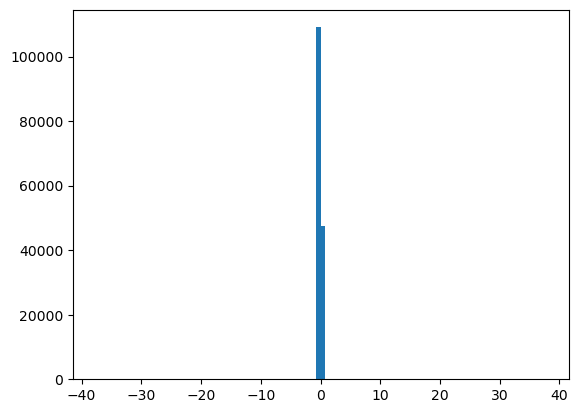

-4.743819442580843
0.19820865271475435
[ 0.          0.          0.          0.         -2.58313312  3.23132261]


In [59]:
test_df = df[(np.abs(df["PX_RES"]) < 0.1)]

PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["PX_TRUTH"],test_df["PY_TRUTH"], test_df["PZ_TRUTH"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"]))
print(truth_parameters[13][2]*1000)

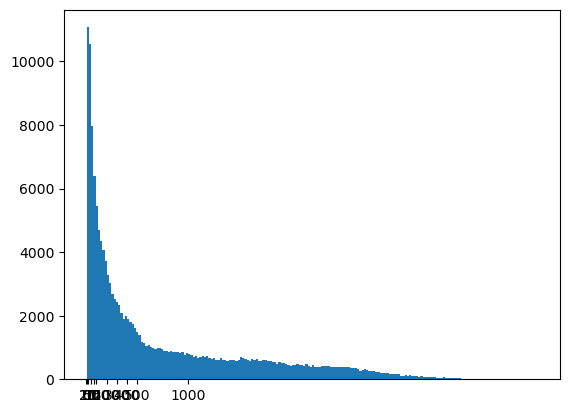

In [94]:
plt.hist(df["P_FIT"], bins = 200)
plt.xticks([0, 10, 20, 50, 75, 100, 200, 300, 400, 500, 1000])
plt.show()

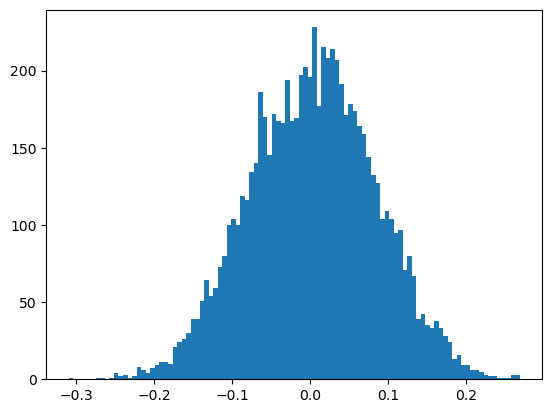

4.8560875460452735
0.0809375163249385
[  0.           0.           0.           0.         -64.97839312
 -37.56669894]


,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES
8,-0.000890,-0.000344,1.571290,1123.366333,-0.554862,-1.0,1129.994629,-1.0,1129.994385,-0.386031,...,-203.834641,-203.737610,-208.815033,-208.568161,-208.321289,-204.124054,-203.877136,-203.630203,0.005866,0.000301
25,-0.000942,-0.001689,1.571690,1062.128662,-0.949410,-1.0,1067.852783,-1.0,1067.850830,-1.804224,...,-115.820251,-115.388466,-124.841148,-124.392990,-123.944824,-116.326317,-115.878571,-115.431236,0.005360,0.005711
107,-0.000670,0.000532,1.569783,1492.439209,1.511658,-1.0,1503.057617,-1.0,1503.056641,0.802047,...,276.217499,275.539154,286.276672,285.770233,285.263794,276.654175,276.147705,275.641266,0.007065,0.010894
115,-0.000428,0.001726,1.570366,2337.118896,1.005109,-1.0,2337.887451,-1.0,2337.883789,4.035921,...,169.306824,168.852463,173.468277,173.253342,173.038422,169.384659,169.169693,168.954697,0.000329,0.000537
128,-0.000871,-0.001039,1.570220,1148.458984,0.661621,-1.0,1137.853638,-1.0,1137.852783,-1.186864,...,120.765182,120.541153,126.530548,126.242447,125.954353,121.057014,120.768967,120.480934,-0.009320,-0.004950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156655,0.000946,-0.001894,1.572196,1056.670898,-1.478749,1.0,1053.915894,1.0,1053.912964,-1.998371,...,-343.612885,-342.801208,-357.561279,-356.861389,-356.161530,-344.263428,-343.563599,-342.863831,-0.002614,-0.001488
156662,0.000566,-0.001225,1.571278,1768.024170,-0.851989,1.0,1783.569092,1.0,1783.567505,-2.194380,...,-211.162903,-210.948792,-215.936020,-215.695267,-215.454498,-211.361298,-211.120468,-210.879562,0.008716,0.012827
156664,0.000535,-0.001673,1.570202,1870.274536,1.111567,1.0,1855.707520,1.0,1855.704590,-3.103548,...,64.701965,64.358818,70.595932,70.299095,70.002251,64.955742,64.658783,64.361725,-0.007850,-0.008137
156665,0.000656,-0.001362,1.570564,1524.851196,0.354397,1.0,1529.245605,1.0,1529.244141,-2.086565,...,-11.536841,-11.808483,-9.251505,-9.367600,-9.483692,-11.457044,-11.573165,-11.689322,0.002874,0.004597


In [60]:
test_df = df[(df["P_FIT"] > 1000) & (df["CHI2SUM"] < 10) & (np.abs(df["PX_RES"]) < 0.01)]

PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["FIT_PX_1"],test_df["FIT_PY_1"], test_df["FIT_PZ_1"], -test_df["Q_FIT"], 1, 4000)
test = test_df["Y_TRUTH_1"] + 3*test_df["PY_TRUTH"]/test_df["PX_TRUTH"]*500 + DY + 4000*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"]))
print(truth_parameters[11][2]*1000)
test_df

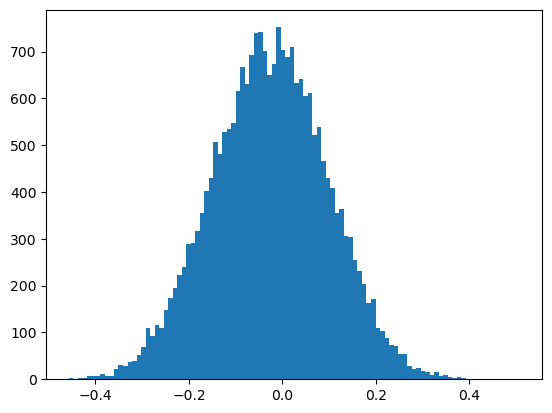

-25.469415892132474
0.12326392451099856
[  0.           0.           0.           0.         -28.24137558
  -0.63781907]


In [44]:
test_df = df_i[(np.abs(df_i["P_FIT"]) > 1000) & (df_i["CHI2SUM"] < 10)]

PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["PX_TRUTH"],test_df["PY_TRUTH"], test_df["PZ_TRUTH"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"]))
print(truth_parameters[0][2]*1000)

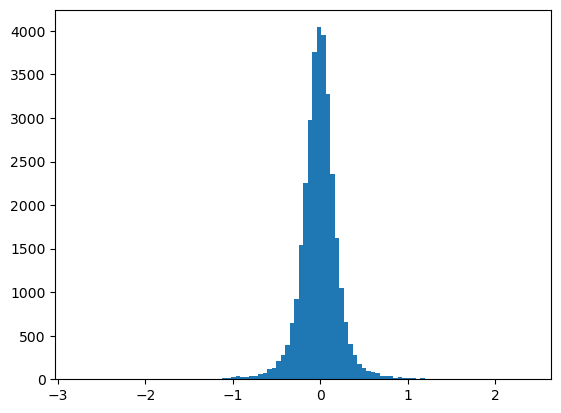

-8.712831064485727
0.22433720407175814
[  0.           0.           0.           0.         -28.19689676
  -0.8950444 ]


,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES
0,-0.006868,0.003542,1.564354,145.607681,0.938002,-1.0,145.633667,-1.0,145.629730,0.514953,...,261.267639,258.252228,325.958893,322.726257,319.494507,264.583313,261.356781,258.133423,0.000178,-0.001648
2,-0.055030,-0.002877,1.559127,18.171917,0.212056,-1.0,18.160948,-1.0,18.159637,-0.052293,...,-462.084839,-467.718170,-345.053070,-350.932617,-356.813080,-456.124817,-461.964813,-467.786987,-0.000604,0.000261
19,-0.009833,-0.000750,1.569540,101.698097,0.127751,-1.0,101.647774,-1.0,101.647667,-0.076371,...,-303.282928,-303.683624,-290.595123,-291.226135,-291.856720,-302.580383,-303.208557,-303.835419,-0.000495,0.001702
23,-0.080290,0.019369,1.569454,12.454847,0.016718,-1.0,12.447491,-1.0,12.445146,0.241052,...,77.897003,77.349846,91.446205,90.772934,90.089233,78.551445,77.917587,77.291573,-0.000591,-0.000706
26,-0.005407,-0.001441,1.571613,184.946503,-0.150988,-1.0,184.835220,-1.0,184.834961,-0.265980,...,27.057537,27.523096,18.890219,19.298496,19.706907,26.657337,27.066139,27.474743,-0.000602,-0.002002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156700,0.000560,-0.000945,1.570659,1784.511230,0.245838,1.0,1784.740234,1.0,1784.739380,-1.685542,...,130.108459,130.090729,131.554062,131.484940,131.415817,130.240921,130.171890,130.102921,0.000128,-0.000185
156701,0.021952,0.009062,1.575211,45.554020,-0.201113,1.0,45.550179,1.0,45.547863,0.412717,...,93.598457,95.869247,49.409180,51.626957,53.837765,91.338272,93.553535,95.768341,-0.000084,-0.000191
156702,0.217090,-0.007322,1.560413,4.606378,0.047831,1.0,4.603403,1.0,4.603031,-0.033698,...,148.448914,143.361206,255.026260,249.422073,244.155792,153.854401,148.516937,143.336945,-0.000646,-0.000756
156707,0.017500,0.008333,1.573436,57.143715,-0.150855,1.0,57.127689,1.0,57.125507,0.476027,...,177.717407,178.815231,151.342896,152.663559,153.982605,176.335159,177.647705,178.961014,-0.000281,-0.000262


In [90]:
test_df = df_i[(np.abs((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]) < 0.001) & (np.abs((df_i["PY_TRUTH"] - df_i["FIT_PY_1"])/df_i["PY_TRUTH"]) < 0.2)]
#test_df = pd.concat([test_df[test_df["Q_FIT"] == 1], test_df[test_df["Q_FIT"] == -1].sample(len(test_df[test_df["Q_FIT"] == 1]))], ignore_index = True)

PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["FIT_PX_1"],test_df["FIT_PY_1"], test_df["FIT_PZ_1"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX +500*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_5"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_5"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_5"]))
print(truth_parameters[0][3]*1000)
test_df

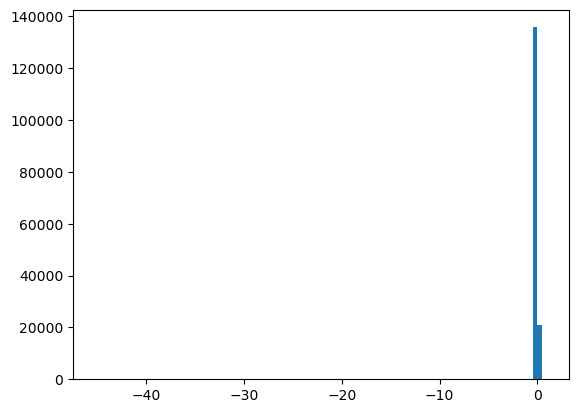

In [209]:
plt.hist((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"], bins = 100)
plt.show()

In [39]:
test_df[test_df["Q_FIT"] == 1]

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
20316,0.000645,-0.002100,1.570973,1550.240601,-0.273207,1.0,1572.623901,1.0,1572.620361,-3.306165,...,95.474037,97.106575,97.155411,97.277657,95.363869,95.452385,95.540909,97.045792,97.134178,97.222435
20317,0.000464,-0.001500,1.570000,2154.062500,1.715481,1.0,2105.970459,1.0,2105.967529,-3.153386,...,92.625427,85.644714,85.335045,84.796494,93.268120,92.869736,92.471359,85.698845,85.300514,84.902245
20318,0.000971,0.001170,1.570252,1029.506714,0.560448,1.0,1016.698059,1.0,1016.697205,1.191290,...,155.616119,150.977081,150.765732,150.443024,156.194046,155.921524,155.649002,151.016464,150.744064,150.471771
20319,0.000702,-0.002614,1.570254,1424.769775,0.772227,1.0,1416.189209,1.0,1416.184204,-3.700530,...,219.084396,214.382523,214.064301,213.632141,219.542358,219.270432,218.998535,214.376373,214.104767,213.833466
20320,0.000731,-0.001816,1.569838,1368.875000,1.312418,1.0,1396.827271,1.0,1396.824341,-2.557640,...,182.640656,174.767776,173.907333,173.683762,183.646851,183.168030,182.689194,174.548691,174.069656,173.590454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40627,0.000450,0.003131,1.569481,2223.710693,2.923811,1.0,2137.155029,1.0,2137.142578,6.692816,...,268.635773,257.355469,256.815735,256.017944,269.900787,269.243256,268.585724,257.407715,256.750214,256.092743
40628,0.000773,-0.001666,1.570419,1292.880493,0.487744,1.0,1301.254395,1.0,1301.252441,-2.170812,...,321.657288,318.517853,318.271149,318.131226,322.082245,321.893677,321.705048,318.498566,318.309937,318.121338
40629,0.000619,0.001287,1.570695,1614.411865,0.164092,1.0,1547.703247,1.0,1547.701904,2.024231,...,101.792770,101.191788,101.252136,100.943489,102.106071,102.055435,102.004799,101.144272,101.093575,101.042801
40630,0.000589,-0.002398,1.570018,1697.270020,1.320941,1.0,1700.921997,1.0,1700.916626,-4.077924,...,153.792557,147.210342,146.668411,146.294373,154.494476,154.105453,153.716415,147.102402,146.713303,146.324173


In [38]:
test_df[test_df["Q_FIT"] == -1]

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.000905,-0.000892,1.570482,1105.514404,0.347871,-1.0,1134.860840,-1.0,1134.860352,-1.009918,...,146.508133,143.717300,143.630783,143.324631,146.703217,146.545975,146.388718,143.714996,143.557709,143.400391
1,-0.000340,0.001583,1.570215,2940.304199,1.707914,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,183.406830,178.702972,178.172501,177.958923,184.027084,183.736755,183.446426,178.510849,178.220459,177.930038
2,-0.000942,-0.001270,1.570415,1061.386597,0.404714,-1.0,1056.371216,-1.0,1056.370239,-1.341055,...,-48.752838,-51.960674,-51.959427,-52.213905,-48.225327,-48.416100,-48.606873,-51.849663,-52.040367,-52.231037
3,-0.000961,-0.001452,1.571137,1040.785156,-0.354269,-1.0,1032.572510,-1.0,1032.571411,-1.503159,...,-123.822319,-120.682281,-120.792969,-120.576210,-124.158417,-123.987228,-123.816040,-120.906166,-120.735329,-120.564812
4,-0.000821,0.000177,1.570406,1217.704956,0.475206,-1.0,1189.089478,-1.0,1189.089355,0.208391,...,-14.987924,-18.357676,-18.560287,-18.814871,-14.681788,-14.876839,-15.071890,-18.387949,-18.583044,-18.778166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20311,-0.000654,0.003218,1.570681,1530.121826,0.176318,-1.0,1513.179321,-1.0,1513.171509,4.866340,...,142.273529,141.554352,141.457108,141.516312,142.552704,142.495819,142.438950,141.472000,141.414871,141.357498
20312,-0.000770,-0.001289,1.570972,1298.304077,-0.228188,-1.0,1315.118652,-1.0,1315.117554,-1.696714,...,-47.997417,-46.505028,-46.392147,-46.322144,-48.190998,-48.102821,-48.014660,-46.516289,-46.428242,-46.340290
20313,-0.000316,0.001273,1.570889,3169.113281,-0.292924,-1.0,3203.809082,-1.0,3203.806396,4.084350,...,-36.970757,-36.063347,-36.065163,-35.935177,-36.997440,-36.951141,-36.904842,-36.117786,-36.071529,-36.025314
20314,-0.000361,0.001044,1.571932,2766.872803,-3.141157,-1.0,2900.077393,-1.0,2900.073975,3.032371,...,-284.670197,-275.085419,-274.494080,-274.093262,-285.868561,-285.300995,-284.733429,-275.084900,-274.517303,-273.949677


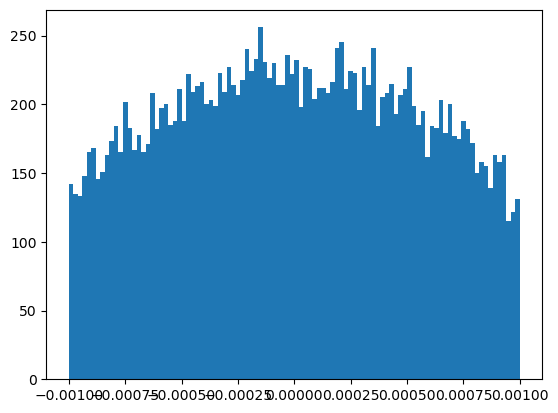

-2.7623960247209445e-06
-5.9235284805713255e-06
0.0005400200270009713
Shapiro-Wilk Test - Statistic: 0.9678834080696106 p-value: 0.0


c:\Users\luke\anaconda3\envs\mphys_env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [71]:
x = (test_df["PY_TRUTH"] - test_df["FIT_PY_1"])/test_df["PY_TRUTH"]
plt.hist(x, bins = 100)
plt.show()
print(np.mean(x))
print(np.median(x))
print(np.std(x))
from scipy import stats
shapiro_test_stat, shapiro_p_value = stats.shapiro(x)
print("Shapiro-Wilk Test - Statistic:", shapiro_test_stat, "p-value:", shapiro_p_value)

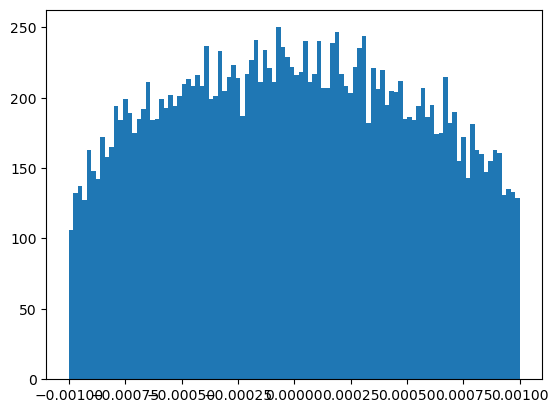

-4.753383272472318e-06
-8.208706849045453e-06
0.0005382479522792052
Shapiro-Wilk Test - Statistic: 0.9678348302841187 p-value: 0.0


In [72]:
x = (test_df["PX_TRUTH"] - test_df["FIT_PX_1"])/test_df["PX_TRUTH"]
plt.hist(x, bins = 100)
plt.show()
print(np.mean(x))
print(np.median(x))
print(np.std(x))
from scipy import stats
shapiro_test_stat, shapiro_p_value = stats.shapiro(x)
print("Shapiro-Wilk Test - Statistic:", shapiro_test_stat, "p-value:", shapiro_p_value)

In [208]:
len(x)

40126

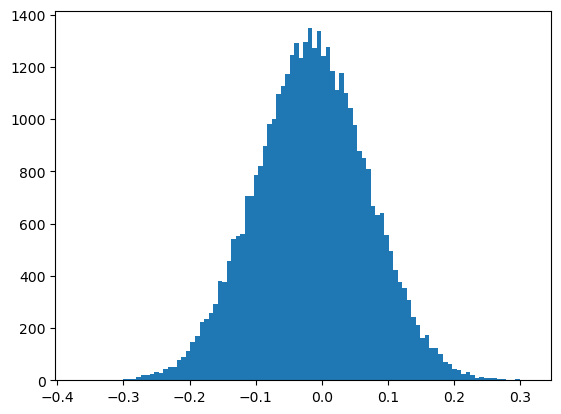

-15.31982421875


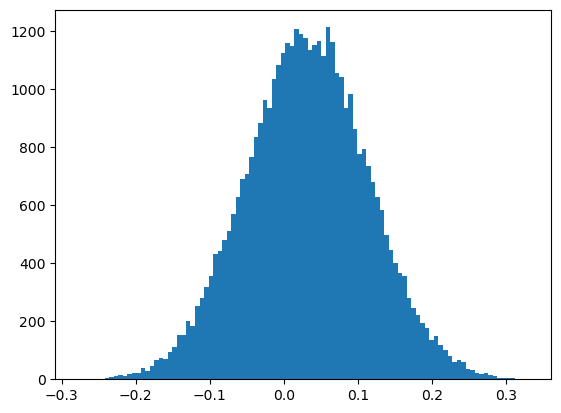

31.43310546875


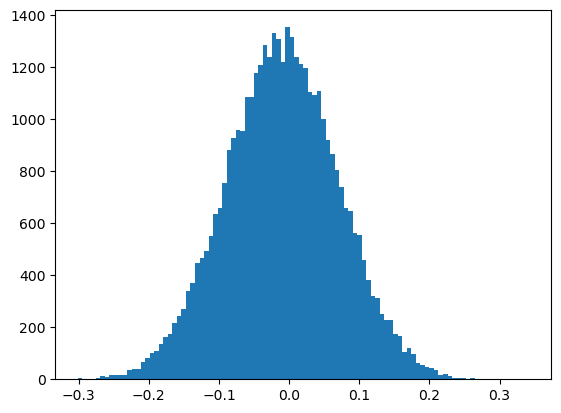

-9.8876953125


In [240]:
plt.hist(test_df["FIT_Y_HIT_4"] - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test_df["FIT_Y_HIT_4"] - test_df["LOCAL_Y_HIT_4"])*1000)

plt.hist(test_df["FIT_Y_HIT_5"] - test_df["LOCAL_Y_HIT_5"], bins = 100)
plt.show()
print(np.median(test_df["FIT_Y_HIT_5"] - test_df["LOCAL_Y_HIT_5"])*1000)

plt.hist(test_df["FIT_Y_HIT_6"] - test_df["LOCAL_Y_HIT_6"], bins = 100)
plt.show()
print(np.median(test_df["FIT_Y_HIT_6"] - test_df["LOCAL_Y_HIT_6"])*1000)

In [261]:
y_i = truth_parameters[0,:,4]

In [265]:
1/3*(2*y_i[2]-y_i[3]-y_i[4])

-0.018938387456687043

In [145]:
np.sum(df_i["Q_FIT"])

-28906.0

In [224]:
np.sum(test_df["Q_FIT"] - test_df["Q_TRUTH"])

0.0

In [271]:
df_i["NEW_PX"] = df_i["P_FIT"]*np.sin(df_i["THETA_FIT"])*np.cos(df_i["PHI_FIT"])
df_i["NEW_PY"] = df_i["P_FIT"]*np.sin(df_i["THETA_FIT"])*np.sin(df_i["PHI_FIT"])
df_i["NEW_PZ"] = df_i["P_FIT"]*np.cos(df_i["THETA_FIT"])

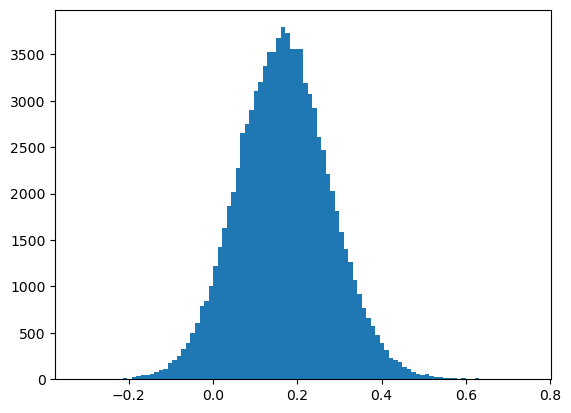

166.60248905901653
110.01766199828838
[  0.           0.           0.           0.         126.68837989
 -56.38752464]
39.914109170784585


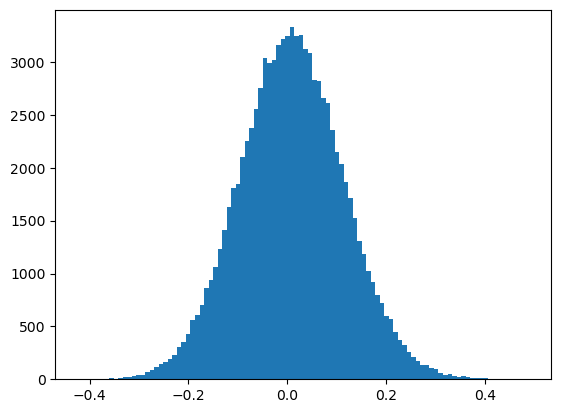

8.1713731519244
105.43751912330147
[  0.           0.           0.           0.         -36.76429497
  25.16650986]
44.9356681196715


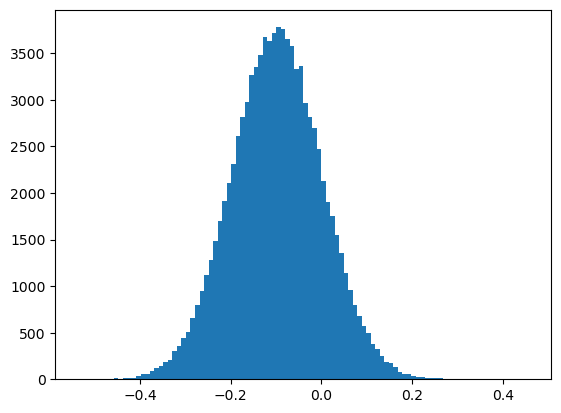

-98.51424587805013
99.54071132726762
[   0.            0.            0.            0.         -147.41400915
 -133.56247278]
48.899763271245774


,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,0.000618,-0.001299,1.570616,1618.351929,0.292400,1.0,1646.113525,1.0,1646.112061,-2.146385,...,150.091202,148.496490,148.310791,148.239487,150.262268,150.171295,150.080322,148.534241,148.443512,148.352997
1,0.000653,-0.002519,1.572291,1531.749512,-2.289489,1.0,1552.990356,1.0,1552.983643,-3.913030,...,-497.265747,-484.694214,-483.948883,-483.236938,-498.873535,-498.126434,-497.379303,-484.678101,-483.930908,-483.183624
2,0.004264,0.002498,1.569757,234.529343,0.243728,1.0,233.937958,1.0,233.937088,0.587798,...,-112.320023,-121.197357,-121.642570,-122.407074,-111.259201,-111.784027,-112.308548,-121.218834,-121.741692,-122.263138
3,0.000874,0.000942,1.570487,1143.568726,0.353575,1.0,1121.845947,1.0,1121.845337,1.057783,...,47.566551,44.960888,44.955330,44.885406,48.007645,47.853264,47.698879,45.074440,44.920006,44.765495
4,0.005708,-0.000778,1.570356,175.202728,0.077207,1.0,174.711777,1.0,174.711700,-0.135819,...,-238.330139,-242.047104,-242.290207,-242.513168,-237.844864,-238.067032,-238.289154,-242.061111,-242.282547,-242.503448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93969,-0.001783,-0.002291,1.570612,560.756714,0.103121,-1.0,561.259766,-1.0,561.258301,-1.284413,...,283.042389,281.313293,281.264008,280.992523,283.143921,283.048401,282.952972,281.332672,281.238434,281.145325
93970,-0.002568,0.000017,1.570384,389.378418,0.160634,-1.0,391.726379,-1.0,391.726349,0.007395,...,133.918091,130.199921,130.172592,129.902161,134.401489,134.187653,133.973953,130.346237,130.135254,129.926651
93971,-0.001430,-0.003085,1.570911,699.178162,-0.080045,-1.0,705.144165,-1.0,705.140808,-2.174343,...,-159.921631,-158.756760,-158.772141,-158.745514,-159.863617,-159.807358,-159.751068,-158.792542,-158.735886,-158.678925
93972,-0.001974,0.000199,1.569153,506.713715,0.832721,-1.0,509.290070,-1.0,509.289368,0.101601,...,266.561707,252.440720,251.698181,250.922104,268.220154,267.395111,266.570221,252.549805,251.726089,250.903397


In [294]:
test_df = df_i[(df_i["P_FIT"] > 100) & (df_i["CHI2SUM"] < 50)]
if len(test_df[test_df["Q_FIT"] == 1]) > len(test_df[test_df["Q_FIT"] == -1]):
    test_df = pd.concat([test_df[test_df["Q_FIT"] == -1], test_df[test_df["Q_FIT"] == 1].sample(len(test_df[test_df["Q_FIT"] == -1]))], ignore_index = True)
else:
    test_df = pd.concat([test_df[test_df["Q_FIT"] == 1], test_df[test_df["Q_FIT"] == -1].sample(len(test_df[test_df["Q_FIT"] == 1]))], ignore_index = True)
PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["FIT_PX_1"],test_df["FIT_PY_1"], test_df["FIT_PZ_1"], -test_df["Q_FIT"], 1, 4000)
PX_T, PY_T, PZ_T, DX_T, DY_T, DZ_T = sim.Propagate_B_Field(test_df["PX_TRUTH"],test_df["PY_TRUTH"], test_df["PZ_TRUTH"], -test_df["Q_FIT"], 1, 4000)
test = test_df["Y_TRUTH_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(truth_parameters[i][2]*1000)

print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000 - truth_parameters[i][2][4]*1000)

plt.hist(test + 500*PY/PX - test_df["LOCAL_Y_HIT_5"], bins = 100)
plt.show()
print(np.median(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000)
print(np.std(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000)
print(truth_parameters[i][3]*1000)

print(np.median(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000 - truth_parameters[i][3][4]*1000)

plt.hist(test + 1000*PY/PX - test_df["LOCAL_Y_HIT_6"], bins = 100)
plt.show()
print(np.median(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000)
print(np.std(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000)
print(truth_parameters[i][4]*1000)

print(np.median(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000 - truth_parameters[i][4][4]*1000)
test_df

In [285]:
np.max(df_i["CHI2SUM"])

96.54544067382812

In [318]:
df_i["PX_RES"] = (df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]
df_i["PY_RES"] = (df_i["PY_TRUTH"] - df_i["FIT_PY_1"])/df_i["PY_TRUTH"]

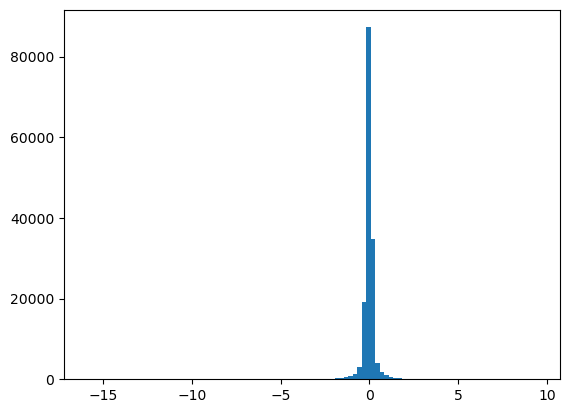

-25.029865767578485
384.2653299630935
[  0.           0.           0.           0.           5.79822177
 -19.20474354]
-30.828087536793223


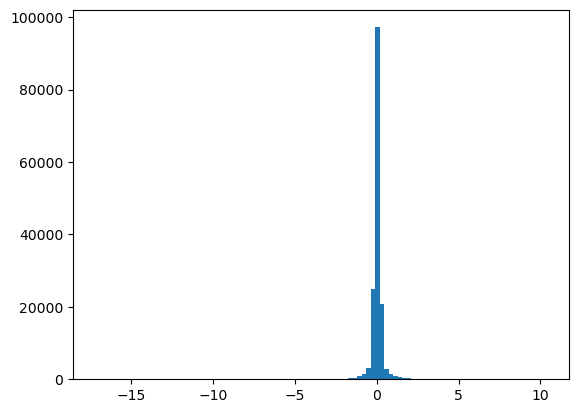

21.14480340777547
396.04505076779924
[ 0.          0.          0.          0.         53.48633825 58.4130731 ]
-32.34153484665208


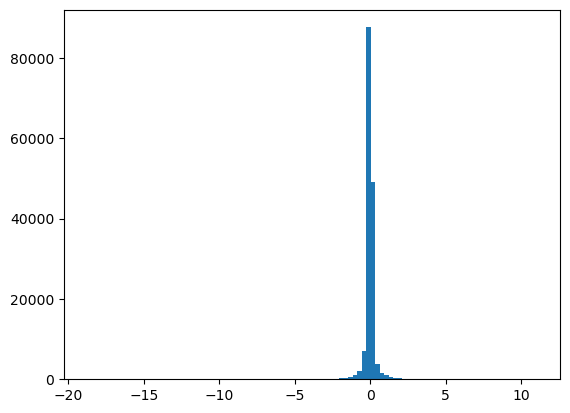

-20.735167517358377
413.81194207325524
[ 0.          0.          0.          0.         14.92526765  7.59916607]
-35.66043517142143


,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES,DY_RES,PY_AFTER_RES,PX_AFTER_RES,PYPX_AFTER_RES
0,-0.006860,0.003543,1.564354,145.782928,0.939148,-1.0,145.633667,-1.0,145.629730,0.514953,...,319.479584,264.584991,261.359192,258.136169,-0.001025,-0.002926,-0.000327,-0.000879,-0.001025,0.000146
1,-0.000897,-0.000891,1.570482,1115.205688,0.350787,-1.0,1134.860840,-1.0,1134.860352,-1.009918,...,146.379211,143.709229,143.552094,143.394913,0.017319,0.015767,0.021864,-0.084137,0.017319,-0.103244
2,-0.055025,-0.002877,1.559126,18.173553,0.212077,-1.0,18.160948,-1.0,18.159637,-0.052293,...,-356.823883,-456.124664,-461.960571,-467.781891,-0.000694,0.000261,0.000670,-0.000012,-0.000697,0.000684
3,-0.001718,-0.003955,1.569513,582.064880,0.747001,-1.0,577.678711,-1.0,577.673706,-2.283606,...,218.499039,207.631409,206.991409,206.350571,-0.007593,-0.008207,-0.003509,-0.017281,-0.007593,-0.009615
4,-0.000334,0.001583,1.570216,2990.049316,1.736453,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,183.437683,178.504028,178.213760,177.923431,-0.008825,-0.008643,0.001151,-0.006884,-0.008825,0.001924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156709,0.092202,-0.008958,1.583901,10.845787,-0.142122,1.0,10.875880,1.0,10.874511,-0.097390,...,38.123188,150.032700,156.536285,163.033875,0.002767,0.002467,-0.002448,0.000185,0.002804,-0.002626
156710,0.239960,0.002378,1.567763,4.167355,0.012641,1.0,4.168149,1.0,4.168118,0.009939,...,50.564930,23.942360,22.426668,20.815731,0.000190,0.002823,-0.000247,-0.000024,0.000209,-0.000233
156711,0.001598,-0.002514,1.570042,625.756653,0.472315,1.0,625.563660,1.0,625.561523,-1.572773,...,431.971405,425.557556,425.180237,424.802917,-0.000308,-0.000437,-0.000008,-0.000248,-0.000308,0.000060
156712,0.001697,-0.000060,1.572134,589.201050,-0.788099,1.0,589.563843,1.0,589.563293,-0.039468,...,-182.151321,-170.803055,-170.135101,-169.466736,0.000615,0.103478,0.005779,0.003297,0.000615,0.002684


In [331]:
test_df = df_i#[(df_i["P_FIT"] > 1000) & (df_i["CHI2SUM"] < 25) & (np.abs(df_i["PX_RES"]) < 0.005)]
#test_df = pd.concat([test_df[test_df["Q_FIT"] == -1], test_df[test_df["Q_FIT"] == 1].sample(len(test_df[test_df["Q_FIT"] == -1]))], ignore_index = True)

PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["FIT_PX_1"],test_df["FIT_PY_1"], test_df["FIT_PZ_1"], -test_df["Q_FIT"], 1, 4000)
PX_T, PY_T, PZ_T, DX_T, DY_T, DZ_T = sim.Propagate_B_Field(test_df["PX_TRUTH"],test_df["PY_TRUTH"], test_df["PZ_TRUTH"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX

test_df["DY_RES"] = (DY_T-DY)/DY_T
test_df["PY_AFTER_RES"] = (PY_T-PY)/PY_T
test_df["PX_AFTER_RES"] = (PX_T-PX)/PX_T
test_df["PYPX_AFTER_RES"] = (PY_T/PX_T-PY/PX)/(PY_T/PX_T)

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(truth_parameters[0][2]*1000)

print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000 - truth_parameters[0][2][4]*1000)

plt.hist(test + 500*PY/PX - test_df["LOCAL_Y_HIT_5"], bins = 100)
plt.show()
print(np.median(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000)
print(np.std(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000)
print(truth_parameters[0][3]*1000)

print(np.median(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000 - truth_parameters[0][3][4]*1000)

plt.hist(test + 1000*PY/PX - test_df["LOCAL_Y_HIT_6"], bins = 100)
plt.show()
print(np.median(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000)
print(np.std(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000)
print(truth_parameters[0][4]*1000)

print(np.median(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000 - truth_parameters[0][4][4]*1000)
test_df

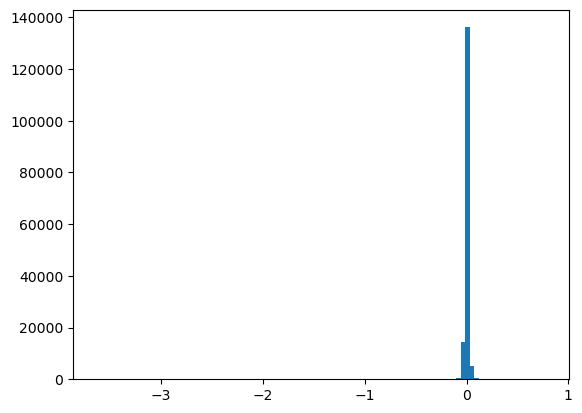

-0.020328037684427515

In [335]:
plt.hist(test_df["PX_AFTER_RES"], bins = 100)
plt.show()
np.median(test_df["PX_AFTER_RES"])*100

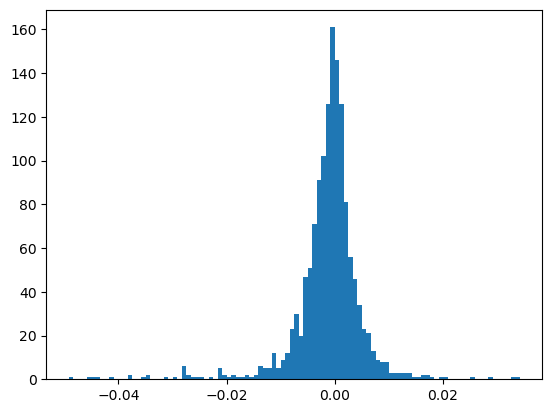

-0.0005451440809801644


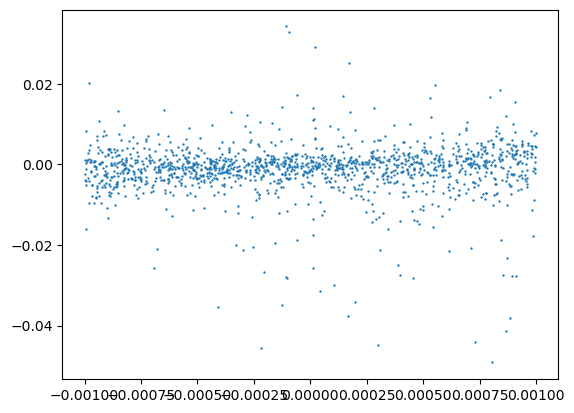

In [191]:
plt.hist(PY - PY_T, bins = 100)
plt.show()
print(np.median(PY - PY_T))
plt.scatter(test_df["PX_RES"],PY - PY_T, s=0.5)
plt.show()

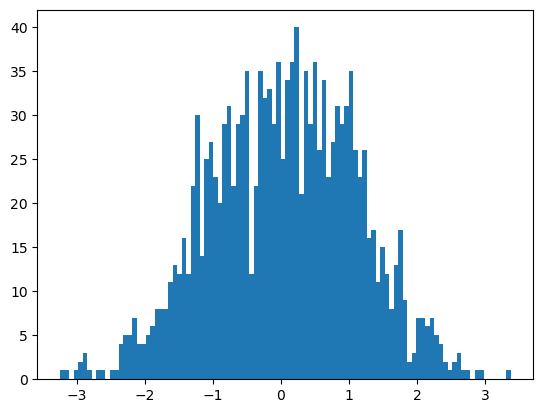

0.07824757165928986


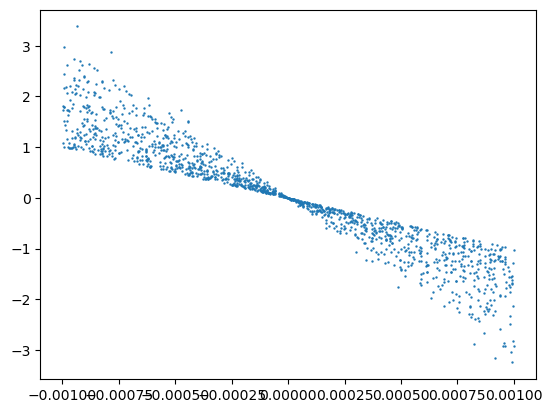

In [192]:
plt.hist(PX - PX_T, bins = 100)
plt.show()
print(np.median(PX - PX_T))
plt.scatter(test_df["PX_RES"],PX - PX_T, s=0.5)
plt.show()

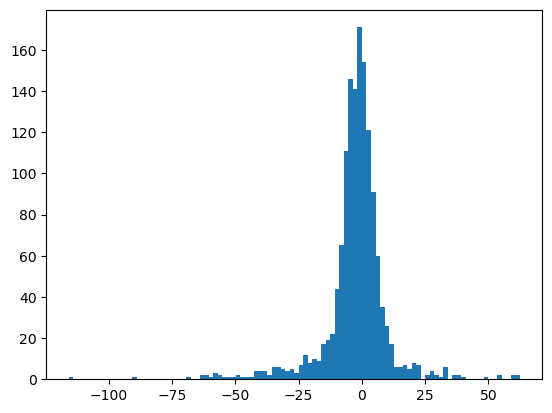

-1.37088409246644


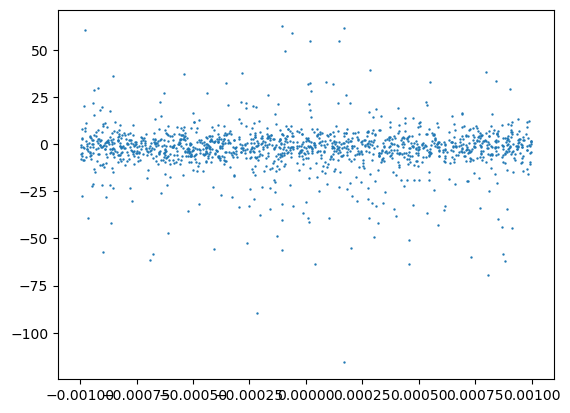

In [194]:
plt.hist((DY-DY_T)*1000, bins = 100)
plt.show()
print(np.median(DY-DY_T)*1000)
plt.scatter(test_df["PX_RES"],(DY - DY_T)*1000, s=0.5)
plt.show()

In [215]:
print(np.median(DY-DY_T)*1000)
print(np.median(PY/PX - PY_T/PX_T)*1000*4000)
print(np.median(DY-DY_T)*1000+np.median(PY/PX - PY_T/PX_T)*1000*4000)

-1.5919076759018935
-1.8971987145576659
-3.4891063904595594


In [15]:
df_offsets_i

,Q_FIT,HIT_Y_1,HIT_Y_2,HIT_Y_3,HIT_Y_4,HIT_Y_5,HIT_Y_6,PRED_Y_1,PRED_Y_2,PRED_Y_3,...,FIT_PY_2,FIT_PY_3,FIT_PY_4,FIT_PY_5,FIT_PY_6,FIT_PZ_2,FIT_PZ_3,FIT_PZ_4,FIT_PZ_5,FIT_PZ_6
0,-1.0,-746.989563,-745.209412,-743.618713,-664.015076,-658.405457,-652.288757,-746.989563,-745.217533,-743.445503,...,0.940524,0.940524,1.716598,1.716598,1.716598,145.998627,145.998627,0.940524,0.940524,0.940524
1,-1.0,596.046448,595.750427,595.182190,594.247803,594.103210,594.124390,596.046448,595.601441,595.156434,...,0.352994,0.352994,0.200979,0.200979,0.200979,1121.545532,1121.545532,0.352994,0.352994,0.352994
2,-1.0,-1397.607910,-1398.992554,-1400.444092,-1027.941284,-996.717529,-964.898621,-1397.607910,-1399.046108,-1400.484305,...,0.212526,0.212526,1.146787,1.146787,1.146787,18.211193,18.211193,0.212526,0.212526,0.212526
3,-1.0,-391.871765,-393.593658,-395.588409,-416.792358,-417.894928,-418.976746,-391.871765,-393.848860,-395.825955,...,0.749507,0.749507,-1.109866,-1.109866,-1.109866,583.946777,583.946777,0.749507,0.749507,0.749507
4,-1.0,1412.411987,1413.350586,1414.035767,1429.779419,1430.817261,1431.968384,1412.411987,1413.203890,1413.995793,...,1.756248,1.756248,5.986295,5.986295,5.986295,3022.545898,3022.545898,1.756248,1.756248,1.756248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156700,1.0,1330.922852,1330.357666,1329.465454,1280.504761,1276.644775,1272.760620,1330.922852,1330.156416,1329.389981,...,0.326842,0.326842,-1.504834,-1.504834,-1.504834,199.406113,199.406113,0.326842,0.326842,0.326842
156701,1.0,795.011292,790.641174,786.378723,44.334274,-15.774383,-76.132957,795.011292,790.532096,786.052900,...,-0.141884,-0.141884,-1.296153,-1.296153,-1.296153,10.826013,10.826013,-0.141884,-0.141884,-0.141884
156702,1.0,788.190247,789.765381,790.983765,-976.807739,-1125.655884,-1274.533936,788.190247,789.379310,790.568373,...,0.012631,0.012631,-1.189266,-1.189266,-1.189266,4.164375,4.164375,0.012631,0.012631,0.012631
156703,1.0,-863.410706,-852.787354,-842.827881,-1223.679932,-1259.673828,-1295.775757,-863.410706,-853.068582,-842.726459,...,-0.036089,-0.036089,-0.930602,-0.930602,-0.930602,12.984167,12.984167,-0.036089,-0.036089,-0.036089


In [46]:
df_offsets_i[np.abs((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]) < 0.001]

,Q_FIT,HIT_Y_1,HIT_Y_2,HIT_Y_3,HIT_Y_4,HIT_Y_5,HIT_Y_6,PRED_Y_1,PRED_Y_2,PRED_Y_3,...,FIT_PY_2,FIT_PY_3,FIT_PY_4,FIT_PY_5,FIT_PY_6,FIT_PZ_2,FIT_PZ_3,FIT_PZ_4,FIT_PZ_5,FIT_PZ_6
11,-1.0,-881.619324,-882.173401,-882.644653,-888.022705,-888.073730,-888.124512,-881.619324,-882.312130,-883.004935,...,-1.023363,-1.023363,-0.291976,-0.291976,-0.291976,1076.164429,1076.164429,-1.023363,-1.023363,-1.023363
17,-1.0,-1212.787720,-1213.606934,-1214.760010,-1223.920166,-1224.337891,-1224.869019,-1212.787720,-1213.766846,-1214.745972,...,0.718814,0.718814,-0.717574,-0.717574,-0.717574,978.803467,978.803467,0.718814,0.718814,0.718814
22,-1.0,562.072388,561.836121,561.340881,568.121155,568.760803,569.477844,562.072388,561.700401,561.328415,...,0.438666,0.438666,0.789078,0.789078,0.789078,551.218994,551.218994,0.438666,0.438666,0.438666
33,-1.0,1011.850708,1008.416321,1005.038025,1078.408203,1086.088623,1093.534790,1011.850708,1008.396623,1004.942539,...,0.378586,0.378586,0.822543,0.822543,0.822543,54.519123,54.519123,0.378586,0.378586,0.378586
50,-1.0,-1353.753296,-1356.171143,-1358.566040,-1352.581665,-1351.247192,-1349.863647,-1353.753296,-1356.186639,-1358.619982,...,-0.416761,-0.416761,0.456973,0.456973,0.456973,152.505646,152.505646,-0.416761,-0.416761,-0.416761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156693,1.0,192.322586,190.363907,188.002029,90.786400,83.743896,76.154327,192.322586,190.126406,187.930227,...,-0.860368,-0.860368,-1.726406,-1.726406,-1.726406,120.034897,120.034897,-0.860368,-0.860368,-0.860368
156696,1.0,1351.609497,1343.265381,1335.106812,765.089783,721.173157,676.978333,1351.609497,1343.347242,1335.084986,...,-0.199979,-0.199979,-1.477132,-1.477132,-1.477132,16.821232,16.821232,-0.199979,-0.199979,-0.199979
156699,1.0,1084.980103,1086.604126,1087.874512,1087.885742,1087.437744,1086.781372,1084.980103,1086.320512,1087.660921,...,0.547361,0.547361,-0.349265,-0.349265,-0.349265,317.031830,317.031830,0.547361,0.547361,0.547361
156702,1.0,788.190247,789.765381,790.983765,-976.807739,-1125.655884,-1274.533936,788.190247,789.379310,790.568373,...,0.012631,0.012631,-1.189266,-1.189266,-1.189266,4.164375,4.164375,0.012631,0.012631,0.012631


In [43]:
reco.Fit_Offsets(df_offsets_i[np.abs((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]) < 0.001], 4, initial_guess = [0,0,0,0,0.1,0.1], bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)])

Optimal transformation parameters: [ 0.          0.          0.          0.         -0.09649253 -0.04038033]
Sum of squares of residuals: 5268.119697017216
Sum of squares of residuals (no transform): 5747.895393589597




(array([ 0.        ,  0.        ,  0.        ,  0.        , -0.09649253,
        -0.04038033]),
 5268.119697017216,
 5747.895393589597)

In [45]:
[np.abs((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]) < 10]

[0         True
 1         True
 2         True
 3         True
 4         True
           ... 
 156700    True
 156701    True
 156702    True
 156703    True
 156704    True
 Length: 156705, dtype: bool]

In [44]:
truth_parameters[11][2]

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.06497839,
       -0.0375667 ])

In [ ]:
df_i["NDF"]

In [11]:
len(res)

500

In [25]:
(parameters-truth_parameters)[:,:,4]

array([[ 1.22823794e-02,  4.76679735e-02, -2.03504865e-02,
        -3.36693607e-02, -4.74077989e-02],
       [-2.91982792e-03, -8.77416973e-03,  1.87798039e-02,
         2.75603694e-02,  3.19635007e-02],
       [-4.78891461e-05, -6.02364541e-03, -3.97759064e-03,
         6.17990413e-04, -1.23776746e-03],
       [-1.67909762e-03, -9.02277807e-03, -3.62383964e-03,
         2.03509353e-04, -1.36103399e-03],
       [-7.21303601e-03, -3.09434244e-02,  4.62390132e-03,
         1.76211982e-02,  2.42723802e-02],
       [ 3.87095872e-03,  1.60971599e-02, -4.82477834e-03,
        -1.09229849e-02, -1.75127562e-02],
       [ 6.47087431e-04,  4.20413361e-03, -2.63215647e-04,
         1.71324812e-03, -1.79963164e-03],
       [-2.93810510e-03, -1.19480927e-02,  1.21549933e-02,
         2.06416066e-02,  2.42215923e-02],
       [ 2.35698235e-03,  7.08283456e-03,  5.78683951e-03,
         5.49410592e-03,  3.07768589e-03],
       [ 2.27954882e-03,  1.07679873e-02, -8.42208318e-03,
        -1.27255864e-02

In [28]:
(sum_of_residuals_squared/sum_of_no_squared)

array([[0.95389459, 0.99670288, 0.84716781, 0.9946444 , 0.96362297],
       [0.91902269, 0.88090774, 0.97808028, 0.98738471, 0.88013839],
       [0.95546542, 0.96911814, 0.99622127, 0.94134688, 0.98287456],
       [0.90800579, 0.98827978, 0.90595126, 0.87636948, 0.98751126],
       [0.91520669, 0.96987068, 0.88515111, 0.95692573, 0.95764996],
       [0.90183417, 0.98151868, 0.93641483, 0.88594942, 0.98767032],
       [0.83742316, 0.92266768, 0.90200324, 0.98714011, 0.93643366],
       [0.9447044 , 0.99023785, 0.98947557, 0.9815743 , 0.95112526],
       [0.99965361, 0.96727838, 0.99939332, 0.76705477, 0.94888541],
       [0.89929203, 0.97014967, 0.94955968, 0.94268377, 0.89866952],
       [0.9946253 , 0.82493804, 0.89417075, 0.93492224, 0.99233643],
       [0.96911006, 0.96634211, 0.9165302 , 0.9455265 , 0.9779685 ],
       [0.94925757, 0.96192938, 0.89117805, 0.89406   , 0.96098982],
       [0.93168639, 0.91733983, 0.9963885 , 0.99548579, 0.98569094],
       [0.99684067, 0.95846391, 0.

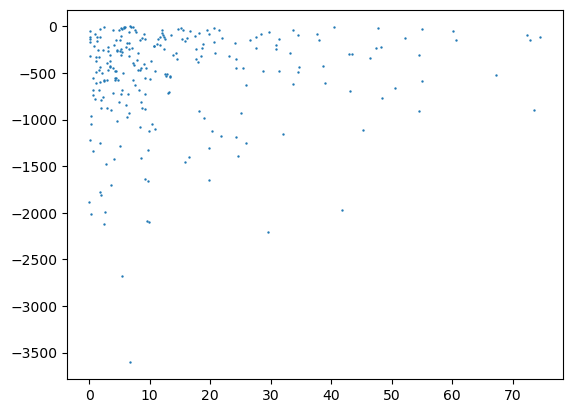

In [32]:
plt.scatter(np.abs((parameters-truth_parameters)[:,:,4].flatten())*1000, (sum_of_residuals_squared-sum_of_no_squared).flatten(), s = 0.5)
plt.show()

In [6]:
df_train = df
df_train["PX_RES"] = np.abs((df["PX_TRUTH"] - df["FIT_PX_1"])/df["PX_TRUTH"])
df_train["TARGET"] = df_train['PX_RES'].apply(lambda x: 1 if x < 0.01 else 0)

In [29]:
df_train_small = df_train[(df_train["P_FIT"] > 1000) & (df_train["CHI2SUM"] < 10)]

In [30]:
df_train_small

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES,TARGET
4,-0.000336,0.001583,1.570215,2977.612549,1.729585,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,177.958923,184.023727,183.733459,183.443176,178.508453,178.218124,177.927734,0.004629,-0.004499,1
6,-0.000955,-0.001452,1.571137,1047.415771,-0.356651,-1.0,1032.572510,-1.0,1032.571411,-1.503159,...,-120.576210,-124.162674,-123.991356,-123.820023,-120.907585,-120.736641,-120.566071,0.014375,-0.011872,0
7,-0.000815,0.000177,1.570406,1226.560547,0.478662,-1.0,1189.089478,-1.0,1189.089355,0.208391,...,-18.814871,-14.685732,-14.880679,-15.075624,-18.389706,-18.584713,-18.779783,0.031512,-0.043902,0
8,-0.000883,-0.000343,1.571291,1132.092163,-0.560251,-1.0,1129.994629,-1.0,1129.994385,-0.386031,...,-203.737610,-208.856918,-208.609741,-208.362549,-204.159836,-203.912552,-203.665207,0.001856,-0.006221,1
10,-0.000915,-0.000624,1.571157,1093.161987,-0.393860,-1.0,1068.456299,-1.0,1068.456055,-0.670758,...,-211.217346,-214.964020,-214.783783,-214.603516,-211.538849,-211.358612,-211.178421,0.023123,-0.017172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835362,0.000370,-0.002172,1.571257,2704.790527,-1.247301,1.0,2651.140625,1.0,2651.134033,-5.754660,...,-67.193382,-72.143288,-71.912590,-71.681892,-67.760048,-67.529396,-67.298805,0.020237,-0.020664,0
7835378,0.000567,0.002594,1.571997,1762.734863,-2.116550,1.0,1764.914307,1.0,1764.907104,4.577675,...,-112.761993,-125.354240,-124.753662,-124.153084,-113.943504,-113.343002,-112.742569,0.001235,0.001192,1
7835395,0.000618,-0.002299,1.570504,1618.873535,0.473321,1.0,1573.026123,1.0,1573.021851,-3.616617,...,128.470383,131.555222,131.408951,131.262665,128.776093,128.629852,128.483658,0.029146,-0.029289,0
7835399,0.000355,-0.001225,1.570659,2816.317383,0.386639,1.0,2798.962891,1.0,2798.960693,-3.426742,...,31.247343,32.587360,32.518776,32.450184,31.284075,31.215466,31.146839,0.006200,-0.006996,1


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = df_train[["CHI2SUM", "P_FIT"]]
y = df_train['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any classifier of your choice)
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7855524712038544


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = df_train_small[["CHI2SUM", "P_FIT", "FIT_PX_1", "FIT_PY_1", "FIT_PZ_1", "Q_FIT"]]
y = df_train_small['TARGET']

# Now X_scaled contains your standardized features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any classifier of your choice)
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9096155734141176


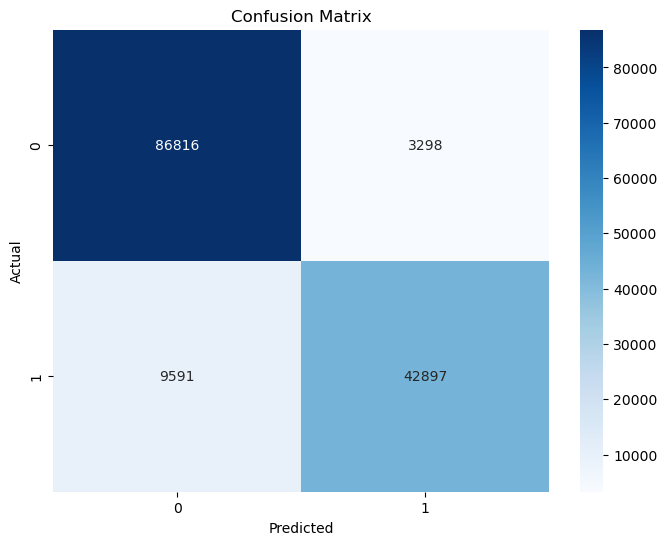

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['0', '1']  # Assuming 0 represents one class and 1 represents another

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Adjusted Confusion Matrix:
[[88752  1362]
 [15557 36931]]


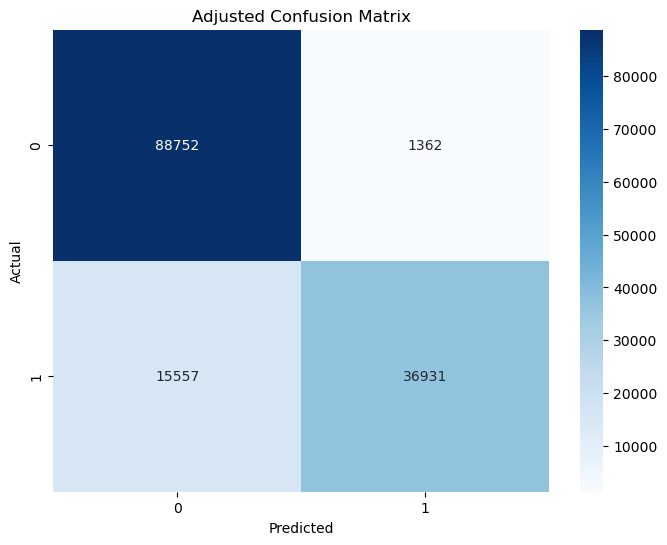

In [34]:
y_pred_probs = classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.60  # Example threshold
y_pred_adjusted = (y_pred_probs > threshold).astype(int)

# Generate confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

print("Adjusted Confusion Matrix:")
print(cm_adjusted)

# Plot adjusted confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Adjusted Confusion Matrix')
plt.show()

In [37]:
test_df = df_i[(df_i["P_FIT"] > 1000) & (df_i["CHI2SUM"] < 15)]

In [35]:
test_df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
1,-0.000897,-0.000891,1.570482,1115.205688,0.350787,-1.0,1134.860840,-1.0,1134.860352,-1.009918,...,146.526703,143.701141,143.655090,143.324631,146.693253,146.536240,146.379211,143.709229,143.552094,143.394913
4,-0.000334,0.001583,1.570216,2990.049316,1.736453,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,183.425400,178.686813,178.196808,177.958923,184.018112,183.727905,183.437683,178.504028,178.213760,177.923431
5,-0.000934,-0.001270,1.570415,1070.381348,0.408016,-1.0,1056.371216,-1.0,1056.370239,-1.341055,...,-48.734272,-51.976837,-51.935123,-52.213905,-48.235497,-48.426022,-48.616547,-51.855228,-52.045742,-52.236286
6,-0.000953,-0.001452,1.571137,1049.459351,-0.357472,-1.0,1032.572510,-1.0,1032.571411,-1.503159,...,-123.803749,-120.698448,-120.768661,-120.576210,-124.168587,-123.997147,-123.825714,-120.911736,-120.740715,-120.570068
7,-0.000813,0.000177,1.570406,1229.366699,0.479611,-1.0,1189.089478,-1.0,1189.089355,0.208391,...,-14.969357,-18.373840,-18.535982,-18.814871,-14.691543,-14.886392,-15.081241,-18.393951,-18.588886,-18.783892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156699,0.000416,-0.000971,1.569865,2404.308594,2.238652,1.0,2516.084473,1.0,2516.082275,-2.444549,...,407.983124,399.984772,399.568420,398.912598,408.815033,408.349426,407.883850,399.968689,399.503082,399.037537
156702,0.000682,0.000005,1.570310,1467.056152,0.712949,1.0,1488.647583,1.0,1488.647461,-0.000352,...,115.961510,111.730865,111.404587,111.244339,116.345146,116.101974,115.858795,111.724815,111.481712,111.238670
156703,0.000975,0.002173,1.571729,1025.434326,-0.956461,1.0,1023.818237,1.0,1023.815369,2.225892,...,-56.650696,-48.880169,-48.216900,-47.746010,-57.580173,-57.114151,-56.648132,-48.725739,-48.259586,-47.793324
156706,0.000845,-0.001534,1.570926,1182.733276,-0.153593,1.0,1177.087036,1.0,1177.085693,-1.810304,...,-83.353539,-82.338570,-82.417740,-82.248085,-83.587646,-83.523155,-83.458679,-82.362671,-82.298050,-82.233269


In [77]:
preds = classifier.predict(test_df[["CHI2SUM", "P_FIT","FIT_PX_1", "FIT_PY_1", "FIT_PZ_1", "Q_FIT"]])
print(np.sum(preds))
pred_probs = classifier.predict_proba(test_df[["CHI2SUM", "P_FIT","FIT_PX_1", "FIT_PY_1", "FIT_PZ_1", "Q_FIT"]])[:, 1]

# Adjust the threshold
threshold = 0.50  # Example threshold
pred_adjusted = (pred_probs > threshold).astype(int)
test_df = test_df[pred_adjusted == 1]

45155


In [20]:
import joblib
loaded_model = joblib.load("big_model.pkl")

In [41]:
pred_probs = loaded_model.predict_proba(test_df[["CHI2SUM", "P_FIT","FIT_PX_1", "FIT_PY_1", "FIT_PZ_1", "Q_FIT"]])[:, 1]

# Adjust the threshold
threshold = 0.60  # Example threshold
pred_adjusted = (pred_probs > threshold).astype(int)
test_df = test_df[pred_adjusted == 1]
test_df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
112,-0.000821,0.000376,1.570203,1218.641479,0.722536,-1.0,1219.750488,-1.0,1219.750244,0.456500,...,75.418350,70.244537,70.035721,69.765480,75.972298,75.675514,75.378738,70.333740,70.037079,69.740524
126,-0.000855,-0.001073,1.570579,1169.988525,0.254209,-1.0,1171.955322,-1.0,1171.954590,-1.256607,...,61.870827,60.235344,60.078266,59.945740,62.145706,62.038429,61.931149,60.107109,59.999355,59.891140
138,-0.000520,0.000045,1.572588,1922.426880,-3.444524,-1.0,1922.521606,-1.0,1922.518555,0.081895,...,-487.662842,-472.445312,-471.705688,-470.797058,-489.575043,-488.679108,-487.783203,-472.552551,-471.656647,-470.760773
276,-0.000854,-0.000427,1.570725,1170.867188,0.083696,-1.0,1165.345947,-1.0,1165.345825,-0.497196,...,-33.967670,-34.680088,-34.653175,-34.703224,-33.959217,-33.994987,-34.030762,-34.638985,-34.674747,-34.710499
301,-0.000839,-0.001860,1.571213,1191.627197,-0.496812,-1.0,1202.091675,-1.0,1202.089478,-2.236944,...,-171.642761,-168.211456,-167.879105,-167.698807,-172.115753,-171.907074,-171.698380,-168.150955,-167.942352,-167.733810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156593,0.000645,-0.001632,1.570960,1550.071167,-0.253220,1.0,1546.194580,1.0,1546.192505,-2.527666,...,-47.461884,-46.112118,-46.117935,-45.882935,-47.642361,-47.560898,-47.479431,-46.094456,-46.012917,-45.931301
156623,0.000955,-0.001894,1.572197,1046.922729,-1.466230,1.0,1053.915894,1.0,1053.912964,-1.998371,...,-356.273804,-344.337799,-343.663055,-342.801208,-357.608826,-356.908539,-356.208282,-344.303619,-343.603363,-342.903107
156637,0.000543,-0.001673,1.570203,1843.161987,1.093476,1.0,1855.707520,1.0,1855.704590,-3.103548,...,70.018959,64.983276,64.651787,64.358818,70.547676,70.251305,69.954933,64.916298,64.619820,64.323257
156703,0.000975,0.002173,1.571729,1025.434326,-0.956461,1.0,1023.818237,1.0,1023.815369,2.225892,...,-56.650696,-48.880169,-48.216900,-47.746010,-57.580173,-57.114151,-56.648132,-48.725739,-48.259586,-47.793324


In [42]:
test_df[(np.abs((test_df["PX_TRUTH"] - test_df["FIT_PX_1"])/test_df["PX_TRUTH"]) < 0.01)]

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
112,-0.000821,0.000376,1.570203,1218.641479,0.722536,-1.0,1219.750488,-1.0,1219.750244,0.456500,...,75.418350,70.244537,70.035721,69.765480,75.972298,75.675514,75.378738,70.333740,70.037079,69.740524
126,-0.000855,-0.001073,1.570579,1169.988525,0.254209,-1.0,1171.955322,-1.0,1171.954590,-1.256607,...,61.870827,60.235344,60.078266,59.945740,62.145706,62.038429,61.931149,60.107109,59.999355,59.891140
138,-0.000520,0.000045,1.572588,1922.426880,-3.444524,-1.0,1922.521606,-1.0,1922.518555,0.081895,...,-487.662842,-472.445312,-471.705688,-470.797058,-489.575043,-488.679108,-487.783203,-472.552551,-471.656647,-470.760773
276,-0.000854,-0.000427,1.570725,1170.867188,0.083696,-1.0,1165.345947,-1.0,1165.345825,-0.497196,...,-33.967670,-34.680088,-34.653175,-34.703224,-33.959217,-33.994987,-34.030762,-34.638985,-34.674747,-34.710499
301,-0.000839,-0.001860,1.571213,1191.627197,-0.496812,-1.0,1202.091675,-1.0,1202.089478,-2.236944,...,-171.642761,-168.211456,-167.879105,-167.698807,-172.115753,-171.907074,-171.698380,-168.150955,-167.942352,-167.733810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156593,0.000645,-0.001632,1.570960,1550.071167,-0.253220,1.0,1546.194580,1.0,1546.192505,-2.527666,...,-47.461884,-46.112118,-46.117935,-45.882935,-47.642361,-47.560898,-47.479431,-46.094456,-46.012917,-45.931301
156623,0.000955,-0.001894,1.572197,1046.922729,-1.466230,1.0,1053.915894,1.0,1053.912964,-1.998371,...,-356.273804,-344.337799,-343.663055,-342.801208,-357.608826,-356.908539,-356.208282,-344.303619,-343.603363,-342.903107
156637,0.000543,-0.001673,1.570203,1843.161987,1.093476,1.0,1855.707520,1.0,1855.704590,-3.103548,...,70.018959,64.983276,64.651787,64.358818,70.547676,70.251305,69.954933,64.916298,64.619820,64.323257
156703,0.000975,0.002173,1.571729,1025.434326,-0.956461,1.0,1023.818237,1.0,1023.815369,2.225892,...,-56.650696,-48.880169,-48.216900,-47.746010,-57.580173,-57.114151,-56.648132,-48.725739,-48.259586,-47.793324


In [17]:
test_df = df_i[(df_i["P_FIT"] > 1000) & (df_i["CHI2SUM"] < 15) & (np.abs((df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]) < 0.2)]

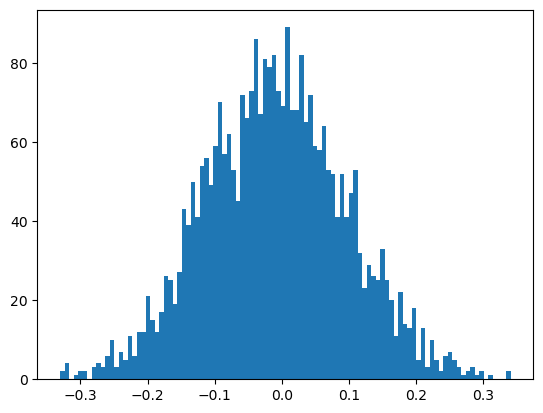

-10.229882390376588
0.10534231281816805
[  0.           0.           0.           0.           5.79822177
 -19.20474354]


,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
112,-0.000821,0.000376,1.570203,1218.641479,0.722536,-1.0,1219.750488,-1.0,1219.750244,0.456500,...,75.418350,70.244537,70.035721,69.765480,75.972298,75.675514,75.378738,70.333740,70.037079,69.740524
126,-0.000855,-0.001073,1.570579,1169.988525,0.254209,-1.0,1171.955322,-1.0,1171.954590,-1.256607,...,61.870827,60.235344,60.078266,59.945740,62.145706,62.038429,61.931149,60.107109,59.999355,59.891140
138,-0.000520,0.000045,1.572588,1922.426880,-3.444524,-1.0,1922.521606,-1.0,1922.518555,0.081895,...,-487.662842,-472.445312,-471.705688,-470.797058,-489.575043,-488.679108,-487.783203,-472.552551,-471.656647,-470.760773
276,-0.000854,-0.000427,1.570725,1170.867188,0.083696,-1.0,1165.345947,-1.0,1165.345825,-0.497196,...,-33.967670,-34.680088,-34.653175,-34.703224,-33.959217,-33.994987,-34.030762,-34.638985,-34.674747,-34.710499
301,-0.000839,-0.001860,1.571213,1191.627197,-0.496812,-1.0,1202.091675,-1.0,1202.089478,-2.236944,...,-171.642761,-168.211456,-167.879105,-167.698807,-172.115753,-171.907074,-171.698380,-168.150955,-167.942352,-167.733810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156593,0.000645,-0.001632,1.570960,1550.071167,-0.253220,1.0,1546.194580,1.0,1546.192505,-2.527666,...,-47.461884,-46.112118,-46.117935,-45.882935,-47.642361,-47.560898,-47.479431,-46.094456,-46.012917,-45.931301
156623,0.000955,-0.001894,1.572197,1046.922729,-1.466230,1.0,1053.915894,1.0,1053.912964,-1.998371,...,-356.273804,-344.337799,-343.663055,-342.801208,-357.608826,-356.908539,-356.208282,-344.303619,-343.603363,-342.903107
156637,0.000543,-0.001673,1.570203,1843.161987,1.093476,1.0,1855.707520,1.0,1855.704590,-3.103548,...,70.018959,64.983276,64.651787,64.358818,70.547676,70.251305,69.954933,64.916298,64.619820,64.323257
156703,0.000975,0.002173,1.571729,1025.434326,-0.956461,1.0,1023.818237,1.0,1023.815369,2.225892,...,-56.650696,-48.880169,-48.216900,-47.746010,-57.580173,-57.114151,-56.648132,-48.725739,-48.259586,-47.793324


In [43]:
PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["FIT_PX_1"],test_df["FIT_PY_1"], test_df["FIT_PZ_1"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"]))
print(truth_parameters[0][2]*1000)
test_df

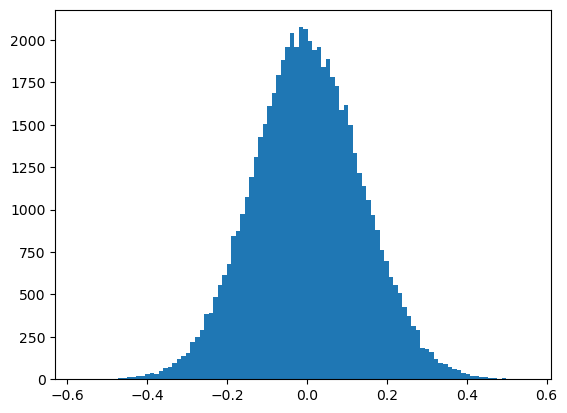

-0.5670960318866491
0.1361926883403593
[  0.           0.           0.           0.           5.79822177
 -19.20474354]


,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.006860,0.003543,1.564354,145.782928,0.939148,-1.0,145.633667,-1.0,145.629730,0.514953,...,319.434204,264.518555,261.291962,258.252228,325.941711,322.710175,319.479584,264.584991,261.359192,258.136169
11,-0.000934,-0.001387,1.571748,1070.275024,-1.018061,-1.0,1076.019165,-1.0,1076.017700,-1.491882,...,-426.269775,-418.116638,-417.457062,-416.945160,-427.090729,-426.614166,-426.137634,-418.036804,-417.560577,-417.084686
18,-0.001035,-0.000433,1.570852,966.510193,-0.053964,-1.0,963.962036,-1.0,963.961914,-0.417051,...,160.990234,161.309464,161.535583,161.613892,160.913956,160.942139,160.970337,161.449387,161.477509,161.505554
19,-0.009825,-0.000749,1.569540,101.781677,0.127869,-1.0,101.647774,-1.0,101.647667,-0.076371,...,-291.782013,-302.683044,-303.258636,-303.683624,-290.612915,-291.242706,-291.871918,-302.578217,-303.205536,-303.832031
22,-0.001820,-0.000745,1.570001,549.505249,0.437295,-1.0,550.823730,-1.0,550.823425,-0.409713,...,151.739471,144.738998,144.363403,143.949203,152.347626,151.948792,151.549942,144.767502,144.368896,143.970657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156703,0.000975,0.002173,1.571729,1025.434326,-0.956461,1.0,1023.818237,1.0,1023.815369,2.225892,...,-56.650696,-48.880169,-48.216900,-47.746010,-57.580173,-57.114151,-56.648132,-48.725739,-48.259586,-47.793324
156706,0.000845,-0.001534,1.570926,1182.733276,-0.153593,1.0,1177.087036,1.0,1177.085693,-1.810304,...,-83.353539,-82.338570,-82.417740,-82.248085,-83.587646,-83.523155,-83.458679,-82.362671,-82.298050,-82.233269
156708,0.005007,-0.001534,1.569157,199.731079,0.327400,1.0,199.140976,1.0,199.140472,-0.305185,...,-207.236877,-221.188507,-221.942490,-222.782166,-205.603867,-206.422272,-207.240692,-221.153976,-221.972687,-222.791840
156711,0.001598,-0.002514,1.570042,625.756653,0.472315,1.0,625.563660,1.0,625.561523,-1.572773,...,432.011383,425.537964,425.198792,424.810913,432.726013,432.348694,431.971405,425.557556,425.180237,424.802917


In [27]:
PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["PX_TRUTH"],test_df["PY_TRUTH"], test_df["PZ_TRUTH"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX

plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"]))
print(truth_parameters[0][2]*1000)
test_df

In [11]:
import joblib

In [12]:
joblib.dump(classifier, 'big_model.pkl')

['big_model.pkl']

In [21]:
test_df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,TARGET
13,-0.001113,-0.001746,1.571597,898.544678,-0.718994,-1.0,894.477966,-1.0,894.476318,-1.562818,...,-417.653137,-417.252167,-425.567596,-425.168457,-424.769318,-417.983643,-417.584167,-417.184418,0.004546,1
44,-0.004291,0.001843,1.571278,233.032700,-0.112157,-1.0,231.869431,-1.0,231.869019,0.426104,...,-455.942505,-455.513306,-460.749756,-460.503967,-460.258545,-456.095947,-455.852417,-455.610229,0.005017,0
59,-0.003859,0.000410,1.571532,259.129944,-0.190700,-1.0,258.768982,-1.0,258.768890,0.105464,...,-229.426010,-228.955048,-236.709091,-236.343277,-235.977142,-229.741562,-229.374329,-229.006653,0.001395,1
66,-0.004623,-0.005417,1.571897,216.311371,-0.238172,-1.0,216.047897,-1.0,216.044601,-1.170741,...,66.926201,67.669655,56.103413,56.648335,57.193417,66.461273,67.008415,67.557419,0.001220,1
77,-0.004444,-0.003111,1.573335,225.001221,-0.571135,-1.0,224.618805,-1.0,224.616989,-0.698654,...,-155.025208,-153.741150,-180.388626,-179.120956,-177.853439,-156.309586,-155.041534,-153.772888,0.001703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156612,0.001604,-0.002513,1.570041,623.625366,0.470780,1.0,625.563660,1.0,625.561523,-1.572773,...,425.150482,424.810913,432.746460,432.368408,431.990387,425.563782,425.185944,424.808289,0.003099,1
156636,0.004216,0.000345,1.572057,237.197571,-0.299115,1.0,237.909149,1.0,237.908951,0.081644,...,-251.939606,-251.411423,-264.552002,-263.921844,-263.291992,-252.593033,-251.963455,-251.333511,0.002991,1
156664,0.000844,0.000862,1.569798,1184.568726,1.182313,1.0,1187.209106,1.0,1187.208130,1.022574,...,294.400024,293.915070,304.506195,304.006439,303.506714,295.011719,294.512207,294.012939,0.002224,1
156676,0.004771,0.002040,1.572923,209.590515,-0.445819,1.0,209.151413,1.0,209.150497,0.428625,...,1.176585,2.141595,-20.190809,-19.125488,-18.060062,0.048371,1.113036,2.177073,0.002099,1


In [24]:
import joblib
loaded_model = joblib.load('model.pkl')
preds = loaded_model.predict(df_i[(df_i["P_FIT"] > 200) & (df_i["CHI2SUM"] < 10)][["CHI2SUM", "P_FIT","FIT_PX_1", "FIT_PY_1", "FIT_PZ_1", "Q_FIT"]])
df_offsets_i[(df_i["P_FIT"] > 200) & (df_i["CHI2SUM"] < 10)][preds == 1]

,Q_FIT,HIT_Y_1,HIT_Y_2,HIT_Y_3,HIT_Y_4,HIT_Y_5,HIT_Y_6,PRED_Y_1,PRED_Y_2,PRED_Y_3,...,FIT_PY_2,FIT_PY_3,FIT_PY_4,FIT_PY_5,FIT_PY_6,FIT_PZ_2,FIT_PZ_3,FIT_PZ_4,FIT_PZ_5,FIT_PZ_6
13,-1.0,-899.384644,-900.189453,-901.033752,-907.992493,-908.045654,-908.293579,-899.384644,-900.257784,-901.130923,...,-0.718980,-0.718980,-0.369938,-0.369938,-0.369938,898.543030,898.543030,-0.718980,-0.718980,-0.718980
44,-1.0,-193.950150,-192.854828,-192.066391,-145.377701,-141.971985,-138.563950,-193.950150,-193.028739,-192.107328,...,-0.112152,-0.112152,1.628607,1.628607,1.628607,233.032257,233.032257,-0.112152,-0.112152,-0.112152
59,-1.0,248.775757,249.089249,249.204300,280.470398,283.100037,285.419525,248.775757,248.980988,249.186220,...,-0.190699,-0.190699,1.305533,1.305533,1.305533,259.129852,259.129852,-0.190699,-0.190699,-0.190699
66,-1.0,-377.634796,-380.127411,-382.938477,-395.647095,-395.598755,-395.569977,-377.634796,-380.343193,-383.051591,...,-0.238168,-0.238168,0.027473,0.027473,0.027473,216.308075,216.308075,-0.238168,-0.238168,-0.238168
77,-1.0,-17.172586,-18.706766,-20.360229,-14.708811,-13.556867,-12.625131,-17.172586,-18.727893,-20.283199,...,-0.571124,-0.571124,0.499284,0.499284,0.499284,224.999420,224.999420,-0.571124,-0.571124,-0.571124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156612,1.0,-1155.611084,-1156.671875,-1157.981323,-1190.793579,-1193.155396,-1195.491821,-1155.611084,-1156.867672,-1158.124259,...,0.470768,0.470768,-2.766444,-2.766444,-2.766444,623.623169,623.623169,0.470768,0.470768,0.470768
156636,1.0,914.287170,914.563660,914.807922,887.226135,884.992554,882.652405,914.287170,914.459539,914.631908,...,-0.299121,-0.299121,-1.117399,-1.117399,-1.117399,237.197372,237.197372,-0.299121,-0.299121,-0.299121
156664,1.0,454.160004,454.701385,455.111084,456.306702,456.170227,456.227142,454.160004,454.591037,455.022070,...,1.182371,1.182371,-0.177994,-0.177994,-0.177994,1184.567749,1184.567749,1.182371,1.182371,1.182371
156676,1.0,770.575867,771.536499,772.547607,755.578308,753.737610,751.887756,770.575867,771.595724,772.615582,...,-0.445815,-0.445815,-0.771667,-0.771667,-0.771667,209.589600,209.589600,-0.445815,-0.445815,-0.445815


In [83]:
t = df_i.corrwith(df_i["PY_RES"])
t[t>0.001]

P_FIT             0.003882
PZ_FIT            0.001325
Q_FIT             0.001570
P_TRUTH           0.004408
Q_TRUTH           0.001570
PX_TRUTH          0.004408
PZ_TRUTH          0.001321
CHI2SUM           0.003379
FIT_PX_6          0.003881
FIT_PX_5          0.003881
FIT_PX_4          0.003881
FIT_PX_3          0.003881
FIT_PX_2          0.003882
FIT_PX_1          0.003882
FIT_PZ_6          0.001318
FIT_PZ_5          0.001318
FIT_PZ_4          0.001318
FIT_PZ_3          0.001321
FIT_PZ_2          0.001323
FIT_PZ_1          0.001325
Z_TRUTH_6         0.004022
Z_TRUTH_5         0.004017
Z_TRUTH_4         0.004011
Z_TRUTH_3         0.003873
Z_TRUTH_2         0.003863
Z_TRUTH_1         0.003852
GLOBAL_Z_HIT_6    0.004021
GLOBAL_Z_HIT_5    0.004016
GLOBAL_Z_HIT_4    0.004010
GLOBAL_Z_HIT_3    0.003875
GLOBAL_Z_HIT_2    0.003863
GLOBAL_Z_HIT_1    0.003852
LOCAL_Z_HIT_6     0.004021
LOCAL_Z_HIT_5     0.004016
LOCAL_Z_HIT_4     0.004010
LOCAL_Z_HIT_3     0.003875
LOCAL_Z_HIT_2     0.003863
L

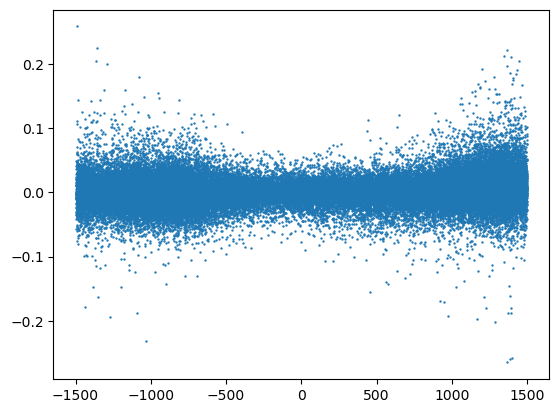

In [80]:
plt.scatter(df_i["LOCAL_Y_HIT_4"], df_i["PX_RES"], s=0.5)

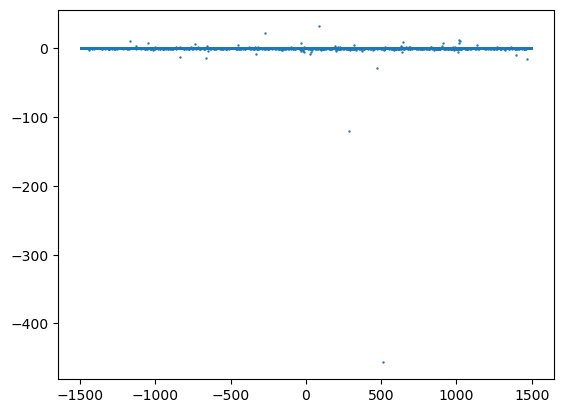

In [81]:
plt.scatter(df_i["LOCAL_Y_HIT_4"], df_i["PY_RES"], s=0.5)

(0.0, 5000.0)

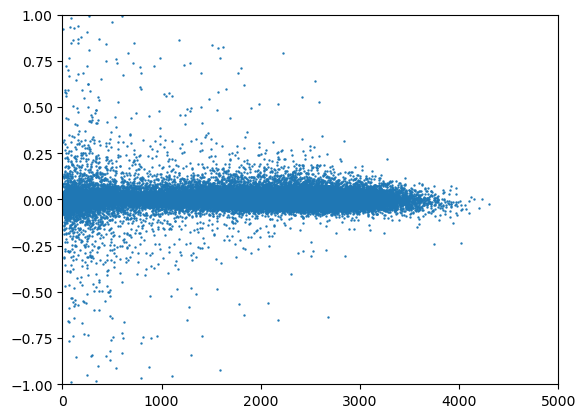

In [89]:
plt.scatter(df_i["P_FIT"], df_i["PY_RES"], s=0.5)
plt.ylim(-1, 1)
plt.xlim(0,5000)

In [13]:
df_offsets

,Q_FIT,HIT_Y_1,HIT_Y_2,HIT_Y_3,HIT_Y_4,HIT_Y_5,HIT_Y_6,PRED_Y_1,PRED_Y_2,PRED_Y_3,...,FIT_PY_2,FIT_PY_3,FIT_PY_4,FIT_PY_5,FIT_PY_6,FIT_PZ_2,FIT_PZ_3,FIT_PZ_4,FIT_PZ_5,FIT_PZ_6
0,-1.0,-746.989563,-745.316467,-743.670471,-663.981445,-658.406799,-652.329712,-746.989563,-745.218197,-743.446830,...,0.939660,0.939660,1.715907,1.715907,1.715907,145.858322,145.858322,0.939660,0.939660,0.939660
1,-1.0,596.046448,595.643311,595.130432,594.281433,594.101807,594.083435,596.046448,595.600804,595.155161,...,0.350120,0.350120,0.207260,0.207260,0.207260,1112.896729,1112.896729,0.350120,0.350120,0.350120
2,-1.0,-1397.607910,-1399.099731,-1400.495850,-1027.907715,-996.718933,-964.939514,-1397.607910,-1399.046700,-1400.485490,...,0.212552,0.212552,1.146761,1.146761,1.146761,18.212872,18.212872,0.212552,0.212552,0.212552
3,-1.0,-391.871765,-393.700745,-395.640167,-416.758698,-417.896301,-419.017670,-391.871765,-393.849516,-395.827266,...,0.746333,0.746333,-1.100889,-1.100889,-1.100889,581.483459,581.483459,0.746333,0.746333,0.746333
4,-1.0,1412.411987,1413.243408,1413.984131,1429.812988,1430.815918,1431.927368,1412.411987,1413.203353,1413.994718,...,1.729568,1.729568,5.911922,5.911922,5.911922,2977.608398,2977.608398,1.729568,1.729568,1.729568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835421,1.0,-403.986053,-404.807068,-405.301392,-419.991302,-420.980225,-422.049835,-403.986053,-404.634784,-405.283514,...,-0.349257,-0.349257,-3.733104,-3.733104,-3.733104,1952.994873,1952.994873,-0.349257,-0.349257,-0.349257
7835422,1.0,-1086.180786,-1087.718506,-1089.178711,-1119.875122,-1121.854736,-1124.227783,-1086.180786,-1087.707979,-1089.235172,...,-1.390944,-1.390944,-5.683144,-5.683144,-5.683144,1468.044434,1468.044434,-1.390944,-1.390944,-1.390944
7835423,1.0,-560.910950,-561.541870,-561.753052,-569.009644,-569.444092,-569.926575,-560.910950,-561.205691,-561.500433,...,-1.752893,-1.752893,-3.054062,-3.054062,-3.054062,3146.639893,3146.639893,-1.752893,-1.752893,-1.752893
7835424,1.0,1075.353149,1075.949219,1076.664917,1077.517090,1077.368530,1077.147705,1075.353149,1075.949818,1076.546487,...,-0.355674,-0.355674,-0.267556,-0.267556,-0.267556,780.679077,780.679077,-0.355674,-0.355674,-0.355674


In [105]:
df_i

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.006865,0.003543,1.564354,145.676163,0.938495,-1.0,145.633667,-1.0,145.629730,0.514953,...,319.447815,264.611847,261.232819,258.252228,325.937897,322.707733,319.478271,264.595642,261.369843,258.146698
1,-0.000900,-0.000891,1.570482,1111.119263,0.349502,-1.0,1134.860840,-1.0,1134.860352,-1.009918,...,146.540298,143.794434,143.595963,143.324631,146.695923,146.538986,146.382034,143.713226,143.556122,143.398911
2,-0.055058,-0.002876,1.559126,18.162624,0.211950,-1.0,18.160948,-1.0,18.159637,-0.052293,...,-356.861023,-455.991119,-462.119659,-467.718170,-345.095551,-350.950806,-356.811310,-456.098022,-461.952728,-467.783112
3,-0.001722,-0.003955,1.569513,580.870178,0.745606,-1.0,577.678711,-1.0,577.673706,-2.283606,...,218.470139,207.566284,207.090271,206.475876,219.778580,219.139587,218.500595,207.637177,206.997299,206.356476
4,-0.000337,0.001583,1.570215,2969.109619,1.724646,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,183.438995,178.780106,178.137680,177.958923,184.021606,183.731369,183.441147,178.507156,178.216858,177.926498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156703,0.217001,-0.007321,1.560413,4.608265,0.047849,1.0,4.603403,1.0,4.603031,-0.033698,...,244.243881,153.975647,148.414093,143.361206,254.971603,249.394760,244.179276,153.912598,148.509689,143.328094
156704,0.011728,0.001979,1.573059,85.268059,-0.192961,1.0,85.404129,1.0,85.403748,0.166880,...,-64.868317,-45.587917,-44.624844,-43.269249,-67.074005,-65.948395,-64.821465,-45.625858,-44.495777,-43.364010
156705,0.092149,-0.008958,1.583901,10.852006,-0.142206,1.0,10.875880,1.0,10.874511,-0.097390,...,38.161243,150.157944,156.489029,162.992249,24.979284,31.543026,38.141296,150.075882,156.537506,163.022629
156706,0.239879,0.002378,1.567763,4.168761,0.012644,1.0,4.168149,1.0,4.168118,0.009939,...,50.608223,24.021650,22.404646,20.791656,53.624844,52.043037,50.583271,24.010849,22.405087,20.802315


In [107]:
df_offsets_i["HIT_Z_4"]

0         319.447815
1         146.540298
2        -356.861023
3         218.470139
4         183.438995
             ...    
156703    244.243881
156704    -64.868317
156705     38.161243
156706     50.608223
156707   -172.884354
Name: HIT_Z_4, Length: 156708, dtype: float64

In [4]:
df_i

NameError: name 'df_i' is not defined

In [144]:
pred_offsets_y = np.loadtxt(input_dir + "pred_offsets_y.csv", delimiter = ",")

In [154]:
pred_offsets_y = pred_offsets_y[:,1:7]

In [152]:
old_offsets_y

array([[-0.03022096,  0.0006745 ,  0.00579822,  0.05348634,  0.01492527],
       [ 0.01491203, -0.05654248,  0.03692188,  0.01319371,  0.04993133],
       [ 0.07550643,  0.0342726 , -0.01760333, -0.04241002,  0.03689417],
       [ 0.04478376, -0.04161283,  0.01423444,  0.0877993 , -0.0478607 ],
       [-0.0235192 , -0.13039409,  0.0414451 , -0.05669293,  0.01200068],
       [-0.11514203,  0.0582786 ,  0.12937728, -0.10791169,  0.04593512],
       [ 0.0870709 , -0.01077017,  0.04217125, -0.08234246,  0.09118202],
       [-0.12252308, -0.12523782,  0.06630363,  0.03459369, -0.03574204],
       [ 0.13203127,  0.07301144,  0.15172631, -0.14204782,  0.10205804],
       [-0.02781336, -0.10174929,  0.04384771,  0.07845878,  0.09847667],
       [ 0.060177  , -0.00387722,  0.02321788, -0.10284062,  0.01896105],
       [ 0.05340283,  0.05983939, -0.04458242, -0.06446463,  0.02334039],
       [ 0.14247453, -0.01460203, -0.0095771 ,  0.16738234, -0.08550428],
       [-0.03906767,  0.02295746, -0.0

In [157]:
old_offsets_y[:,5]

IndexError: index 5 is out of bounds for axis 1 with size 5

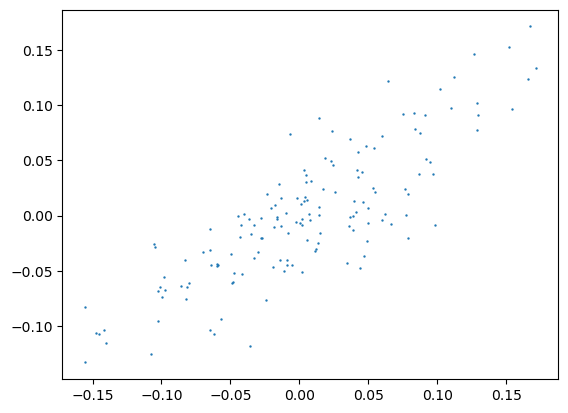

array([[1.        , 0.83410079],
       [0.83410079, 1.        ]])

In [161]:
plt.scatter(old_offsets_y[:,2:5], pred_offsets_y[:,2:5], s=0.5)
plt.show()

np.corrcoef(old_offsets_y[:,2:5].flatten(), pred_offsets_y[:,2:5].flatten())

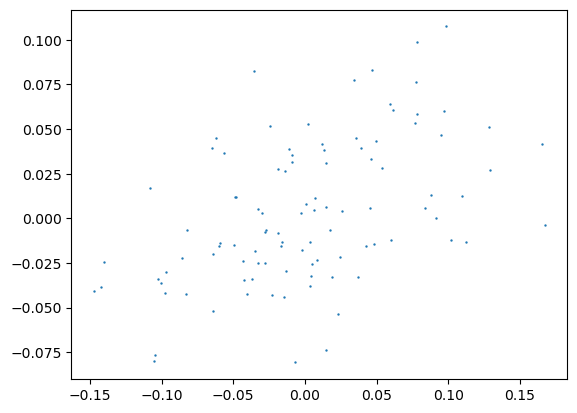

array([[1.        , 0.48664664],
       [0.48664664, 1.        ]])

In [140]:
plt.scatter(old_offsets_y[:,3:6], updated_offsets_y[:,3:6], s=0.5)
plt.show()

np.corrcoef(old_offsets_y[:,3:6].flatten(), updated_offsets_y[:,3:6].flatten())

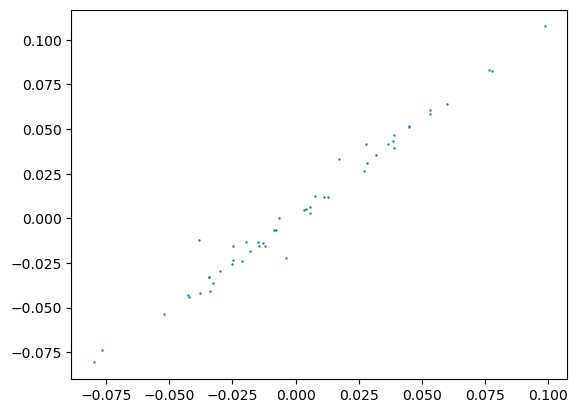

array([[1.        , 0.98954791],
       [0.98954791, 1.        ]])

In [162]:
plt.scatter(updated_offsets_y[:,3], updated_offsets_y[:,4], s=0.5)
plt.show()

np.corrcoef(updated_offsets_y[:,3].flatten(), updated_offsets_y[:,4].flatten())